# **1. Latar Belakang**
Perusahaan yang bergerak pada penyewaan properti ingin memperluas bisnis dengan cara penyewaan properti di Bangkok, Thailand. Properti tersebut ingin dijadikan sebagai listing yang nantinya akan disewakan melalui aplikasi Airbnb. Airbnb adalah jaringan pasar daring dan penginapan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti. Perusahaan ingin mengetahui karakteristik properti di Bangkok agar properti yang disewakan memiliki karakteristik yang sesuai dengan pasar.

## **A. Pernyataan Masalah**
Perusahaan ingin mengetahui karakteristik daerah Bangkok dalam penyewaan properti melalui aplikasi Airbnb. Perusahaan mencari karakteristik properti daerah Bangkok agar properti yang nantinya akan disewakan dapat sesuai dengan keinginan pasar dan diminati oleh orang-orang yang akan menyewa. Karakteristik yang dimaksud adalah tipe ruangan, harga dan wilayah mana yang paling diminati agar nanti perusahaan dapat memilih wilayah dan tipe ruangan yang tepat sesuai dengan popularitas penyewaan.

Maka, pertanyaan utama untuk menjawab pernyataan tersebut adalah **Bagaimana karakteristik properti yang berada di Bangkok, Thailand dan wilayah mana yang memiliki karakteristik terbaik melalui aplikasi Airbnb?**

<hr>

# **2. Load Data**

In [264]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

In [265]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

## **A .Dataset Info**

- **Unnamed: 0** : index dari dataset
- **id** : Nomor identifikasi unik untuk Airbnb
- **name** : Nama dari listing
- **host_id** : Nomor identifikasi unik Airbnb untuk tuan rumah/pemilik
- **host_name** : Nama pemilik, biasanya nama depan
- **neighbourhood** : Lingkungan/wilayah tempat listing berada berdasarkan latitude dan longitude
- **latitude** : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat lintang
- **longitude** : Menggunakan proyeksi World Geodetic System (WGS84) untuk koordinat bujur
- **room_type** : Tipe kamar yang tersedia untuk listing
- **price** : Harga sewa listing dalam mata uang lokal (baht)
- **minimum_nights** : Jumlah minimum masa sewa untuk listing permalam
- **number_of_reviews** : Jumlah ulasan listing, kolom ini juga dapat diasumsikan sebagai jumlah penyewa pada sebuah listing
- **last_review** : Tanggal ulasan terakhir/terbaru
- **reviews_per_month** : Jumlah rata-rata ulasan yang diterima perbulan berdasarkan terakhir mendapat review
- **calculated_host_listings_count** : Jumlah listing yang dimiliki oleh pemilik
- **availability_365** : Ketersediaan listing dalam 365 hari ke depan
- **number_of_reviews_ltm** : Jumlah ulasan yang diterima listing dalam 12 bulan terakhir, kolom ini dapat diasumsikan sebagai jumlah penyewa pada sebuah listing

<hr>

# **3. Data Understanding & Cleaning**

*Data understanding* diperlukan untuk memahami data-data yang tersedia. Dalam proses ini, diharapkan kita dapat mengetahui anomali-anomali apa saja yang terdapat pada dataset dan selanjutnya akan ditangani dalam tahapan *data cleaning*. 

## **A. Menampilkan Informasi Terkait DataFrame**

In [266]:
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [267]:
df.info()
print(f' Jumlah baris dan kolom adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

### **a. Mengubah Dtype `last_review`**
Karena dtype pada kolom ini berupa **object** tetapi isi pada kolom ini berupa tanggal, maka kolom ini akan diubah menjadi **datetime** dtype.

In [268]:
df['last_review'] = pd.to_datetime(df['last_review'])

## **B. Unique Value**

In [269]:
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

Column Name  Number of Unique  \
0                       Unnamed: 0             15854   
1                               id             15854   
2                             name             14794   
3                          host_id              6659   
4                        host_name              5312   
5                    neighbourhood                50   
6                         latitude              9606   
7                        longitude             10224   
8                        room_type                 4   
9                            price              3040   
10                  minimum_nights                86   
11               number_of_reviews               298   
12                     last_review              1669   
13               reviews_per_month               513   
14  calculated_host_listings_count                50   
15                availability_365               366   
16           number_of_reviews_ltm                85   

                                        Unique Sample  
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1   [27934, 27979, 28745, 35780, 941865, 1704776, ...  
2   [Nice room with superb city view, Easy going l...  
3   [120437, 120541, 123784, 153730, 610315, 21296...  
4   [Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo...  
5   [Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B...  
6   [13.75983, 13.66818, 13.75232, 13.78823, 13.76...  
7   [100.54134, 100.61674, 100.62402, 100.57256, 1...  
8   [Entire home/apt, Private room, Hotel room, Sh...  
9   [1905, 1316, 800, 1286, 1000, 1558, 1461, 700,...  
10  [3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1...  
11  [65, 0, 2, 19, 1, 10, 4, 27, 129, 208, 3, 78, ...  
12  [2020-01-06 00:00:00, NaT, 2022-04-01 00:00:00...  
13  [0.5, nan, 0.03, 0.17, 0.01, 0.09, 0.19, 1.17,...  
14  [2, 1, 3, 41, 10, 7, 6, 4, 37, 8, 19, 5, 53, 4...  
15  [353, 358, 365, 323, 87, 320, 356, 361, 330, 1...  
16  [0, 1, 3, 13, 2, 7, 5, 10, 9, 12, 29, 4, 19, 5...

### **a. Menghapus kolom `Unnamed: 0`**
Karena kolom ini berisi seperti dengan kolom index, maka kita tidak membutuhkan kolom tersebut.

In [270]:
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

id                             name  host_id host_name neighbourhood  \
0  27934  Nice room with superb city view   120437    Nuttee   Ratchathewi   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0

### Insight:
- Kolom `id` dan `host_id` : Kolom `id` berjumlah **15854** no unik dan kolom `host_id` berjumlah **6659** no unik. 
- Kolom `last_review`: berisi tentang kapan terakhir listing tersebut direview, tetapi kita tidak dapat mengetahui review yang diperoleh sebelumnya pada tiap listing. Kolom `last_review` mendapatkan review `pertama` pada tanggal **2022-12-28** dan review `terakhir` pada tanggal **2012-12-15**. Kolom `last_review` tidak terisi apabila pada kolom `number_of_reviews` berisi 0.
- Kolom `reviews_per_month` : berisi tentang rata-rata jumlah review yang diperoleh dalam sebulan. Kolom `reviews_per_month` tidak terisi apabila pada kolom `number_of_reviews` berisi 0.
- Kolom `number_of_reviews_ltm` : berisi tentang jumlah review yang diperoleh dalam setahun terakhir. Dataset terakhir diupdate pada tahun 2022, jadi `number_of_reviews_ltm` berisi jumlah review pada tahun **2022**.

Anomali pada kolom :
- Kolom `Unnamed:0`: berisi serupa dengan index, maka kita tidak memerlukan kolom ini.

## **C. Descriptive Statistics**

In [271]:
display(df.describe(), df.describe(include='object'))

id       host_id      latitude     longitude         price  \
count  1.585400e+04  1.585400e+04  15854.000000  15854.000000  1.585400e+04   
mean   1.579397e+17  1.541058e+08     13.745144    100.559903  3.217704e+03   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104509e+07  3.974431e+07     13.720090    100.529690  9.000000e+02   
50%    3.503734e+07  1.224556e+08     13.738490    100.561415  1.429000e+03   
75%    5.256154e+07  2.390547e+08     13.759497    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   
std    2.946015e+17  1.318726e+08      0.043040      0.050911  2.497212e+04   

       minimum_nights  number_of_reviews                    last_review  \
count    15854.000000       15854.000000                          10064   
mean        15.292355          16.654157  2021-08-30 08:37:49.316375296   
min          1.000000           0.000000            2012-12-15 00:00:00   
25%          1.000000           0.000000            2020-02-20 00:00:00   
50%          1.000000           2.000000            2022-10-24 00:00:00   
75%          7.000000          13.000000            2022-12-08 00:00:00   
max       1125.000000        1224.000000            2022-12-28 00:00:00   
std         50.815020          40.613331                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       10064.000000                    15854.000000      15854.000000   
mean            0.813145                       13.889618        244.378643   
min             0.010000                        1.000000          0.000000   
25%             0.120000                        1.000000        138.000000   
50%             0.435000                        4.000000        309.000000   
75%             1.060000                       13.000000        360.000000   
max            19.130000                      228.000000        365.000000   
std             1.090196                       30.269848        125.843224   

       number_of_reviews_ltm  
count           15854.000000  
mean                3.481519  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 3.000000  
max               325.000000  
std                 8.916937

name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type  
count          15854            15854  
unique            50                4  
top          Vadhana  Entire home/apt  
freq            2153             8912

In [272]:
df[df['price']==0]

id                           name    host_id  \
11103  44563108  Somerset Maison Asoke Bangkok  360620448   

                   host_name neighbourhood  latitude  longitude   room_type  \
11103  Somerset Maison Asoke       Vadhana  13.73815   100.5642  Hotel room   

       price  minimum_nights  number_of_reviews last_review  \
11103      0               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11103                NaN                               1                 0   

       number_of_reviews_ltm  
11103                      0

- `price` : harga termahal untuk listing adalah **1100000** dan termurah adalah **0**.
    - terdapat anomali pada harga **0**, walaupun harga yang ditawarkan adalah **0** tetapi keterseidaan listing untuk setahun kedepan sudah habis. Jadi kita tidak akan melakukan tindakan pada baris ini.
- `minimum_night` : minimal menyewa paling besar adalah **1125** malam dan paling sedikit adalah 1 malam. 
- `number_of_reviews` : rata-rata reviews yang diperoleh oleh suatu listing adalah **16**
- `neighbourhood` : **Vadhana** menjadi wilayah yang sering muncul dalam daftar listing ini.

## **D. Missing Value**

In [273]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [274]:
(df.isna().sum() / len(df) * 100).round(2)

id                                 0.00
name                               0.05
host_id                            0.00
host_name                          0.01
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       36.52
reviews_per_month                 36.52
calculated_host_listings_count     0.00
availability_365                   0.00
number_of_reviews_ltm              0.00
dtype: float64

Terdapat 4 kolom yang memiliki missing value :
- `name` : 8 missing value atau sebesar **0.05%**
- `host_name` : 1 missing value atau sebesar **0.01%**
- `last_review` : 5790 missing value atau sebesar **36.52%**
- `reviews_per_month` : 5790 missing value atau sebesar **36.52%**

### **a. Menangani missing value pada kolom `name`**

In [275]:
df[df['name'].isna()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   
2075  13142743  NaN  73275200         Pakaphol   Khlong Toei  13.72566   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   
2075  100.56416     Private room    850               1                  2   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaT                NaN                               1   
544          NaT                NaN                               1   
572          NaT                NaN                               1   
669          NaT                NaN                               1   
1030         NaT                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaT                NaN                               1   
2075  2017-12-11               0.03                               3   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0  
2075               220                      0

- Terdapat 8 data kosong pada kolom `name`
- Terdapat 1 host id yang memiliki `calculated_host_listings_count` berjumlah 3. Kita dapat berasumsi bahwa pada listing tersebut memiliki 2 listing lainnya yang memiliki `name` yang sama.
- Pada 7 missing value lainnya tidak terdapat persamaan yang dapat digunakan untuk mengisi pada data kosong tersebut. 

In [276]:
df[df['host_id']==73275200]
# Setelah dilakukan pengecekan ternyata kita dapat mengisi kolom name yang kosong berdasarkan name dari listing yang sama

id                name   host_id host_name neighbourhood  \
1981  13400326  Errday Guest House  73275200  Pakaphol   Khlong Toei   
1982  13400758  Errday Guest House  73275200  Pakaphol   Khlong Toei   
2075  13142743                 NaN  73275200  Pakaphol   Khlong Toei   

      latitude  longitude     room_type  price  minimum_nights  \
1981  13.72427  100.56443  Private room    950               1   
1982  13.72373  100.56415  Private room  36363               1   
2075  13.72566  100.56416  Private room    850               1   

      number_of_reviews last_review  reviews_per_month  \
1981                  1  2020-02-19               0.03   
1982                  0         NaT                NaN   
2075                  2  2017-12-11               0.03   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1981                               3                 1                      0  
1982                               3                 1                      0  
2075                               3               220                      0

In [277]:
df['name'].iloc[2075] = 'Errday Guest House'
df[df['host_id']==73275200]

id                name   host_id host_name neighbourhood  \
1981  13400326  Errday Guest House  73275200  Pakaphol   Khlong Toei   
1982  13400758  Errday Guest House  73275200  Pakaphol   Khlong Toei   
2075  13142743  Errday Guest House  73275200  Pakaphol   Khlong Toei   

      latitude  longitude     room_type  price  minimum_nights  \
1981  13.72427  100.56443  Private room    950               1   
1982  13.72373  100.56415  Private room  36363               1   
2075  13.72566  100.56416  Private room    850               1   

      number_of_reviews last_review  reviews_per_month  \
1981                  1  2020-02-19               0.03   
1982                  0         NaT                NaN   
2075                  2  2017-12-11               0.03   

      calculated_host_listings_count  availability_365  number_of_reviews_ltm  
1981                               3                 1                      0  
1982                               3                 1                      0  
2075                               3               220                      0

In [278]:
df[df['name'].isna()]

id name   host_id        host_name neighbourhood  latitude  \
439    4549768  NaN  18852579          Titawan  Phra Khanong  13.69406   
544    4720818  NaN  24386225           Cherry     Din Daeng  13.77562   
572    4245018  NaN  22030043        Parichart    Bang Phlat  13.78376   
669    6148415  NaN  31895202            Chira       Bang Na  13.68276   
1030   8055144  NaN  42521288          Nantida       Vadhana  13.74126   
1282  10000742  NaN  51374914  Diamond Bangkok   Ratchathewi  13.75328   
1594  10710165  NaN  55347997      Khaneungnit       Vadhana  13.71757   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
439   100.59619     Private room   1080               5                  0   
544   100.57346     Private room   1200               1                  0   
572   100.49821     Private room   1200               1                  0   
669   100.60894  Entire home/apt   2424               2                  0   
1030  100.55761     Private room   5000               3                  0   
1282  100.52928     Private room    930               1                  6   
1594  100.60464     Private room   1000               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
439          NaT                NaN                               1   
544          NaT                NaN                               1   
572          NaT                NaN                               1   
669          NaT                NaN                               1   
1030         NaT                NaN                               1   
1282  2017-05-13               0.07                               1   
1594         NaT                NaN                               1   

      availability_365  number_of_reviews_ltm  
439                365                      0  
544                365                      0  
572                365                      0  
669                365                      0  
1030               365                      0  
1282               365                      0  
1594               365                      0

Pada ke 7 kolom `name` data kosong tersebut, kita tidak dapat menemukan hal-hal yang dapat dikaitkan untuk mengisi ke 7 data kosong tersebut. Kita dapat berasumsi bahwa ke 7 data kosong tersebut tidak terisi saat melakukan penginputan data atau ke 7 listing tersebut sudah tidak beroperasi lagi karena pada ke 7 data kosong tersebut, jumlah dari masing-masing data kosong pada kolom `availability_365` berjumlah **365**. Bahkan dari ke 7 listing tersebut hanya 1 listing yang pernah mendapatkan review. Oleh sebab itu, tindakan yang diambil adalah menghapus listing tersebut karena tidak ada cara yang dirasa sesuai untuk mengisi data tersebut.

In [279]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### **b. Menangani missing value pada kolom `host_name`**

In [280]:
df[df['host_name'].isna()]

id           name    host_id host_name neighbourhood  latitude  \
3571  19682464  Cozy Hideaway  137488762       NaN     Bang Kapi  13.76999   

      longitude     room_type  price  minimum_nights  number_of_reviews  \
3571  100.63769  Private room   1399               3                  1   

     last_review  reviews_per_month  calculated_host_listings_count  \
3571  2017-07-29               0.02                               1   

      availability_365  number_of_reviews_ltm  
3571               365                      0

Kita dapat berasumsi listing tersebut tidak beroperasi, karena pada kolom `availability_365` berjumlah **365** dan terakhir mendapatkan review pada tahun 2017. Selain itu sebuah listing harus memiliki informasi dari nama pemiliknya, karena sebuah listing akan dapat lebih dipercaya apabila penyewa mengetahui nama dari pemiliknya. Maka, penanganan yang dilakukan adalah menghapus listing tersebut.

In [281]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### **c. Menangani missing value pada kolom `last_review`**


In [282]:
df[df['last_review'].isna()]

id                                               name  \
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
4                  941865                         Suite Room 3 at MetroPoint   
7                 1738669                    1 chic bedroom apartment in BKK   
14                 959254                 Deluxe Condo, Nana, Pool/GYM/Sauna   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
7        7045870    Jiraporn    Chatu Chak  13.829250  100.567370   
14       5153476      Natcha   Khlong Toei  13.715160  100.568060   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
4         Private room   1905               1                  0         NaT   
7      Entire home/apt   1461               1                  0         NaT   
14     Entire home/apt   1400              30                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2                          0  
4                          0  
7                          0  
14                         0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

Terdapat **5784** data kosong pada kolom `last_review`. Data kosong tersebut kosong karena listing tersebut belum pernah mendapatkan review, sehingga kolom `last_review` yang berisi tanggal review terakhir juga kosong. Pada data kosong kita akan membiarkan data kosong tersebut, karena data kosong tersebut berada pada kolom dengan Dtype **datetime** dan kita tidak dapat berasumsi berdasarkan informasi dari kolom lainnya. Kita juga tidak bisa menghapus 5784 baris atau sebesar 36% data dalam dataset ini, karena itu akan berpengaruh pada hasil analisis secara keseluruhan.

### **d. Menangani missing value pada kolom `reviews_per_month`**

In [283]:
df[df['reviews_per_month'].isna()]

id                                               name  \
1                   27979                     Easy going landlord,easy place   
2                   28745                  modern-style apartment in Bangkok   
4                  941865                         Suite Room 3 at MetroPoint   
7                 1738669                    1 chic bedroom apartment in BKK   
14                 959254                 Deluxe Condo, Nana, Pool/GYM/Sauna   
...                   ...                                                ...   
15849  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15850  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15851  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15852  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15853  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id   host_name neighbourhood   latitude   longitude  \
1         120541         Emy       Bang Na  13.668180  100.616740   
2         123784  Familyroom     Bang Kapi  13.752320  100.624020   
4         610315       Kasem     Bang Kapi  13.768720  100.633380   
7        7045870    Jiraporn    Chatu Chak  13.829250  100.567370   
14       5153476      Natcha   Khlong Toei  13.715160  100.568060   
...          ...         ...           ...        ...         ...   
15849   94899359       Renee       Pra Wet  13.715132  100.653458   
15850  491526222   Phakhamon   Ratchathewi  13.753052  100.538738   
15851  491526222   Phakhamon   Ratchathewi  13.753169  100.538700   
15852  491526222   Phakhamon   Ratchathewi  13.754789  100.538757   
15853  491526222   Phakhamon   Ratchathewi  13.752960  100.540820   

             room_type  price  minimum_nights  number_of_reviews last_review  \
1         Private room   1316               1                  0         NaT   
2         Private room    800              60                  0         NaT   
4         Private room   1905               1                  0         NaT   
7      Entire home/apt   1461               1                  0         NaT   
14     Entire home/apt   1400              30                  0         NaT   
...                ...    ...             ...                ...         ...   
15849     Private room   2298              28                  0         NaT   
15850     Private room   1429               1                  0         NaT   
15851     Private room   1214               1                  0         NaT   
15852     Private room   1214               1                  0         NaT   
15853     Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
1                    NaN                               2               358   
2                    NaN                               1               365   
4                    NaN                               3               365   
7                    NaN                               1               365   
14                   NaN                               1               365   
...                  ...                             ...               ...   
15849                NaN                               1               362   
15850                NaN                              14               365   
15851                NaN                              14               365   
15852                NaN                              14               365   
15853                NaN                              14               365   

       number_of_reviews_ltm  
1                          0  
2                          0  
4                          0  
7                          0  
14                         0  
...                      ...  
15849                      0  
15850                      0  
15851                      0  
15852                    

Terdapat **5784** missing value pada kolom `reviews_per_month`. Data kosong tersebut kosong karena listing tersebut belum pernah mendapatkan review, sehingga kolom `reviews_per_month` yang berisi rata-rata review perbulan terakhir juga kosong. Maka, dari informasi tersebut kita dapat mengisi data kosong tersebut dengan nilai **0**.

In [284]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### **e. Reset Index**
Setelah melakukan tahapan menangani missing value, kita disarankan untuk mengatur ulang index yang ada.

In [285]:
df = df.reset_index(drop=True)
display(df.tail() , df.shape)

id                                               name  \
15841  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15842  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15843  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15844  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15845  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name neighbourhood   latitude   longitude  \
15841   94899359      Renee       Pra Wet  13.715132  100.653458   
15842  491526222  Phakhamon   Ratchathewi  13.753052  100.538738   
15843  491526222  Phakhamon   Ratchathewi  13.753169  100.538700   
15844  491526222  Phakhamon   Ratchathewi  13.754789  100.538757   
15845  491526222  Phakhamon   Ratchathewi  13.752960  100.540820   

          room_type  price  minimum_nights  number_of_reviews last_review  \
15841  Private room   2298              28                  0         NaT   
15842  Private room   1429               1                  0         NaT   
15843  Private room   1214               1                  0         NaT   
15844  Private room   1214               1                  0         NaT   
15845  Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
15841                0.0                               1               362   
15842                0.0                              14               365   
15843                0.0                              14               365   
15844                0.0                              14               365   
15845                0.0                              14               365   

       number_of_reviews_ltm  
15841                      0  
15842                      0  
15843                      0  
15844                      0  
15845                      0

(15846, 16)

## **E. Duplicated Data**

In [286]:
# Jumlah duplikat data pada seluruh kolom
df.duplicated().sum()

0

In [287]:
# Jumlah duplikat data pada kolom unik 'id'
df['id'].duplicated().sum()

0

In [288]:
# Jumlah duplikat selain kolom dengan nomor unik
df.drop(columns=['id']).duplicated().sum()

7

Terdapat 7 data duplikat pada dataset selain kolom `id`.

### **a. Menangani Duplicated Data**

In [289]:
df[df.drop(columns=['id']).duplicated(keep=False)]

id                                             name  \
5882             28831409                        NA BANGLAMPOO GUEST HOUSE   
5968             28907857                        NA BANGLAMPOO GUEST HOUSE   
8781             37953702                                           small1   
8782             37954129                                           small1   
15175  765632824291529126          Sathon Luxury 2 br/China Town/Icon Siam   
15178  765691389894680033          Sathon Luxury 2 br/China Town/Icon Siam   
15182  765716244664642439          Sathon Luxury 2 br/China Town/Icon Siam   
15183  765721954905526928          Sathon Luxury 2 br/China Town/Icon Siam   
15541  781507744450884041  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15542  781514912980696908  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15606  780889390373160493  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15607  780896408611028752  Luxury 1 Bed/Central Rama9/Jodds Fair/Phra ram9   
15821  790278230325843023                         Family Room for 4 People   
15823  790280473547745220                         Family Room for 4 People   

         host_id host_name neighbourhood   latitude   longitude  \
5882    87704107       Yui   Phra Nakhon  13.762790  100.497900   
5968    87704107       Yui   Phra Nakhon  13.762790  100.497900   
8781    97598307       Soo    Don Mueang  13.920720  100.575780   
8782    97598307       Soo    Don Mueang  13.920720  100.575780   
15175  264864968    Tricia        Sathon  13.710777  100.519891   
15178  264864968    Tricia        Sathon  13.710777  100.519891   
15182  344327171     Alice        Sathon  13.710777  100.519891   
15183  344327171     Alice        Sathon  13.710777  100.519891   
15541   20133201    Willam   Huai Khwang  13.756184  100.568269   
15542   20133201    Willam   Huai Khwang  13.756184  100.568269   
15606  344327171     Alice   Huai Khwang  13.757097  100.568486   
15607  344327171     Alice   Huai Khwang  13.757097  100.568486   
15821  340188343    Rachan       Vadhana  13.740168  100.556320   
15823  340188343    Rachan       Vadhana  13.740168  100.556320   

             room_type  price  minimum_nights  number_of_reviews last_review  \
5882      Private room   1400               1                  0         NaT   
5968      Private room   1400               1                  0         NaT   
8781       Shared room    350               1                  0         NaT   
8782       Shared room    350               1                  0         NaT   
15175  Entire home/apt   2221               1                  0         NaT   
15178  Entire home/apt   2221               1                  0         NaT   
15182  Entire home/apt   2221               1                  0         NaT   
15183  Entire home/apt   2221               1                  0         NaT   
15541  Entire home/apt   2533               3                  0         NaT   
15542  Entire home/apt   2533               3                  0         NaT   
15606  Entire home/apt   2533               3                  0         NaT   
15607  Entire home/apt   2533               3                  0         NaT   
15821     Private room   2237               1                  0         NaT   
15823     Private room   2237               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
5882                 0.0                               9               361   
5968                 0.0                               9               361   
8781                 0.0                               4               180   
8782                 0.0                               4               180   
15175                0.0                              44               340   
15178                0.0                              44               340   
15182                0.0                              40               340   
15183                

Terdapat duplikat data apabila kita tidak mengikutsertakan kolom `id` dalam pencarian data duplikat. Data duplikat tersebut hampir setiap kolomnya serupa kecuali pada kolom `id`. Maka, tindakan yang akan dilakukan adalah menghapus kolom duplikat tersebut.

In [290]:
df = df.drop([5968, 8782, 15178, 15183, 15542, 15607, 15823], axis=0)
df[df.drop(columns=['id']).duplicated(keep=False)]

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm]
Index: []

Sudah tidak terdapat data duplikat.

### **b. Reset Index**
Setelah melakukan penghapusan pada baris duplikat, kita disarankan untuk mengatur ulang index yang ada.

In [291]:
df = df.reset_index(drop=True)
display(df.tail() , df.shape)

id                                               name  \
15834  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   
15835  790474503157243541  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
15836  790475335086864240  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15837  790475546213717328  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   
15838  790476492384199044  Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea   

         host_id  host_name neighbourhood   latitude   longitude  \
15834   94899359      Renee       Pra Wet  13.715132  100.653458   
15835  491526222  Phakhamon   Ratchathewi  13.753052  100.538738   
15836  491526222  Phakhamon   Ratchathewi  13.753169  100.538700   
15837  491526222  Phakhamon   Ratchathewi  13.754789  100.538757   
15838  491526222  Phakhamon   Ratchathewi  13.752960  100.540820   

          room_type  price  minimum_nights  number_of_reviews last_review  \
15834  Private room   2298              28                  0         NaT   
15835  Private room   1429               1                  0         NaT   
15836  Private room   1214               1                  0         NaT   
15837  Private room   1214               1                  0         NaT   
15838  Private room   1214               1                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
15834                0.0                               1               362   
15835                0.0                              14               365   
15836                0.0                              14               365   
15837                0.0                              14               365   
15838                0.0                              14               365   

       number_of_reviews_ltm  
15834                      0  
15835                      0  
15836                      0  
15837                      0  
15838                      0

(15839, 16)

## **F. Data Distribution**

In [293]:
df.describe().columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [294]:
numerical_check = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]
numerical_check.head()

price  minimum_nights  number_of_reviews  reviews_per_month  \
0   1905               3                 65               0.50   
1   1316               1                  0               0.00   
2    800              60                  0               0.00   
3   1286               7                  2               0.03   
4   1905               1                  0               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

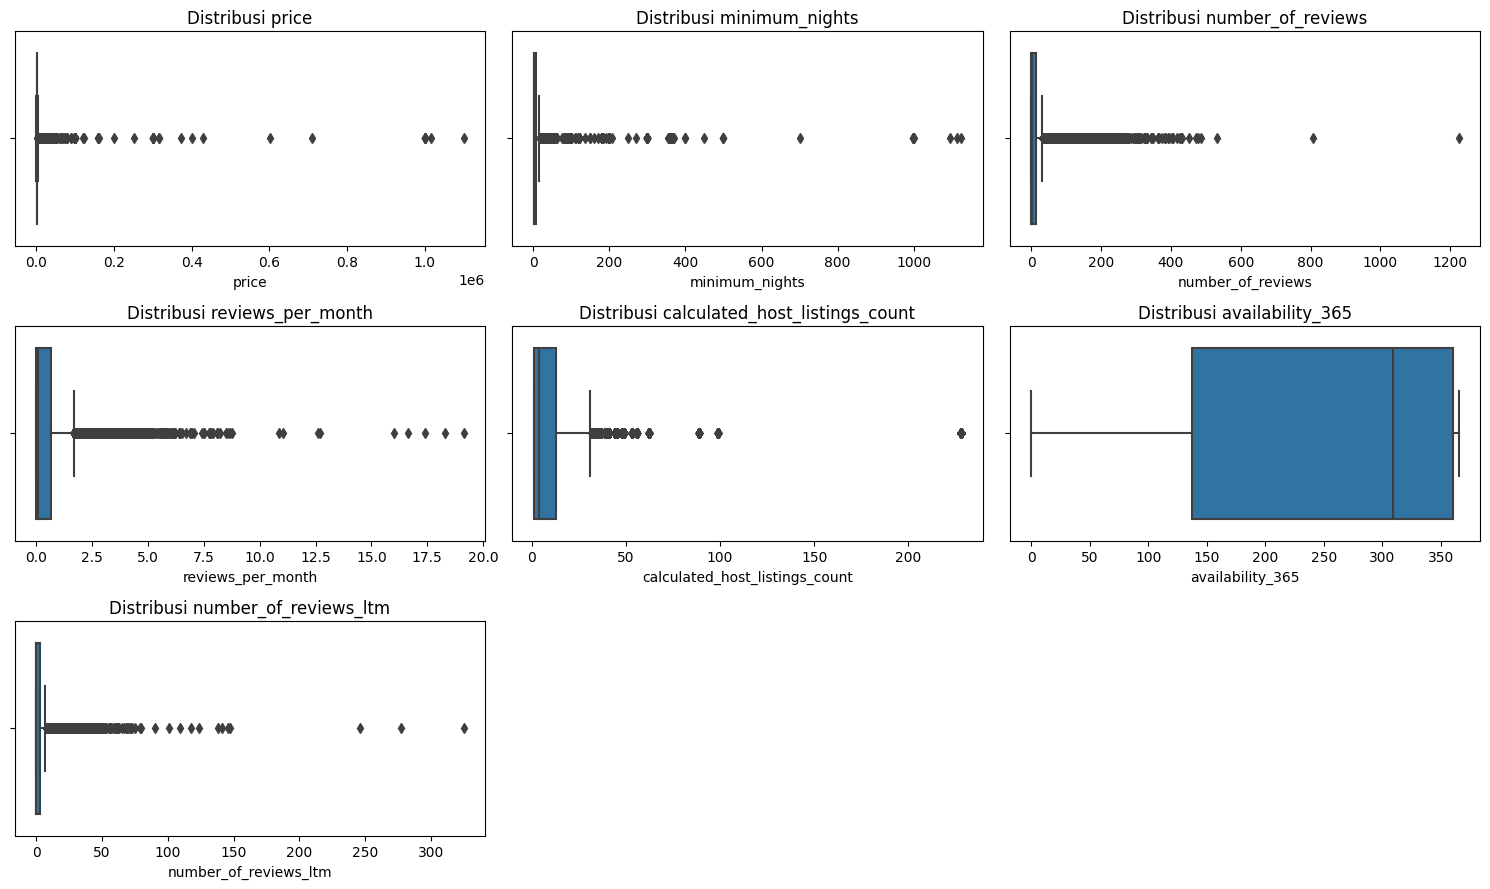

In [295]:
plt.figure(figsize=(15,9))
ax = 1
for kolom in numerical_check:
    plt.subplot(3,3, ax)
    sns.boxplot(data=df, x=kolom)
    plt.title(f'Distribusi {kolom}')
    ax += 1

plt.tight_layout()
plt.show()

Berdasarkan gambar tersebut :
- Kolom numerikal yang tidak memiliki outliers hanya ada pada kolom `availability_365`, sedangkan kolom lainnya memiliki outliers

Tetapi, pada subbab ini data yang akan dilihat atau dianalisis lebih lanjut persebaran datanya dan pencarian outliers adalah kolom `price` dan `minimum_nights` karena pada kedua kolom ini pemilik dapat memberikan harga dan minimum menyewa sesuai dengan yang dikehendakinya. Sedangkan pada kolom lain, apabila terdapat outliers nilai outliers itu cukup penting karena berisi dengan data yang sesuai dengan keadaanya.

### **a. `price`**

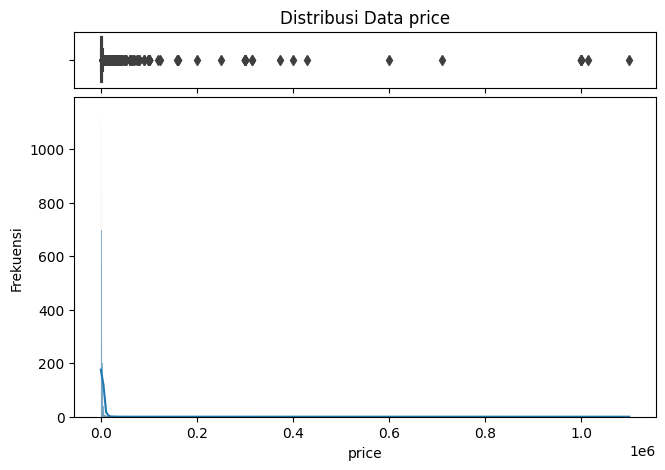

In [296]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Distribusi Data price")
sns.boxplot(x = df['price'], ax = ax1)
ax1.set(xlabel = "")

sns.histplot(data = df['price'], ax = ax2,  kde=True)
ax2.set(ylabel = 'Frekuensi')

plt.show()

In [297]:
# Mengecek distribusi data
stat, pvalue = normaltest(df['price'])

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


In [298]:
# Menghitung IQR untuk mengetahui data outliers
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
lower_fence = df['price'].quantile(0.25) - 1.5*IQR
upper_fence = df['price'].quantile(0.75) + 1.5*IQR

print(f"Lower Fence : {lower_fence}, Upper Fence : {upper_fence}")

Lower Fence : -1393.5, Upper Fence : 4722.5


In [299]:
# Jumlah Outliers berdasarkan price
df[(df['price'] < lower_fence) | (df['price'] > upper_fence)].sort_values('price', ascending=False)

id                                               name  \
12858  635676064543597376              New 1 bedroom apartment BTS MRT Asoke   
12290  562972065309061724  3B中文No Guest Service Fee@Nana Asok/Soi11 Night...   
6280             29909847       BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR   
9335             39858231                1BR cozy condo  close to ONNUT BTS.   
1234              8880974                 Modern,wifi,5m MRT&2 Shopping Mall   
...                   ...                                                ...   
7261             33102996  10 Person House @ platinum mall Central World BTS   
1116              8654051   Bangkok Silom Private Gathering Place # Air3nity   
11376            46347034             Way of Riverside, Way of Ordinary Life   
5144             25493646      Riverfront Residence Bangkok River view (2BR)   
9695             40483043       Wutthakat127•5stop to•ICONSIAM•Palace•Sathon   

         host_id                 host_name neighbourhood   latitude  \
12858   12464705                     Lucio       Vadhana  13.742186   
12290  131427125                        Jj       Vadhana  13.746660   
6280   210559448                      Cora   Khlong Toei  13.703330   
9335   210559448                      Cora   Khlong Toei  13.704960   
1234    30803267                   Yasmine   Huai Khwang  13.759950   
...          ...                       ...           ...        ...   
7261      595560                    Edmond   Ratchathewi  13.760050   
1116    13282564                  Inthanom      Bang Rak  13.725300   
11376  149900593         Theatre Residence   Bangkok Noi  13.753410   
5144   100104168                Riverfront     Yan na wa  13.673040   
9695    16552933  Central Old Town Cottage    Chom Thong  13.711440   

        longitude        room_type    price  minimum_nights  \
12858  100.560394  Entire home/apt  1100000              14   
12290  100.559100  Entire home/apt  1014758              30   
6280   100.592470  Entire home/apt  1000000               2   
9335   100.591510  Entire home/apt  1000000              25   
1234   100.569360  Entire home/apt  1000000             100   
...           ...              ...      ...             ...   
7261   100.542100  Entire home/apt     4744               1   
1116   100.529500  Entire home/apt     4734               1   
11376  100.487350     Private room     4727               1   
5144   100.544660     Private room     4726               1   
9695   100.460060  Entire home/apt     4725               7   

       number_of_reviews last_review  reviews_per_month  \
12858                  0         NaT               0.00   
12290                  2  2022-09-17               0.32   
6280                  69  2020-03-12               1.39   
9335                   2  2020-02-23               0.05   
1234                  45  2016-09-05               0.51   
...                  ...         ...                ...   
7261                  42  2022-11-21               0.92   
1116                 239  2022-12-12               3.28   
11376                  0         NaT               0.00   
5144                   0         NaT               0.00   
9695                   3  2020-02-18               0.08   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
12858                               1               365                      0  
12290                              10                75                      2  
6280                                6                90                      0  
9335                                6                88                      0  
1234                                4               180                      0  
...                               ...               ...                    ...  
7261                                3               332                      5  
1116                                6               194                     15  
11376         

In [300]:
# Persentase banyaknya outliers
len(df[(df['price'] < lower_fence) | (df['price'] > upper_fence)].sort_values('price', ascending=False))/len(df) *100

8.851568912178799

- Data pada kolom `price` TIDAK terdistribusi normal
- lower fence = **-1393.5**, upper fence = **4722.5**
- Jumlah data yang termasuk outliers berjumlah **1402**
- Persentase outliers dibandingkan dengan seluruh data adalah **8.85%**
- Outliers yang berada pada data ternyata sudah pernah mendapat review. Ini berarti listing tersebut sudah pernah disewakan dan tidak ada masalah yang terjadi apabila pemilik mematok harga yang besar. Maka, tidak akan ada tindakan untuk menangani outliers

### **b. `minimum_nights`**

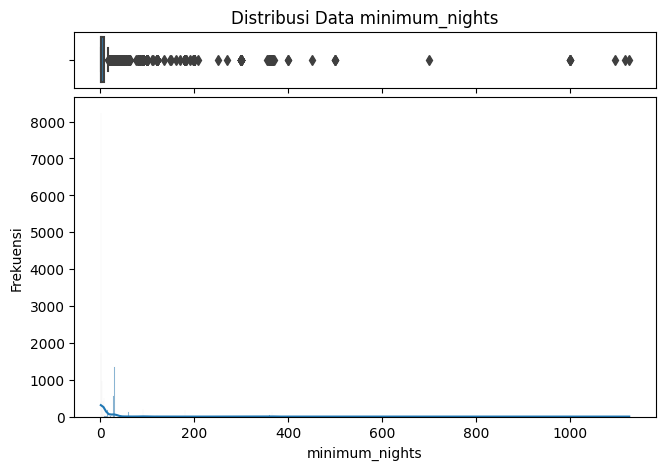

In [301]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Distribusi Data minimum_nights")
sns.boxplot(x = df['minimum_nights'], ax = ax1)
ax1.set(xlabel = "")

sns.histplot(data = df['minimum_nights'], ax = ax2,  kde=True)
ax2.set(ylabel = 'Frekuensi')

plt.show()

In [302]:
stat, pvalue = normaltest(df['minimum_nights'])

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


In [303]:
# Menghitung IQR untuk mengetahui data outliers
IQR = df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25)
lower_fence = df['minimum_nights'].quantile(0.25) - 1.5*IQR
upper_fence = df['minimum_nights'].quantile(0.75) + 1.5*IQR

print(f"Lower Fence : {lower_fence}, Upper Fence : {upper_fence}")

Lower Fence : -8.0, Upper Fence : 16.0


In [304]:
# Jumlah Outliers berdasarkan price
df[(df['minimum_nights'] < lower_fence) | (df['minimum_nights'] > upper_fence)].sort_values('minimum_nights', ascending=False)

id                                               name    host_id  \
61      1041976  Long-stay special rate spacious entire floor Siam    5735895   
7977   35165443        Wonderful apartment for you holiday in Thai   86991723   
11514  49032568         Freehold  Condo near Bangsue Grand Station    4661237   
10143  41623113  blossom condo舒适双床房摩天轮夜市周边免费泳池健身房@Sathon surasa...  162537040   
11233  45051929   Bellevue Boutique Bangkok | Airport Link HUA-MAK  165329146   
...         ...                                                ...        ...   
11660  50281748  Luxury 1Bed Suite with great Facilities @ BTS ...  405943519   
2856   16540699              Travel hub studio 2, 5min to skytrain   66451193   
3664   19354113                                           套房出租\n月租  135628977   
5970   29379952               New Pool View Condo by MRT HuayKwang  184339795   
10291  42210827                          White Room / 30 smq/ 1bed  333669825   

      host_name neighbourhood  latitude  longitude        room_type  price  \
61       Pariya   Parthum Wan  13.74814  100.52016  Entire home/apt   2900   
7977       Yang       Bang Na  13.67260  100.60352  Entire home/apt   2000   
11514  Chayanid      Bang Sue  13.80697  100.52362  Entire home/apt    554   
10143   Songnya        Sathon  13.71195  100.52055  Entire home/apt    650   
11233  Sataporn     Suanluang  13.73633  100.63836     Private room   1314   
...         ...           ...       ...        ...              ...    ...   
11660  Charlene       Vadhana  13.74078  100.55654  Entire home/apt   2000   
2856      Jared       Bang Na  13.68113  100.61237  Entire home/apt    540   
3664          仙   Huai Khwang  13.75419  100.57145     Private room   1385   
5970     Atikun     Din Daeng  13.78408  100.57271  Entire home/apt    800   
10291   Prasert   Huai Khwang  13.75027  100.56510  Entire home/apt   3200   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
61               1125                295  2021-08-21               2.61   
7977             1115                  0         NaT               0.00   
11514            1095                  0         NaT               0.00   
10143            1000                  2  2020-03-08               0.06   
11233             999                  0         NaT               0.00   
...               ...                ...         ...                ...   
11660              18                  6  2022-10-22               0.37   
2856               18                  5  2022-12-09               0.08   
3664               18                  0         NaT               0.00   
5970               18                 19  2022-12-15               0.38   
10291              17                  0         NaT               0.00   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
61                                  3                 0                      0  
7977                                2               358                      0  
11514                               1               358                      0  
10143                              13               179                      0  
11233                               2               181                      0  
...                               ...               ...                    ...  
11660                               2                11                      5  
2856                                6               166                      2  
3664                                1               179                      0  
5970                                4               138                      7  
10291                               1               181                      0  

[3168 rows x 16 columns]

In [305]:
# Persentase banyaknya outliers
len(df[(df['minimum_nights'] < lower_fence) | (df['minimum_nights'] > upper_fence)].sort_values('minimum_nights', ascending=False))/len(df) *100

20.001262705978913

- Data pada kolom `minimum_nights` TIDAK terdistribusi normal
- lower fence = **-8**, upper fence = **16**
- Jumlah data yang termasuk outliers berjumlah **3168**
- Persentase outliers dibandingkan dengan seluruh data adalah **20%**
- Outliers yang berada pada data ternyata sudah pernah mendapat review. Ini berarti listing tersebut sudah pernah disewakan dan tidak ada masalah yang terjadi apabila pemilik mematok minimal malam untuk menyewa yang besar. Maka, tidak akan ada tindakan untuk menangani outliers

<hr>

# **4. Data Preparation**

## **A. Menambah Kolom Baru Pada Dataset**

### **a. Menambah Kolom `region`**

In [306]:
display(
    df['neighbourhood'].nunique(),
    df['neighbourhood'].unique()
)

50

array(['Ratchathewi', 'Bang Na', 'Bang Kapi', 'Din Daeng',
       'Bang Kho laen', 'Rat Burana', 'Chatu Chak', 'Khlong San',
       'Bang Rak', 'Phaya Thai', 'Sathon', 'Khlong Toei', 'Vadhana',
       'Sai Mai', 'Lat Krabang', 'Bangkok Yai', 'Wang Thong Lang',
       'Huai Khwang', 'Phasi Charoen', 'Bang Sue', 'Nong Chok',
       'Phra Khanong', 'Thawi Watthana', 'Parthum Wan', 'Pra Wet',
       'Phra Nakhon', 'Thon buri', 'Yan na wa', 'Suanluang', 'Don Mueang',
       'Dusit', 'Lak Si', 'Samphanthawong', 'Bueng Kum', 'Bang Phlat',
       'Saphan Sung', 'Min Buri', 'Khan Na Yao', 'Khlong Sam Wa',
       'Bang Khen', 'Lat Phrao', 'Chom Thong', 'Bangkok Noi',
       'Pom Prap Sattru Phai', 'Nong Khaem', 'Thung khru', 'Bang Khae',
       'Bang Khun thain', 'Taling Chan', 'Bang Bon'], dtype=object)

- Jumlah `neighbourhood` unik adalah 50 hal ini sesuai dengan [wikipedia](https://id.wikipedia.org/wiki/Daftar_distrik_Bangkok) dan [alamy](https://www.alamy.com/bangkok-administrative-and-political-map-with-flag-image328835295.html).
- Kota Bangkok berdasarkan [researchgate](https://www.researchgate.net/figure/Map-of-Bangkok-Thailand-indicating-the-location-of-the-investigated-districts-as-well_fig1_358916974) dapat dibagi menjadi 6 kelompok wilayah ('Central Bangkok', 'South Bangkok', 'North Bangkok', 'East Bangkok', 'North Thonburi' dan 'South Thonburi').
- Berdasarkan data yang ada, maka pembuatan kolom baru untuk memudahkan tahapan analisis akan dilakukan.

In [307]:
def bangkok_area(x):
    if x in ['Phra Nakhon', 'Samphanthawong', 'Pom Prap Sattru Phai', 'Dusit', 'Ratchathewi', 'Phaya Thai', 'Din Daeng', 'Huai Khwang', 'Wang Thong Lang'] :
        return 'Central Bangkok'
    elif x in ['Bang Kho laen', 'Yan na wa', 'Sathon', 'Bang Rak', 'Parthum Wan', 'Khlong Toei', 'Suanluang', 'Phra Khanong', 'Bang Na', 'Vadhana'] :
        return 'South Bangkok'
    elif x in ['Bang Sue', 'Chatu Chak', 'Lat Phrao', 'Lak Si', 'Sai Mai', 'Don Mueang', 'Bang Khen'] :
        return 'North Bangkok'
    elif x in ['Nong Khaem', 'Bang Khae', 'Phasi Charoen', 'Bang Bon', 'Bang Khun thain', 'Thung khru', 'Rat Burana'] :
        return 'South Thonburi'
    elif x in ['Thawi Watthana', 'Taling Chan', 'Bangkok Noi', 'Bang Phlat', 'Bangkok Yai', 'Thon buri', 'Khlong San', 'Chom Thong'] :
        return 'North Thonburi'
    elif x in ['Khlong Sam Wa', 'Nong Chok', 'Min Buri', 'Lat Krabang', 'Khan Na Yao', 'Bueng Kum', 'Saphan Sung', 'Pra Wet', 'Bang Kapi'] :
        return 'East Bangkok'
    else:
        return x

In [308]:
df['region'] = df['neighbourhood'].apply(bangkok_area)
display(df.head(), df.shape)

id                                            name  host_id  \
0   27934                 Nice room with superb city view   120437   
1   27979                  Easy going landlord,easy place   120541   
2   28745               modern-style apartment in Bangkok   123784   
3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
4  941865                      Suite Room 3 at MetroPoint   610315   

    host_name neighbourhood  latitude  longitude        room_type  price  \
0      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1         Emy       Bang Na  13.66818  100.61674     Private room   1316   
2  Familyroom     Bang Kapi  13.75232  100.62402     Private room    800   
3     Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
4       Kasem     Bang Kapi  13.76872  100.63338     Private room   1905   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               1                  0         NaT               0.00   
2              60                  0         NaT               0.00   
3               7                  2  2022-04-01               0.03   
4               1                  0         NaT               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   
3                               1               323                      1   
4                               3               365                      0   

            region  
0  Central Bangkok  
1    South Bangkok  
2     East Bangkok  
3  Central Bangkok  
4     East Bangkok

(15839, 17)

## **B. Membuat DataFrame Baru**
Untuk memudahkan proses analisis diperlukan pembuatan DataFrame baru 

### **a. DataFrame berdasarkan `number_of_reviews`**

In [309]:
df_nor_reviewed = df[df['number_of_reviews'] >= 1].reset_index(drop=True)
display(df_nor_reviewed.head(3), df_nor_reviewed.shape)

id                                            name  host_id host_name  \
0    27934                 Nice room with superb city view   120437    Nuttee   
1    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
2  1704776                  NEw Pro!!  Bungalow Bkk Centre  2129668  Wimonpak   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1      Din Daeng  13.78823  100.57256     Private room   1286               7   
2  Bang Kho laen  13.69757  100.52880  Entire home/apt   1000             250   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  2  2022-04-01               0.03   
2                 19  2017-08-03               0.17   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               1               323                      1   
2                              41               365                      0   

            region  
0  Central Bangkok  
1  Central Bangkok  
2    South Bangkok

(10062, 17)

- DataFrame (`df_nor_reviewed`) berisi listing yang mempunyai `number_of_reviews` => 1
- DataFrame berjumlah **10062** baris dan **17** kolom

In [310]:
df_nor_notrev = df[df['number_of_reviews'] < 1].reset_index(drop=True)
display(df_nor_notrev.head(3), df_nor_notrev.shape)

id                               name  host_id   host_name  \
0   27979     Easy going landlord,easy place   120541         Emy   
1   28745  modern-style apartment in Bangkok   123784  Familyroom   
2  941865         Suite Room 3 at MetroPoint   610315       Kasem   

  neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0       Bang Na  13.66818  100.61674  Private room   1316               1   
1     Bang Kapi  13.75232  100.62402  Private room    800              60   
2     Bang Kapi  13.76872  100.63338  Private room   1905               1   

   number_of_reviews last_review  reviews_per_month  \
0                  0         NaT                0.0   
1                  0         NaT                0.0   
2                  0         NaT                0.0   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               358                      0   
1                               1               365                      0   
2                               3               365                      0   

          region  
0  South Bangkok  
1   East Bangkok  
2   East Bangkok

(5777, 17)

- DataFrame (`df_nor_notrev`) berisi listing yang mempunyai `number_of_reviews` < 1
- DataFrame berjumlah **5777** baris dan **17** kolom

### **b. DataFrame berdasarkan `last_review`**

In [311]:
# Membuat DataFrame dengan 'last_review' dari tahun 2012 sampai 2022
df_last_review = df.dropna(subset=['last_review'])
df_last_review

id                                               name  \
0                   27934                    Nice room with superb city view   
3                   35780     Spacious one bedroom at The Kris Condo Bldg. 3   
5                 1704776                     NEw Pro!!  Bungalow Bkk Centre   
6                   48736                    Condo with Chaopraya River View   
8                 1744248                 Batcave, Pool view, near Chatuchak   
...                   ...                                                ...   
15698  785741287659406453                        ใจกลางเมืองติดห้างไอคอนสยาม   
15714  785976692600131294      1br/Free pool&gym/WIFI-Asok/SukhumvitBTS! 2PP   
15729  786248090308669514                 Vibrant Luxe 2 Bedroom | Thong Lor   
15730  786318268883527580                 Vibrant Luxe 2 Bedroom | Thong Lor   
15782  788841933134248110  Stunning river view in the heart of BKK 5min/t...   

         host_id host_name  neighbourhood   latitude   longitude  \
0         120437    Nuttee    Ratchathewi  13.759830  100.541340   
3         153730   Sirilak      Din Daeng  13.788230  100.572560   
5        2129668  Wimonpak  Bang Kho laen  13.697570  100.528800   
6         222005  Athitaya     Rat Burana  13.685560  100.495350   
8        9181769       Nol     Chatu Chak  13.816930  100.564330   
...          ...       ...            ...        ...         ...   
15698  200814460       Noi      Thon buri  13.696506  100.486226   
15714  485536928     Lucas    Khlong Toei  13.734856  100.557960   
15729   46163812    Ernest        Vadhana  13.730126  100.586369   
15730   46163812    Ernest        Vadhana  13.729880  100.586269   
15782  315867023      Alex       Bang Rak  13.719792  100.515910   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0      Entire home/apt   1905               3                 65  2020-01-06   
3         Private room   1286               7                  2  2022-04-01   
5      Entire home/apt   1000             250                 19  2017-08-03   
6         Private room   1558               3                  1  2014-02-03   
8      Entire home/apt   1558               3                 10  2016-03-29   
...                ...    ...             ...                ...         ...   
15698  Entire home/apt   2000               1                  1  2022-12-25   
15714  Entire home/apt   2514               1                  1  2022-12-26   
15729  Entire home/apt   3932               1                  3  2022-12-24   
15730  Entire home/apt   4285              28                  3  2022-12-28   
15782  Entire home/apt   3304               2                  2  2022-12-28   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.50                               2               353   
3                   0.03                               1               323   
5                   0.17                              41               365   
6                   0.01                               1               365   
8                   0.09                               1               365   
...                  ...                             ...               ...   
15698               1.00                               2               361   
15714               1.00                               4               257   
15729               3.00                               8               349   
15730               3.00                               8               365   
15782               2.00                               3               342   

       number_of_reviews_ltm           region  
0                          0  Central Bangkok  
3                          1  Central Bangkok  
5                          0    South Bangkok  
6                          0   South Thonburi  
8                          0    North Bangkok  
...                      ...              ...  
15698      

- DataFrame (`df_last_review`) berisi listing yang mempunyai `last_review` antara tahun 2012 Desember hingga 2022 Desember.
- DataFrame berjumlah **10062** baris dan **17** kolom

### **c. DataFrame berdasarkan `availability_365`**

In [312]:
df_available = df[df['availability_365'] < 365].reset_index(drop=True)
display(df_available.head(3), df_available.shape)

id                                            name  host_id host_name  \
0  27934                 Nice room with superb city view   120437    Nuttee   
1  27979                  Easy going landlord,easy place   120541       Emy   
2  35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Din Daeng  13.78823  100.57256     Private room   1286               7   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0         NaT               0.00   
2                  2  2022-04-01               0.03   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               323                      1   

            region  
0  Central Bangkok  
1    South Bangkok  
2  Central Bangkok

(13455, 17)

- DataFrame (`df_available`) berisi listing yang mempunyai `availability_365` < 365
- DataFrame berjumlah **13455** baris dan **17** kolom

In [313]:
df_full_available = df[df['availability_365'] == 365].reset_index(drop=True)
display(df_full_available.head(3), df_full_available.shape)

id                               name  host_id   host_name  \
0    28745  modern-style apartment in Bangkok   123784  Familyroom   
1   941865         Suite Room 3 at MetroPoint   610315       Kasem   
2  1704776     NEw Pro!!  Bungalow Bkk Centre  2129668    Wimonpak   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0      Bang Kapi  13.75232  100.62402     Private room    800              60   
1      Bang Kapi  13.76872  100.63338     Private room   1905               1   
2  Bang Kho laen  13.69757  100.52880  Entire home/apt   1000             250   

   number_of_reviews last_review  reviews_per_month  \
0                  0         NaT               0.00   
1                  0         NaT               0.00   
2                 19  2017-08-03               0.17   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               365                      0   
1                               3               365                      0   
2                              41               365                      0   

          region  
0   East Bangkok  
1   East Bangkok  
2  South Bangkok

(2384, 17)

- DataFrame (`df_full_available`) berisi listing yang mempunyai `availability_365` = 365
- DataFrame berjumlah **2384** baris dan **17** kolom

### **d. DataFrame berdasarkan `number_of_reviews_ltm`**

In [314]:
df_ltm = df[df['number_of_reviews_ltm'] >= 1].reset_index(drop=True)
display(df_ltm.head(3), df_ltm.shape)

id                                            name  host_id host_name  \
0    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
1  1765918                  2BR apt in a cozy neighborhood  9279712      Jing   
2  1793000                The Duplex - Asoke- Luxury 92sqm  9407280      Timo   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Din Daeng  13.78823  100.57256     Private room   1286               7   
1    Phaya Thai  13.77486  100.54272  Entire home/apt   1893              15   
2       Vadhana  13.74668  100.56137  Entire home/apt   5034              21   

   number_of_reviews last_review  reviews_per_month  \
0                  2  2022-04-01               0.03   
1                129  2022-09-30               1.17   
2                287  2022-11-22               2.59   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               323                      1   
1                               1               356                      1   
2                               1               349                      3   

            region  
0  Central Bangkok  
1  Central Bangkok  
2    South Bangkok

(6634, 17)

- DataFrame (`df_ltm`) berisi listing yang mempunyai `number_of_reviews_ltm` => 1
- DataFrame berjumlah **6634** baris dan **17** kolom

In [315]:
df_zero_ltm = df[df['number_of_reviews_ltm'] < 1].reset_index(drop=True)
display(df_zero_ltm.head(3), df_zero_ltm.shape)

id                               name  host_id   host_name  \
0  27934    Nice room with superb city view   120437      Nuttee   
1  27979     Easy going landlord,easy place   120541         Emy   
2  28745  modern-style apartment in Bangkok   123784  Familyroom   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Bang Kapi  13.75232  100.62402     Private room    800              60   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   
1                  0         NaT                0.0   
2                  0         NaT                0.0   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               365                      0   

            region  
0  Central Bangkok  
1    South Bangkok  
2     East Bangkok

(9205, 17)

- DataFrame (`df_zero_ltm`) berisi listing yang mempunyai `number_of_reviews_ltm` < 1
- DataFrame berjumlah **9205** baris dan **17** kolom

## **C. Informasi Terkait Dataset**

In [316]:
df.info()
print(f' Jumlah baris dan kolom adalah {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15839 entries, 0 to 15838
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15839 non-null  int64         
 1   name                            15839 non-null  object        
 2   host_id                         15839 non-null  int64         
 3   host_name                       15839 non-null  object        
 4   neighbourhood                   15839 non-null  object        
 5   latitude                        15839 non-null  float64       
 6   longitude                       15839 non-null  float64       
 7   room_type                       15839 non-null  object        
 8   price                           15839 non-null  int64         
 9   minimum_nights                  15839 non-null  int64         
 10  number_of_reviews               15839 non-null  int64         
 11  la

### **a. Missing Value**

In [317]:
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5777
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
region                               0
dtype: int64

Missing value hanya tersisa pada kolom `last_review`. Ini sesuai dengan yang diinginkan.

### **b. Duplicated Data**

In [318]:
df.duplicated().sum()

0

In [319]:
# Jumlah duplikat selain kolom dengan nomor unik
df.drop(columns=['id']).duplicated().sum()

0

Sudah tidak terdapat data duplikat

### **c. Unique Value**

In [320]:
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

Column Name  Number of Unique  \
0                               id             15839   
1                             name             14793   
2                          host_id              6651   
3                        host_name              5306   
4                    neighbourhood                50   
5                         latitude              9602   
6                        longitude             10222   
7                        room_type                 4   
8                            price              3040   
9                   minimum_nights                86   
10               number_of_reviews               298   
11                     last_review              1668   
12               reviews_per_month               514   
13  calculated_host_listings_count                50   
14                availability_365               366   
15           number_of_reviews_ltm                85   
16                          region                 6   

                                        Unique Sample  
0   [27934, 27979, 28745, 35780, 941865, 1704776, ...  
1   [Nice room with superb city view, Easy going l...  
2   [120437, 120541, 123784, 153730, 610315, 21296...  
3   [Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimo...  
4   [Ratchathewi, Bang Na, Bang Kapi, Din Daeng, B...  
5   [13.75983, 13.66818, 13.75232, 13.78823, 13.76...  
6   [100.54134, 100.61674, 100.62402, 100.57256, 1...  
7   [Entire home/apt, Private room, Hotel room, Sh...  
8   [1905, 1316, 800, 1286, 1000, 1558, 1461, 700,...  
9   [3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 1...  
10  [65, 0, 2, 19, 1, 10, 4, 27, 129, 208, 3, 78, ...  
11  [2020-01-06 00:00:00, NaT, 2022-04-01 00:00:00...  
12  [0.5, 0.0, 0.03, 0.17, 0.01, 0.09, 0.19, 1.17,...  
13  [2, 1, 3, 41, 10, 7, 6, 4, 37, 8, 19, 5, 53, 4...  
14  [353, 358, 365, 323, 87, 320, 356, 361, 330, 1...  
15  [0, 1, 3, 13, 2, 7, 5, 10, 9, 12, 29, 4, 19, 5...  
16  [Central Bangkok, South Bangkok, East Bangkok,...

### **d. Descriptive Statistics**

In [321]:
display(df.describe(), df.describe(include='object'))

id       host_id      latitude     longitude         price  \
count  1.583900e+04  1.583900e+04  15839.000000  15839.000000  1.583900e+04   
mean   1.578440e+17  1.541328e+08     13.745137    100.559902  3.219001e+03   
min    2.793400e+04  5.892000e+04     13.527300    100.329550  0.000000e+00   
25%    2.104511e+07  3.974431e+07     13.720095    100.529690  9.000000e+02   
50%    3.504304e+07  1.224556e+08     13.738490    100.561410  1.429000e+03   
75%    5.255576e+07  2.390456e+08     13.759490    100.585150  2.429000e+03   
max    7.908162e+17  4.926659e+08     13.953540    100.923440  1.100000e+06   
std    2.945090e+17  1.318764e+08      0.043028      0.050920  2.498389e+04   

       minimum_nights  number_of_reviews                    last_review  \
count    15839.000000       15839.000000                          10062   
mean        15.305070          16.669487  2021-08-30 15:56:16.744186112   
min          1.000000           0.000000            2012-12-15 00:00:00   
25%          1.000000           0.000000            2020-02-20 00:00:00   
50%          1.000000           2.000000            2022-10-24 00:00:00   
75%          7.000000          13.000000            2022-12-08 00:00:00   
max       1125.000000        1224.000000            2022-12-28 00:00:00   
std         50.837384          40.629476                            NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       15839.000000                    15839.000000      15839.000000   
mean            0.516661                       13.890650        244.280447   
min             0.000000                        1.000000          0.000000   
25%             0.000000                        1.000000        137.500000   
50%             0.090000                        4.000000        309.000000   
75%             0.670000                       13.000000        360.000000   
max            19.130000                      228.000000        365.000000   
std             0.953074                       30.279919        125.854478   

       number_of_reviews_ltm  
count           15839.000000  
mean                3.484816  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 3.000000  
max               325.000000  
std                 8.920515

name host_name  \
count                                              15839     15839   
unique                                             14793      5306   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type         region  
count          15839            15839          15839  
unique            50                4              6  
top          Vadhana  Entire home/apt  South Bangkok  
freq            2150             8907           8072

- `price` : harga termahal untuk listing adalah **1100000** dan termurah adalah **0**.
- `minimum_night` : minimal menyewa paling besar adalah **1125** malam dan paling kecil adalah 1 malam. 
- `number_of_reviews` : rata-rata reviews yang diperoleh adalah **16**

### **e. Export Data**

In [322]:
# data df yang sudah dibersihkan disimpan menjadi file .csv
# df.to_csv('Airbnb Listings Bangkok Export.csv', index=False)

<hr>

# **5. Data Analysis**

## **A. Korelasi Antar Kolom**
Pada tahap ini akan menampilkan visualisasi heatmap pada matriks korelasi 2 dimensi antara dua variable atau lebih, menggunakan *Correlation Heatmap*. Data yang akan divisualisasikan adalah seluruh kolom numerikal pada `df`.

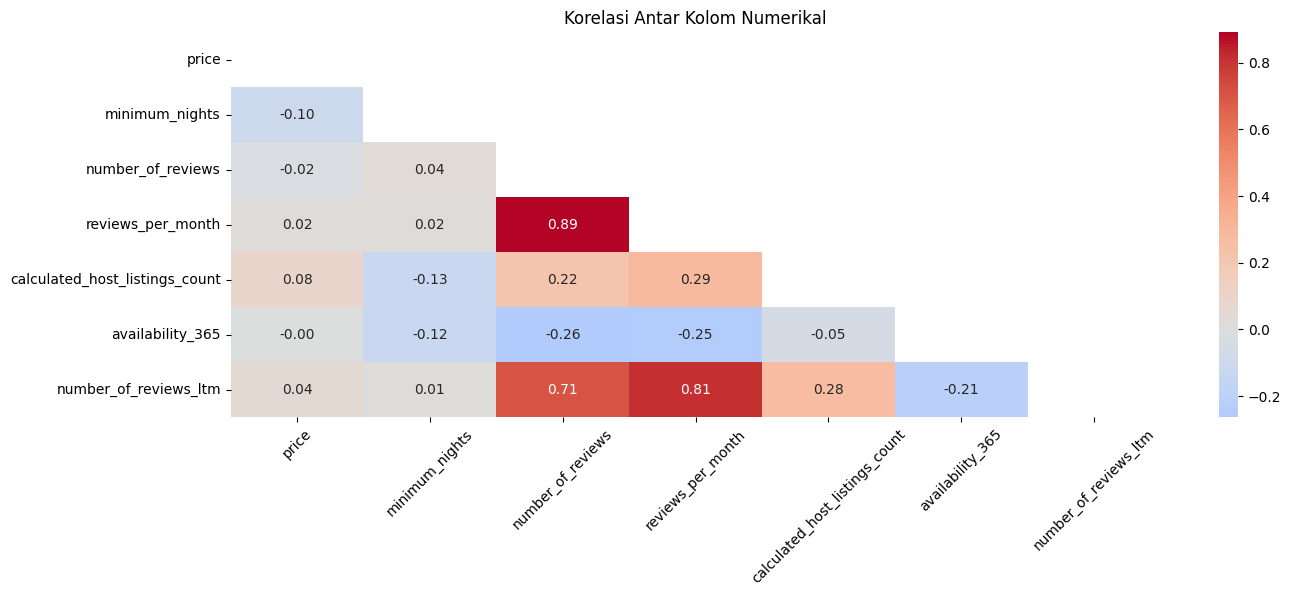

In [323]:
# Membuat korelasi menggunakan metode 'spearman'
df_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr(method='spearman')

# Membuat matriks yang akan digunakan
matriks = np.triu(df_corr)

# Memvisualisasikan korelasi dalam bentuk 'heatmap'
plt.figure(figsize=(15,5))
sns.heatmap(data=df_corr, annot=True, cmap='coolwarm', center=0, mask=matriks, fmt='.2f')
plt.xticks(rotation= 45)
plt.title("Korelasi Antar Kolom Numerikal")
plt.show()

### Insight :
- Terdapat 3 Korelasi yang masuk dalam kategori kuat positif (0.7 - 1). Maka, semakin tinggi nilai suatu data maka semakin tinggi kolom lainnya.
- kolom `reviews_per_month` berhubungan dengan `number_of_reviews`
- kolom `number_of_reviews_ltm` berhubungan dengan `number_of_reviews`
- kolom `number_of_reviews_ltm` berhubungan dengan `reviews_per_month`

## **B. Analisa berdasarkan `last_review` (Terakhir Mendapatkan Review)**

### **a. `last_review` Berdasarkan Tahun**

In [324]:
# Membuat Kolom Baru Berdasarkan Tahun Terakhir Mendapatkan Review
df_last_review['Year']= df_last_review['last_review'].apply(lambda x : str(x)[:4])
df_last_review.head()

id                                            name  host_id host_name  \
0    27934                 Nice room with superb city view   120437    Nuttee   
3    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
5  1704776                  NEw Pro!!  Bungalow Bkk Centre  2129668  Wimonpak   
6    48736                 Condo with Chaopraya River View   222005  Athitaya   
8  1744248              Batcave, Pool view, near Chatuchak  9181769       Nol   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
3      Din Daeng  13.78823  100.57256     Private room   1286               7   
5  Bang Kho laen  13.69757  100.52880  Entire home/apt   1000             250   
6     Rat Burana  13.68556  100.49535     Private room   1558               3   
8     Chatu Chak  13.81693  100.56433  Entire home/apt   1558               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
3                  2  2022-04-01               0.03   
5                 19  2017-08-03               0.17   
6                  1  2014-02-03               0.01   
8                 10  2016-03-29               0.09   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
3                               1               323                      1   
5                              41               365                      0   
6                               1               365                      0   
8                               1               365                      0   

            region  Year  
0  Central Bangkok  2020  
3  Central Bangkok  2022  
5    South Bangkok  2017  
6   South Thonburi  2014  
8    North Bangkok  2016

In [325]:
# Membuat DataFrame dengan mengelompokan kolom 'Year' dan menghitung jumlah baris berdasarkan nilai 'Year'
df_year = df_last_review.groupby('Year').count().sort_values('Year',ascending=False).reset_index()[['Year', 'id']]

# Membuat Kolom baru untuk mengetahui persentase pertahunnya
df_year['id'].sum()
df_year['persentase'] = df_year['id'] / df_year['id'].sum() * 100
df_year

Year    id  persentase
0   2022  6628   65.871596
1   2021   207    2.057245
2   2020  1248   12.403101
3   2019  1012   10.057643
4   2018   484    4.810177
5   2017   267    2.653548
6   2016   149    1.480819
7   2015    50    0.496919
8   2014     9    0.089445
9   2013     7    0.069569
10  2012     1    0.009938

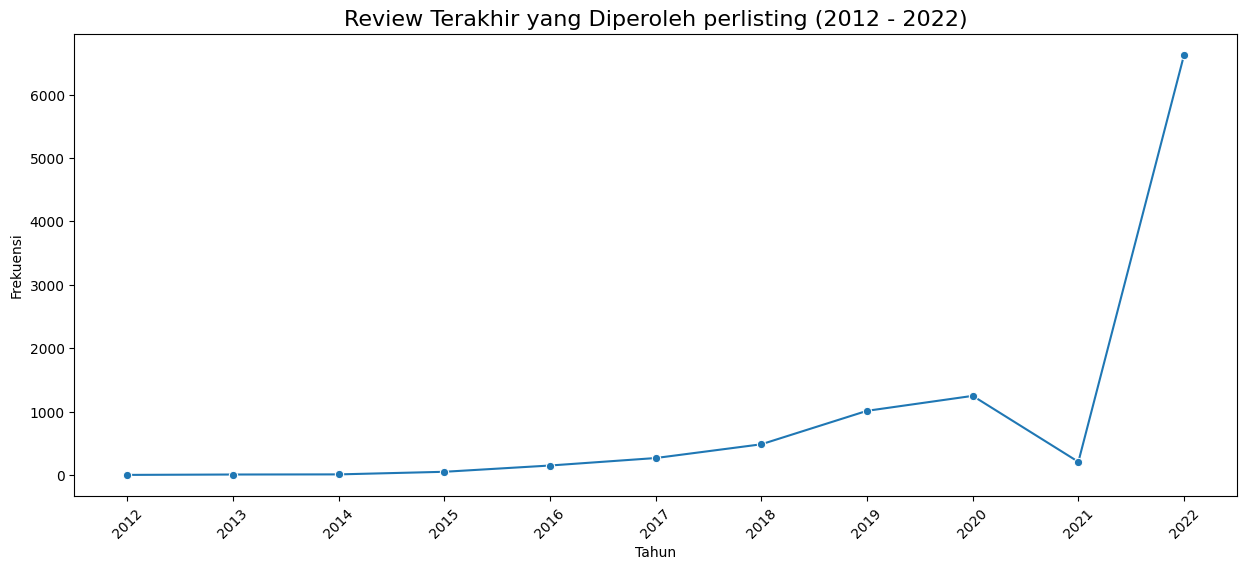

In [326]:
tahun = df_year['Year']
jumlah = df_year['id']

# Memvisualisasikan Review terakhir yang didapat listing berdasarkan Tahunnya
plt.figure(figsize=(15,6))

sns.lineplot(data = df_year.sort_values('Year'),x = 'Year',y = 'id',marker='o')
plt.title('Review Terakhir yang Diperoleh perlisting (2012 - 2022)', size=16)
plt.xticks(ticks = tahun, rotation = 45)

plt.xlabel('Tahun')
plt.ylabel('Frekuensi')

plt.show()


### Insight :
- Jumlah listing yang mendapat review terakhir yang paling banyak adalah pada **Tahun 2022**
- Pada tahun 2020 jumlah listing yang mendapatkan review terakhirnya berjumlah **1248**. Hal ini dapat diasumsikan listing pada tahun tersebut mendapatkan review terakhirnya, karena pada tahun tersebut muncul sebuah pandemi **Covid**.
- Jumlah listing yang masih mendapatkan review pada tahun 2022 sebanyak **65.87%**, dapat diasumsikan bahwa hanya sebagian listing yang mendapat penyewa pada tahun 2022 atau hanya sebagian listing yang masih beroperasi.
- hal ini juga dapat diasumsikan hanya sebagian listing yang beroperasi pada tiap tahunnya.

In [327]:
# Mengubah kolom 'Year' menjadi datetime
df_last_review['Year'] = pd.to_datetime(df_last_review['Year'])

## **C. Analisa Berdasarkan `room_type`**

Terdapat 4 Tipe Ruangan yang terdaftar dalam data:
- `Entire home/apt` : Tipe ruangan yang baik apabila penyewa ingin mencari rumah yang jauh dari rumahnya. Dengan seluruh rumah, penyewa dapat memiliki seluruh ruangan yang ada didalamnya.
- `Private room` : Tipe ruangan yang baik apabila penyewa ingin mendapatkan sedikit privasi. Saat penyewa memesan kamar pribadi, penyewa akan memiliki kamar pribadi untuk tidur, tetapi terdapat kemungkinan bahwa penyewa akan berbagi beberapa ruangan dengan penyewa lainnya.
- `Hotel room` : Tipe ruangan yang dikhususkan apabila penyewa ingin mendapatkan privasi dan mendapatkan fasilitas hotel. Saat penyewa memesan tipe ruangan ini, penyewa akan tidur dalam suatu ruangan khusus
- `Shared room` : Tipe ruangan yang dikhususkan apabila penyewa tidak keberatan dengan penyewa lainnya. Saat penyewa memesan tipe ruangan ini, penyewa akan tidur dalam ruang yang sama dengan penyewa lainnya dan berbagi keseluruhan ruang. 



### **a. `room_type` Secara Keseluruhan**

#### **i. `room_type` Berdasarkan Minimum Malam untuk Menyewa**

In [328]:
# Menampilkan minimal malam untuk menyewa berdasarkan median 'minimum_nights'
df_MN = df.groupby('room_type')['minimum_nights'].median()
df_MN = pd.DataFrame(df_MN).reset_index()
df_MN

room_type  minimum_nights
0  Entire home/apt             3.0
1       Hotel room             1.0
2     Private room             1.0
3      Shared room             1.0

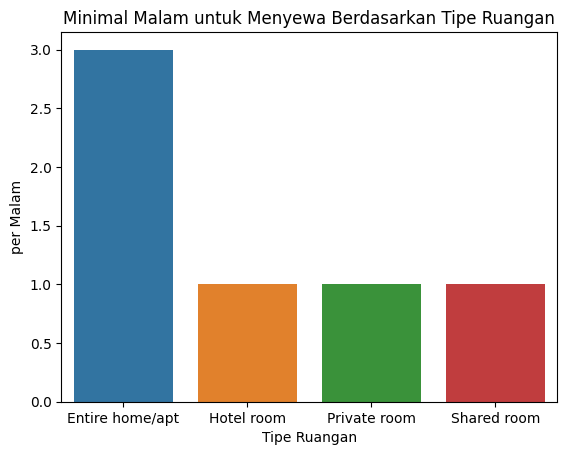

In [329]:
ax = sns.barplot(data=df_MN, x='room_type', y='minimum_nights', estimator=sum)
plt.title('Minimal Malam untuk Menyewa Berdasarkan Tipe Ruangan')

plt.xlabel('Tipe Ruangan')
plt.ylabel('per Malam')

plt.show()

Berdasarkan grafik tersebut, minimal malam untuk menyewa adalah:
- `Entire home/apt` : 3 malam
- `Hotel room` : 1 malam
- `Private room` : 1 malam
- `Shared room` : 1 malam

#### **ii. `room_type` Berdasarkan Jumlah Keseluruhan Listing**

In [330]:
# Menghitung Jumlah Ruangan Berdasarkan Tipenya
df_RT = df['room_type'].value_counts()
df_RT = pd.DataFrame(df_RT).reset_index()

# Membuat persentase per Tipe Ruangan
df_RT['persentase'] = df_RT['count'] / df_RT['count'].sum() * 100
df_RT

room_type  count  persentase
0  Entire home/apt   8907   56.234611
1     Private room   5761   36.372246
2       Hotel room    649    4.097481
3      Shared room    522    3.295663

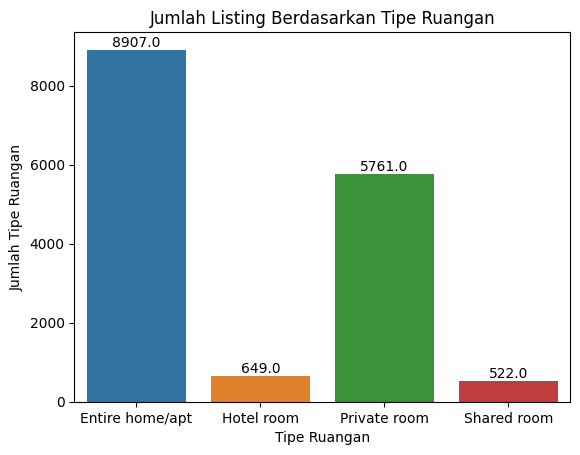

In [331]:
ax = sns.barplot(data=df_RT.sort_values('room_type'), x='room_type', y='count', estimator=sum)
plt.title('Jumlah Listing Berdasarkan Tipe Ruangan')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Jumlah Tipe Ruangan')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Tipe Ruangan yang paling banyak disewakan adalah `Entire home/apt` dengan jumlah **8907** dan persentasenya adalah **56.23 %**

#### **iii. `room_type` Berdasarkan Harga yang ditawarkan**

In [332]:
# Menampilkan harga yang ditawarkan berdasarkan median 'price'
df_price = df.groupby('room_type')['price'].median()
df_price = pd.DataFrame(df_price).reset_index()
df_price

room_type   price
0  Entire home/apt  1536.0
1       Hotel room  1700.0
2     Private room  1212.0
3      Shared room   500.0

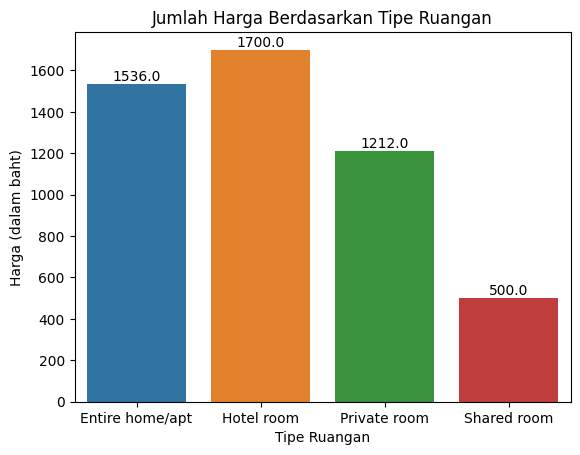

In [333]:
ax = sns.barplot(data=df_price, x='room_type', y='price', estimator=sum)
plt.title('Jumlah Harga Berdasarkan Tipe Ruangan')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Harga (dalam baht)')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Tipe ruangan yang paling mahal adalah `Hotel room` dengan median harga **1700 baht** untuk 1 malam
- Tipe ruangan yang paling murah adalah `Shared room` dengan median harga **500 baht** untuk 1 malam

### **b. Jumlah `room_type` Berdasarkan `number_of_reviews`**

#### **i. Jumlah `room_type` Berdasarkan `number_of_reviews` >= 1**

In [334]:
df_nor_reviewed.head(1)

id                             name  host_id host_name neighbourhood  \
0  27934  Nice room with superb city view   120437    Nuttee   Ratchathewi   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   

            region  
0  Central Bangkok

In [335]:
# Menghitung Jumlah Ruangan Berdasarkan Tipenya
df_RT = df_nor_reviewed['room_type'].value_counts()
df_RT = pd.DataFrame(df_RT).reset_index()

# Membuat persentase per Tipe Ruangan
df_RT['persentase'] = df_RT['count'] / df_RT['count'].sum() * 100
df_RT

room_type  count  persentase
0  Entire home/apt   6568   65.275293
1     Private room   2839   28.215067
2       Hotel room    450    4.472272
3      Shared room    205    2.037368

In [336]:
# membuat salinan dari df_RT untuk membuat dataframe perbandingan
df_nor_1 = df_RT.copy()

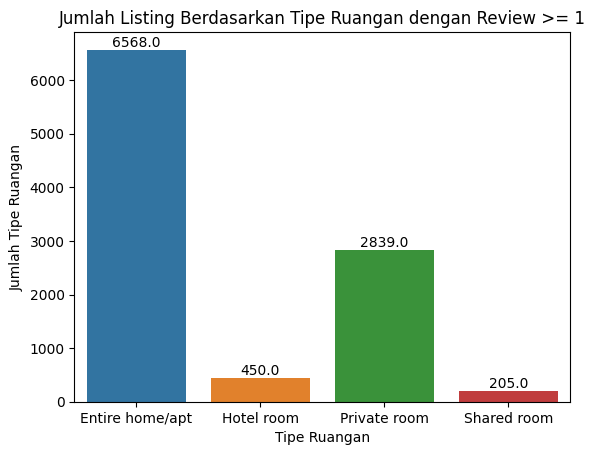

In [337]:
ax = sns.barplot(data=df_nor_reviewed.sort_values('room_type'), x='room_type', y='id', estimator=len)
plt.title('Jumlah Listing Berdasarkan Tipe Ruangan dengan Review >= 1')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Jumlah Tipe Ruangan')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Tipe Ruangan yang paling banyak disewakan adalah `Entire home/apt` dengan jumlah **6568** dan persentasenya adalah **65.27 %**

##### **`room_type` Berdasarkan `number_of_reviews` >= 1 dan `price` yang ditawarkan**

In [338]:
# Menampilkan harga yang ditawarkan berdasarkan median 'price'
df_price = df_nor_reviewed.groupby('room_type')['price'].median()
df_price = pd.DataFrame(df_price).reset_index()
df_price

room_type   price
0  Entire home/apt  1500.0
1       Hotel room  1507.0
2     Private room  1100.0
3      Shared room   440.0

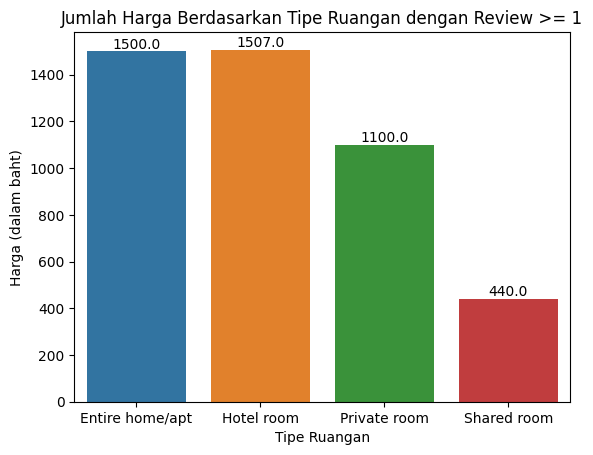

In [339]:
ax = sns.barplot(data=df_price, x='room_type', y='price', estimator=sum)
plt.title('Jumlah Harga Berdasarkan Tipe Ruangan dengan Review >= 1')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Harga (dalam baht)')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Tipe ruangan yang paling mahal adalah `Hotel room` dengan median harga **1507 baht** untuk 1 malam
- Tipe ruangan yang paling murah adalah `Shared room` dengan median harga **440 baht** untuk 1 malam

#### **ii. Jumlah `room_type` Berdasarkan `number_of_reviews` < 1**

In [340]:
df_nor_notrev.head(1)

id                            name  host_id host_name neighbourhood  \
0  27979  Easy going landlord,easy place   120541       Emy       Bang Na   

   latitude  longitude     room_type  price  minimum_nights  \
0  13.66818  100.61674  Private room   1316               1   

   number_of_reviews last_review  reviews_per_month  \
0                  0         NaT                0.0   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               358                      0   

          region  
0  South Bangkok

In [341]:
# Menghitung Jumlah Ruangan Berdasarkan Tipenya
df_RT = df_nor_notrev['room_type'].value_counts()
df_RT = pd.DataFrame(df_RT).reset_index()

# Membuat persentase per Tipe Ruangan
df_RT['persentase'] = df_RT['count'] / df_RT['count'].sum() * 100
df_RT

room_type  count  persentase
0     Private room   2922   50.579886
1  Entire home/apt   2339   40.488143
2      Shared room    317    5.487277
3       Hotel room    199    3.444694

In [342]:
# membuat salinan dari df_RT untuk membuat dataframe perbandingan
df_nor_0 = df_RT.copy()

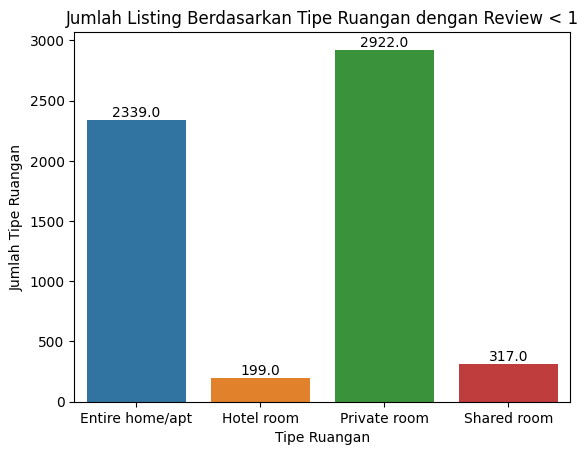

In [343]:
ax = sns.barplot(data=df_nor_notrev.sort_values('room_type'), x='room_type', y='id', estimator=len)
plt.title('Jumlah Listing Berdasarkan Tipe Ruangan dengan Review < 1')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Jumlah Tipe Ruangan')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Tipe Ruangan yang paling banyak tidak mendapat review adalah `Private room` dengan jumlah **2922** dan persentasenya adalah **50.57 %**

In [344]:
# membuat tabel perbandingan persentase number
df_nor_1 = df_nor_1.drop(columns=('persentase')).rename(columns={'count':'jumlah_rev_>1'})
df_nor_0 = df_nor_0.drop(columns=('persentase')).rename(columns={'count':'jumlah_rev_0'})

In [345]:
# membuat kolom-kolom tambahan untuk mengetahui informasi dari perbandingan
df_nor_total = pd.merge(left=df_nor_1, right=df_nor_0, on='room_type')
df_nor_total['total'] = df_nor_total['jumlah_rev_>1'] + df_nor_total['jumlah_rev_0']
df_nor_total['persentase_>1'] = df_nor_total['jumlah_rev_>1'] / df_nor_total['total'] * 100
df_nor_total['persentase_0'] = df_nor_total['jumlah_rev_0'] / df_nor_total['total'] * 100
df_nor_total

room_type  jumlah_rev_>1  jumlah_rev_0  total  persentase_>1  \
0  Entire home/apt           6568          2339   8907      73.739755   
1     Private room           2839          2922   5761      49.279639   
2       Hotel room            450           199    649      69.337442   
3      Shared room            205           317    522      39.272031   

   persentase_0  
0     26.260245  
1     50.720361  
2     30.662558  
3     60.727969

Berdasarkan tabel perbandingan antara **Tipe Ruangan dengan `number_of_reviews` >=1** dan **Tipe Ruangan dengan `number_of_reviews` <1** adalah :
- Untuk `number_of_review` >= 1, tipe ruangan yang paling besar persentasenya adalah **Entire home/apt**
- Untuk `number_of_review` < 1, tipe ruangan yang paling besar persentasenya adalah **Shared room**

##### **`room_type` Berdasarkan `number_of_reviews` < 1 dan `price` yang ditawarkan**

In [346]:
# Menampilkan harga yang ditawarkan berdasarkan median 'price'
df_price = df_nor_notrev.groupby('room_type')['price'].median()
df_price = pd.DataFrame(df_price).reset_index()
df_price

room_type   price
0  Entire home/apt  1659.0
1       Hotel room  2000.0
2     Private room  1429.0
3      Shared room   550.0

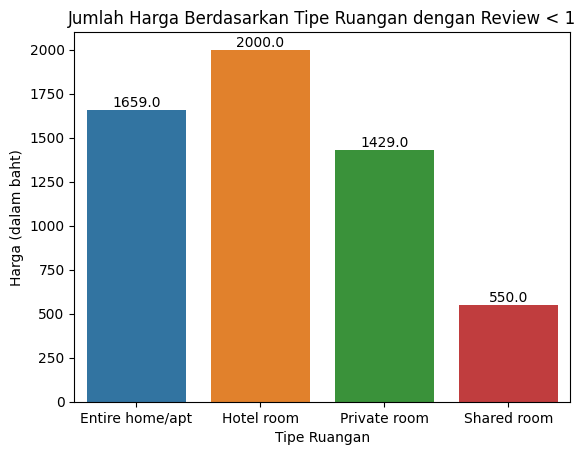

In [347]:
ax = sns.barplot(data=df_price, x='room_type', y='price', estimator=sum)
plt.title('Jumlah Harga Berdasarkan Tipe Ruangan dengan Review < 1')

plt.xlabel('Tipe Ruangan')
plt.ylabel('Harga (dalam baht)')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan Grafik Tersebut :
- Tipe ruangan yang paling mahal adalah `Hotel room` dengan median harga **2000 baht** untuk 1 malam
- Tipe ruangan yang paling murah adalah `Shared room` dengan median harga **550 baht** untuk 1 malam

### Insight :
Secara Keseluruhan dalam Analisis `room_type`:

- `room_type` berdasarkan minimum menyewa permalam adalah:
    - `Entire home/apt` : 3 malam
    - `Hotel room` : 1 malam
    - `Private room` : 1 malam
    - `Shared room` : 1 malam
<br><br>
- `room_type` berdasarkan jumlah listing :
    - Seluruh listing : - Tipe Ruangan yang paling banyak disewakan adalah `Entire home/apt` dengan jumlah **8907** dan persentasenya adalah **56.23 %**
    - Tipe Ruangan yang paling banyak disewakan berdasarkan `number_of_reviews >= 1` adalah `Entire home/apt` dengan jumlah **6586** dan persentasenya adalah **65.27 %**
    - Tipe Ruangan yang paling banyak tidak mendapat review berdasarkan `number_of_reviews < 1` adalah `Private room` dengan jumlah **2922** dan persentasenya adalah **50.57 %**
<br><br>
- `room_type` berdasarkan `price` :
    - Tipe ruangan yang paling mahal adalah `Hotel room` dengan median harga **1700 baht** untuk 1 malam
    - Tipe ruangan yang paling mahal berdasarkan `number_of_reviews >= 1` adalah `Hotel room` dengan median harga **1507 baht** untuk 1 malam
    - Tipe ruangan yang paling mahal berdasarkan `number_of_reviews < 1` adalah `Hotel room` dengan median harga **2000 baht** untuk 1 malam

    
    

## **D. Analisa Berdasarkan `region`**

### **a. `region` Secara Keseluruhan**

#### **i. `region` Berdasarkan `room_type`**

In [348]:
# Membuat tabel dengan jumlah listing per'region' dan 'room_type'nya
df_reg_rt = df.pivot_table(
    index= ['region', 'room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index()
df_reg_rt['total'] = df_reg_rt.groupby('region')['id'].transform('sum')
df_reg_rt['persentase'] = df_reg_rt['id'] / df_reg_rt['total'] * 100
df_reg_rt

region        room_type    id  total  persentase
0   Central Bangkok  Entire home/apt  2042   4147   49.240415
1   Central Bangkok       Hotel room   233   4147    5.618519
2   Central Bangkok     Private room  1589   4147   38.316856
3   Central Bangkok      Shared room   283   4147    6.824210
4      East Bangkok  Entire home/apt   355    826   42.978208
5      East Bangkok       Hotel room    20    826    2.421308
6      East Bangkok     Private room   426    826   51.573850
7      East Bangkok      Shared room    25    826    3.026634
8     North Bangkok  Entire home/apt   611   1303   46.891788
9     North Bangkok       Hotel room    20   1303    1.534919
10    North Bangkok     Private room   653   1303   50.115119
11    North Bangkok      Shared room    19   1303    1.458173
12   North Thonburi  Entire home/apt   564   1133   49.779347
13   North Thonburi       Hotel room    37   1133    3.265666
14   North Thonburi     Private room   502   1133   44.307149
15   North Thonburi      Shared room    30   1133    2.647838
16    South Bangkok  Entire home/apt  5155   8072   63.862735
17    South Bangkok       Hotel room   337   8072    4.174926
18    South Bangkok     Private room  2418   8072   29.955401
19    South Bangkok      Shared room   162   8072    2.006938
20   South Thonburi  Entire home/apt   180    358   50.279330
21   South Thonburi       Hotel room     2    358    0.558659
22   South Thonburi     Private room   173    358   48.324022
23   South Thonburi      Shared room     3    358    0.837989

In [349]:
# Membuat tabel yang memberikan informasi jumlah listing berdasarkan region dan persentasenya
df_reg_rt_ = pd.DataFrame(df_reg_rt.groupby('region')['id'].sum().reset_index())
df_reg_rt_['persentase'] = df_reg_rt_['id'] / df_reg_rt_['id'].sum() * 100
df_reg_rt_


region    id  persentase
0  Central Bangkok  4147   26.182208
1     East Bangkok   826    5.214976
2    North Bangkok  1303    8.226529
3   North Thonburi  1133    7.153229
4    South Bangkok  8072   50.962813
5   South Thonburi   358    2.260244

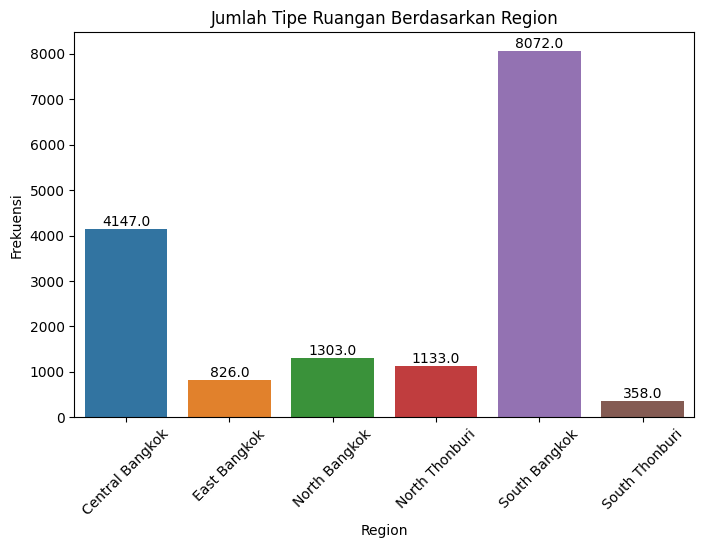

In [350]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df.sort_values('region'), x='region', y='id', estimator=len)
plt.title('Jumlah Tipe Ruangan Berdasarkan Region')

plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Frekuensi')
container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- `South Bangkok` merupakan region dengan jumlah listing terbanyak, sebanyak **8072** dengan persentase **50%**.

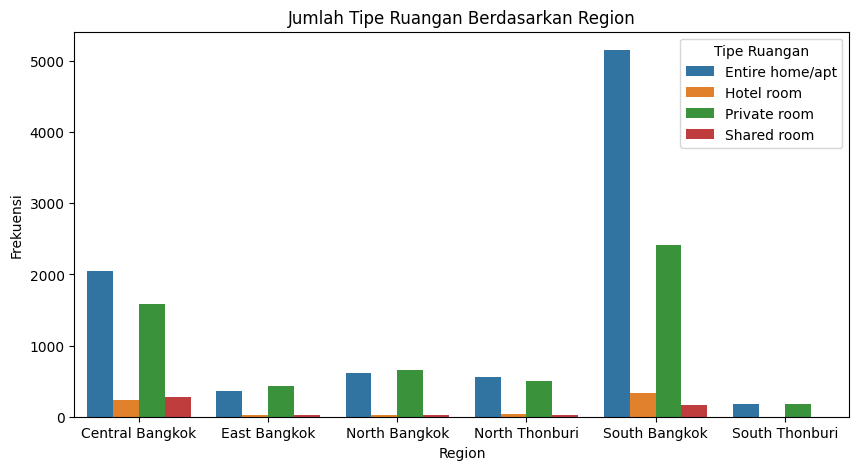

In [351]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df.sort_values(['region','room_type']), x='region', y='id',hue= 'room_type', estimator=len)
plt.title('Jumlah Tipe Ruangan Berdasarkan Region')

plt.xlabel('Region')
plt.ylabel('Frekuensi')
plt.legend(title= 'Tipe Ruangan')

plt.show()

Berdasarkan grafik tersebut :
- Untuk 2 wilayah terbanyak, yaitu `Central Bangkok` dan `South Bangkok` jumlah tipe ruangan yang paling banyak adalah tipe `Entire home/apt` dengan jumlah masing-masing **2042** dan **5155**

#### **ii. `region` berdasarkan `price`**

In [352]:
# Membuat tabel region dengan median harganya
df_reg_price = df.pivot_table(
    index= ['region'],
    values= 'price',
    aggfunc= 'median'
).reset_index().sort_values('region')
df_reg_price


region  price
0  Central Bangkok   1400
1     East Bangkok    990
2    North Bangkok    990
3   North Thonburi   1200
4    South Bangkok   1600
5   South Thonburi    980

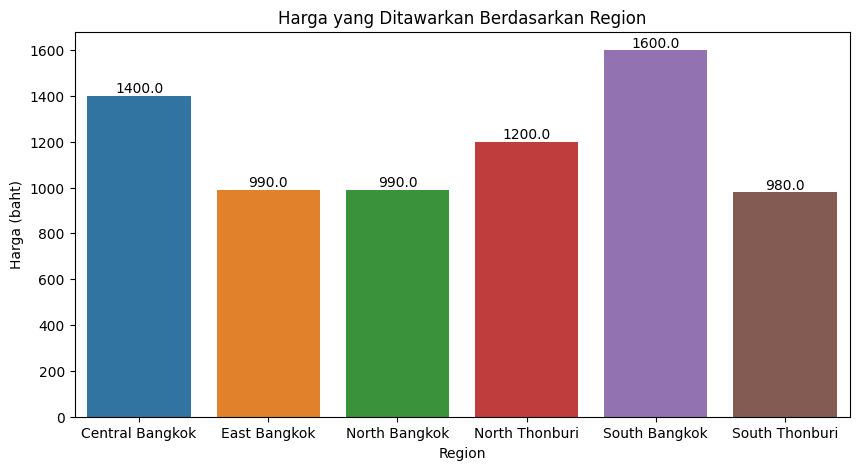

In [353]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_reg_price.sort_values('region'), x='region', y='price', estimator=sum)
plt.title('Harga yang Ditawarkan Berdasarkan Region')

plt.xlabel('Region')
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut:
- Harga yang ditawarkan pemilik listing untuk region `East Bangkok`, `North Bangkok` dan `South Thonburi` berkisar antara **980** - **990** baht.
- region yang menawarkan harga paling tinggi adalah region `South Bangkok`, dengan median harga **1600** baht. 

In [354]:
# Membuat tabel region berdasarkan tipe ruangan dan harganya
df_reg_price = df.pivot_table(
    index= ['region', 'room_type'],
    values= 'price',
    aggfunc= 'median'
).reset_index().sort_values('region')
df_reg_price

region        room_type   price
0   Central Bangkok  Entire home/apt  1514.0
1   Central Bangkok       Hotel room  1481.0
2   Central Bangkok     Private room  1316.0
3   Central Bangkok      Shared room   500.0
4      East Bangkok  Entire home/apt  1122.0
5      East Bangkok       Hotel room  1288.0
6      East Bangkok     Private room   899.5
7      East Bangkok      Shared room   390.0
10    North Bangkok     Private room   950.0
11    North Bangkok      Shared room   623.0
8     North Bangkok  Entire home/apt  1000.0
9     North Bangkok       Hotel room   977.5
12   North Thonburi  Entire home/apt  1300.0
13   North Thonburi       Hotel room  1800.0
14   North Thonburi     Private room  1100.0
15   North Thonburi      Shared room   440.0
16    South Bangkok  Entire home/apt  1712.0
17    South Bangkok       Hotel room  1899.0
18    South Bangkok     Private room  1429.0
19    South Bangkok      Shared room   494.5
22   South Thonburi     Private room   900.0
20   South Thonburi  Entire home/apt  1000.0
21   South Thonburi       Hotel room   928.0
23   South Thonburi      Shared room   700.0

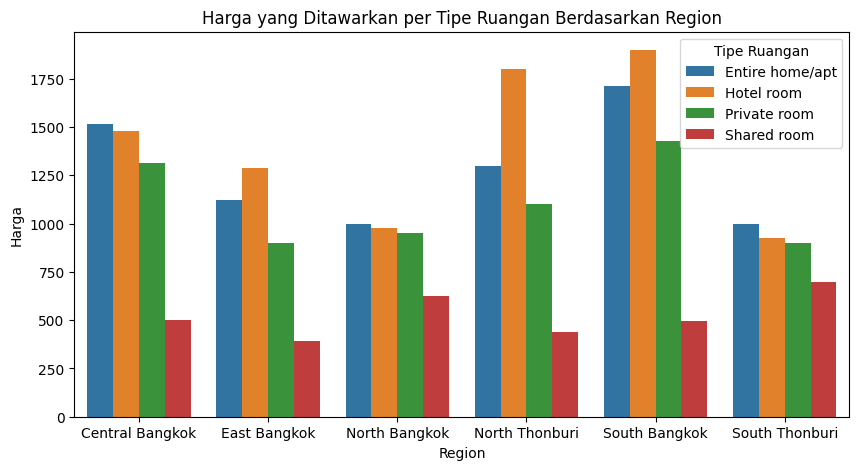

In [355]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_reg_price.sort_values(['region','room_type']), x='region', y='price',hue='room_type', estimator=sum)
plt.title('Harga yang Ditawarkan per Tipe Ruangan Berdasarkan Region')

plt.xlabel('Region')
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan')

plt.show()

Berdasarkan grafik tersebut:
- `room_type` dengan tipe `Entire home/apt` dan `Hotel room` merupakan tipe ruangan yang menempati harga termahal pada posisi 1 atau 2 pada keseluruhan region.

### **b. `region` berdasarkan `number_of_reviews`**

#### **i. `region` berdasarkan `number_of_reviews` >= 1**

In [356]:
df_nor_reviewed.head(1)

id                             name  host_id host_name neighbourhood  \
0  27934  Nice room with superb city view   120437    Nuttee   Ratchathewi   

   latitude  longitude        room_type  price  minimum_nights  \
0  13.75983  100.54134  Entire home/apt   1905               3   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06                0.5   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   

            region  
0  Central Bangkok

In [357]:
# Membuat tabel region berdasarkan tipe ruangannya dan jumlah listingnya
df_RT = df_nor_reviewed.pivot_table(
    index= ['region', 'room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index()
df_RT

region        room_type    id
0   Central Bangkok  Entire home/apt  1491
1   Central Bangkok       Hotel room   170
2   Central Bangkok     Private room   915
3   Central Bangkok      Shared room   102
4      East Bangkok  Entire home/apt   183
5      East Bangkok       Hotel room    20
6      East Bangkok     Private room   171
7      East Bangkok      Shared room    10
8     North Bangkok  Entire home/apt   395
9     North Bangkok       Hotel room    14
10    North Bangkok     Private room   282
11    North Bangkok      Shared room     4
12   North Thonburi  Entire home/apt   372
13   North Thonburi       Hotel room    22
14   North Thonburi     Private room   219
15   North Thonburi      Shared room    15
16    South Bangkok  Entire home/apt  4010
17    South Bangkok       Hotel room   223
18    South Bangkok     Private room  1196
19    South Bangkok      Shared room    74
20   South Thonburi  Entire home/apt   117
21   South Thonburi       Hotel room     1
22   South Thonburi     Private room    56

In [358]:
# Membuat tabel jumlah listing berdasarkan region dan persentasenya
df_RT_group = df_RT.groupby('region')[['id']].sum().reset_index()
df_RT_group['persentase'] = df_RT_group['id'] / df_RT_group['id'].sum() * 100
df_RT_group

region    id  persentase
0  Central Bangkok  2678   26.614987
1     East Bangkok   384    3.816339
2    North Bangkok   695    6.907176
3   North Thonburi   628    6.241304
4    South Bangkok  5503   54.690916
5   South Thonburi   174    1.729278

In [359]:
# membuat salinan dari df_RT_group untuk membuat dataframe perbandingan
df_region_1 = df_RT_group.copy()

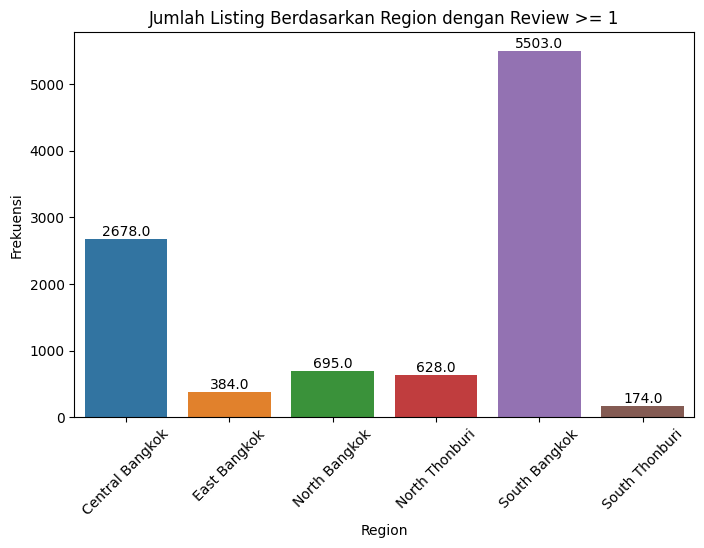

In [360]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_nor_reviewed.sort_values('region'), x='region', y='id', estimator=len)
plt.title('Jumlah Listing Berdasarkan Region dengan Review >= 1')

plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Frekuensi')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- `region` yang memiliki listing dengan review > 1 paling banyak adalah `Souht Bangkok`

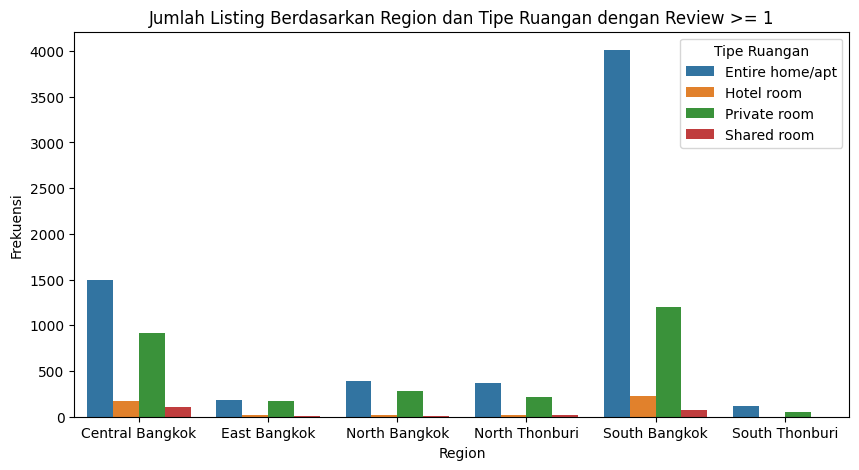

In [361]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_nor_reviewed.sort_values(['region','room_type']), x='region', y='id', hue='room_type', estimator=len)
plt.title('Jumlah Listing Berdasarkan Region dan Tipe Ruangan dengan Review >= 1')

plt.xlabel('Region')
plt.ylabel('Frekuensi')
plt.legend(title= 'Tipe Ruangan')

plt.show()

Berdasarkan grafik tersebut :
- Tipe Ruangan yang paling banyak mendapat review adalah `Entire home/apt` pada `region` `South Bangkok` dengan jumlah **4010** listing

#### **ii. `region` berdasarkan `number_of_reviews` < 1**

In [362]:
df_nor_notrev.head(1)

id                            name  host_id host_name neighbourhood  \
0  27979  Easy going landlord,easy place   120541       Emy       Bang Na   

   latitude  longitude     room_type  price  minimum_nights  \
0  13.66818  100.61674  Private room   1316               1   

   number_of_reviews last_review  reviews_per_month  \
0                  0         NaT                0.0   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               358                      0   

          region  
0  South Bangkok

In [363]:
# Membuat tabel tipe ruangan berdasarkan regionnya dan jumlah listingnya
df_RT = df_nor_notrev.pivot_table(
    index= ['region', 'room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index()
df_RT

region        room_type    id
0   Central Bangkok  Entire home/apt   551
1   Central Bangkok       Hotel room    63
2   Central Bangkok     Private room   674
3   Central Bangkok      Shared room   181
4      East Bangkok  Entire home/apt   172
5      East Bangkok     Private room   255
6      East Bangkok      Shared room    15
7     North Bangkok  Entire home/apt   216
8     North Bangkok       Hotel room     6
9     North Bangkok     Private room   371
10    North Bangkok      Shared room    15
11   North Thonburi  Entire home/apt   192
12   North Thonburi       Hotel room    15
13   North Thonburi     Private room   283
14   North Thonburi      Shared room    15
15    South Bangkok  Entire home/apt  1145
16    South Bangkok       Hotel room   114
17    South Bangkok     Private room  1222
18    South Bangkok      Shared room    88
19   South Thonburi  Entire home/apt    63
20   South Thonburi       Hotel room     1
21   South Thonburi     Private room   117
22   South Thonburi      Shared room     3

In [364]:
# membuat tabel region yang menghitung jumlah listing dan persentasenya
df_RT_group = df_RT.groupby('region')[['id']].sum().reset_index()
df_RT_group['persentase'] = df_RT_group['id'] / df_RT_group['id'].sum() * 100
df_RT_group

region    id  persentase
0  Central Bangkok  1469   25.428423
1     East Bangkok   442    7.651030
2    North Bangkok   608   10.524494
3   North Thonburi   505    8.741561
4    South Bangkok  2569   44.469448
5   South Thonburi   184    3.185044

In [365]:
# membuat salinan dari df_RT_group untuk membuat dataframe perbandingan
df_region_0 = df_RT_group.copy()

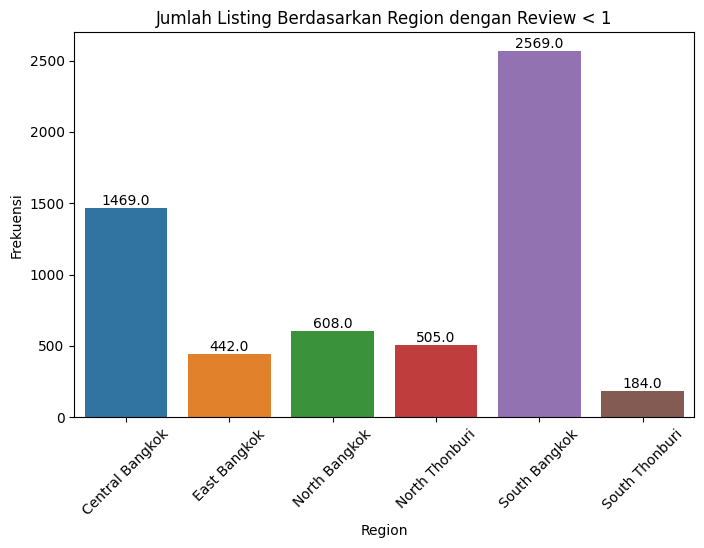

In [366]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_nor_notrev.sort_values('region'), x='region', y='id',  estimator=len)
plt.title('Jumlah Listing Berdasarkan Region dengan Review < 1')

plt.xlabel('Region')
plt.xticks(rotation=45)
plt.ylabel('Frekuensi')

container = ax.containers[0]

ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- `region` yang memiliki listing dengan review < 1 paling banyak adalah `Souht Bangkok`

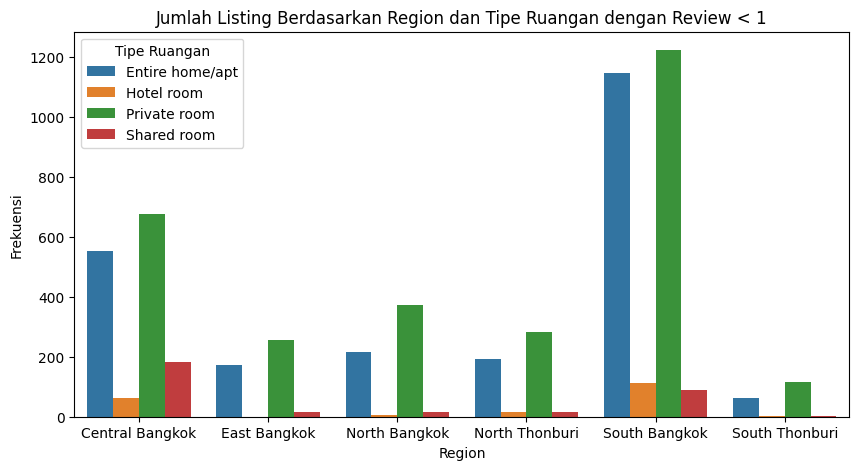

In [367]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_nor_notrev.sort_values(['region','room_type']), x='region', y='id', hue='room_type', estimator=len)
plt.title('Jumlah Listing Berdasarkan Region dan Tipe Ruangan dengan Review < 1')

plt.xlabel('Region')
plt.ylabel('Frekuensi')
plt.legend(title= 'Tipe Ruangan')

plt.show()

Berdasarkan grafik tersebut :
- Tipe Ruangan yang paling banyak belum mendapat review adalah `Entire home/apt` pada `region` `South Bangkok` dengan jumlah **1145** listing

In [368]:
# membuat tabel perbandingan persentase number
df_region_1 = df_region_1.drop(columns=('persentase')).rename(columns={'id':'jumlah_rev_>1'})
df_region_0 = df_region_0.drop(columns=('persentase')).rename(columns={'id':'jumlah_rev_0'})


In [369]:
# membuat kolom-kolom tambahan untuk mengetahui informasi dari perbandingan
df_region_total = pd.merge(left=df_region_1, right=df_region_0, on='region')
df_region_total['total'] = df_region_total['jumlah_rev_>1'] + df_region_total['jumlah_rev_0']
df_region_total['persentase_>1'] = df_region_total['jumlah_rev_>1'] / df_region_total['total'] * 100
df_region_total['persentase_0'] = df_region_total['jumlah_rev_0'] / df_region_total['total'] * 100
df_region_total

region  jumlah_rev_>1  jumlah_rev_0  total  persentase_>1  \
0  Central Bangkok           2678          1469   4147      64.576803   
1     East Bangkok            384           442    826      46.489104   
2    North Bangkok            695           608   1303      53.338450   
3   North Thonburi            628           505   1133      55.428067   
4    South Bangkok           5503          2569   8072      68.173935   
5   South Thonburi            174           184    358      48.603352   

   persentase_0  
0     35.423197  
1     53.510896  
2     46.661550  
3     44.571933  
4     31.826065  
5     51.396648

Berdasarkan tabel perbandingan jumlah listing antara **Region dengan `number_of_reviews` >=1** dan **Region dengan `number_of_reviews` <1** adalah :
- Untuk `number_of_review` >= 1, Region yang paling besar persentasenya adalah **South Bangkok**
- Untuk `number_of_review` < 1, Region yang paling besar persentasenya adalah **East Bangkok**

### **c. `region` dalam Tahun 2022**

In [370]:
# Membuat dataframe yang berisi hanya tahun 2022
df_region_2022 = df_last_review[df_last_review['Year']=='2022-01-01'].reset_index(drop=True)
display(df_region_2022.head(3),
df_region_2022.shape)

id                                            name  host_id host_name  \
0    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
1  1765918                  2BR apt in a cozy neighborhood  9279712      Jing   
2  1793000                The Duplex - Asoke- Luxury 92sqm  9407280      Timo   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Din Daeng  13.78823  100.57256     Private room   1286               7   
1    Phaya Thai  13.77486  100.54272  Entire home/apt   1893              15   
2       Vadhana  13.74668  100.56137  Entire home/apt   5034              21   

   number_of_reviews last_review  reviews_per_month  \
0                  2  2022-04-01               0.03   
1                129  2022-09-30               1.17   
2                287  2022-11-22               2.59   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               323                      1   
1                               1               356                      1   
2                               1               349                      3   

            region       Year  
0  Central Bangkok 2022-01-01  
1  Central Bangkok 2022-01-01  
2    South Bangkok 2022-01-01

(6628, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **6628 baris** dan **18 kolom**.

#### **i. `region` berdasarkan `room_type`**

In [371]:
# membuat DataFrame berisi 'region' dan jumlah `room_type`
df_region_pivot = df_region_2022.pivot_table(
    index= ['region','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['region', 'room_type'])
df_region_pivot

region        room_type    id
0   Central Bangkok  Entire home/apt  1004
1   Central Bangkok       Hotel room    60
2   Central Bangkok     Private room   497
3   Central Bangkok      Shared room    43
4      East Bangkok  Entire home/apt   103
5      East Bangkok       Hotel room    16
6      East Bangkok     Private room    77
7      East Bangkok      Shared room     2
8     North Bangkok  Entire home/apt   242
9     North Bangkok       Hotel room     2
10    North Bangkok     Private room   133
11    North Bangkok      Shared room     1
12   North Thonburi  Entire home/apt   251
13   North Thonburi       Hotel room     8
14   North Thonburi     Private room    91
15   North Thonburi      Shared room     1
16    South Bangkok  Entire home/apt  3205
17    South Bangkok       Hotel room   106
18    South Bangkok     Private room   666
19    South Bangkok      Shared room    28
20   South Thonburi  Entire home/apt    75
21   South Thonburi     Private room    17

In [372]:
# membuat persentase tiap region berdasarkan jumlah listing
df_region_group = df_region_pivot.groupby('region')['id'].sum().reset_index()
df_region_group['persentase'] = df_region_group['id'] / df_region_group['id'].sum() * 100
df_region_group

region    id  persentase
0  Central Bangkok  1604   24.200362
1     East Bangkok   198    2.987326
2    North Bangkok   378    5.703078
3   North Thonburi   351    5.295715
4    South Bangkok  4005   60.425468
5   South Thonburi    92    1.388051

In [373]:
df_region_pivot.groupby('region')['id'].sum()

# membuat total room_type per region
df_region_pivot['total'] = df_region_pivot.groupby('region')['id'].transform('sum')

# membuat persentase room_type per region
df_region_pivot['persentase'] = df_region_pivot['id'] / df_region_pivot['total'] * 100
df_region_pivot

region        room_type    id  total  persentase
0   Central Bangkok  Entire home/apt  1004   1604   62.593516
1   Central Bangkok       Hotel room    60   1604    3.740648
2   Central Bangkok     Private room   497   1604   30.985037
3   Central Bangkok      Shared room    43   1604    2.680798
4      East Bangkok  Entire home/apt   103    198   52.020202
5      East Bangkok       Hotel room    16    198    8.080808
6      East Bangkok     Private room    77    198   38.888889
7      East Bangkok      Shared room     2    198    1.010101
8     North Bangkok  Entire home/apt   242    378   64.021164
9     North Bangkok       Hotel room     2    378    0.529101
10    North Bangkok     Private room   133    378   35.185185
11    North Bangkok      Shared room     1    378    0.264550
12   North Thonburi  Entire home/apt   251    351   71.509972
13   North Thonburi       Hotel room     8    351    2.279202
14   North Thonburi     Private room    91    351   25.925926
15   North Thonburi      Shared room     1    351    0.284900
16    South Bangkok  Entire home/apt  3205   4005   80.024969
17    South Bangkok       Hotel room   106   4005    2.646692
18    South Bangkok     Private room   666   4005   16.629213
19    South Bangkok      Shared room    28   4005    0.699126
20   South Thonburi  Entire home/apt    75     92   81.521739
21   South Thonburi     Private room    17     92   18.478261

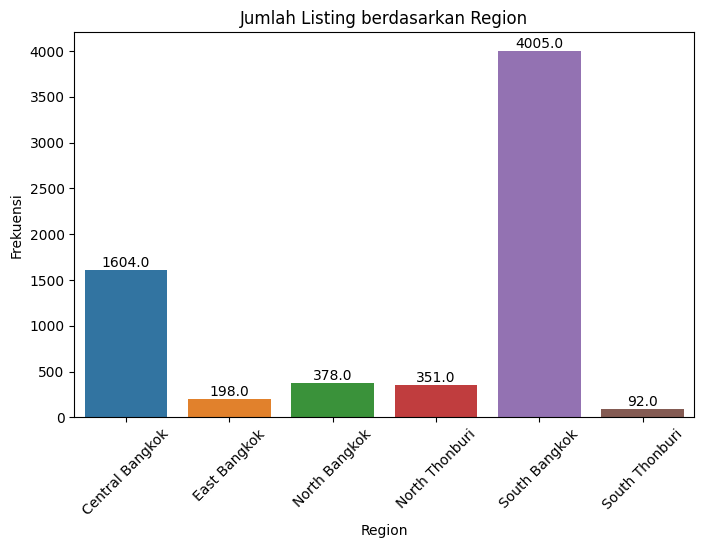

In [374]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_region_pivot.sort_values('region'), x='region', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing berdasarkan Region')

plt.xlabel('Region')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada `region` yang paling banyak adalah wilayah `South Bangkok` dengan persentase sebesar **60%**

<Figure size 1000x600 with 0 Axes>

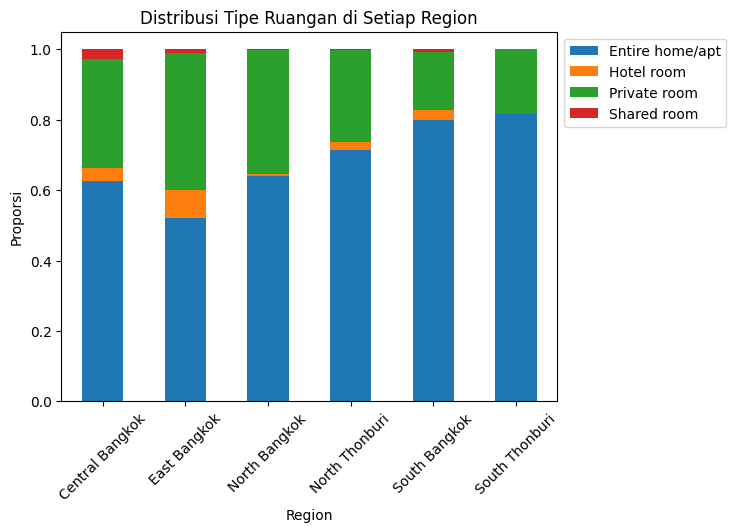

In [375]:
cross_tab = pd.crosstab(df_region_2022['region'], df_region_2022['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Region')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap region.

#### **ii. `region` berdasarkan `price`**

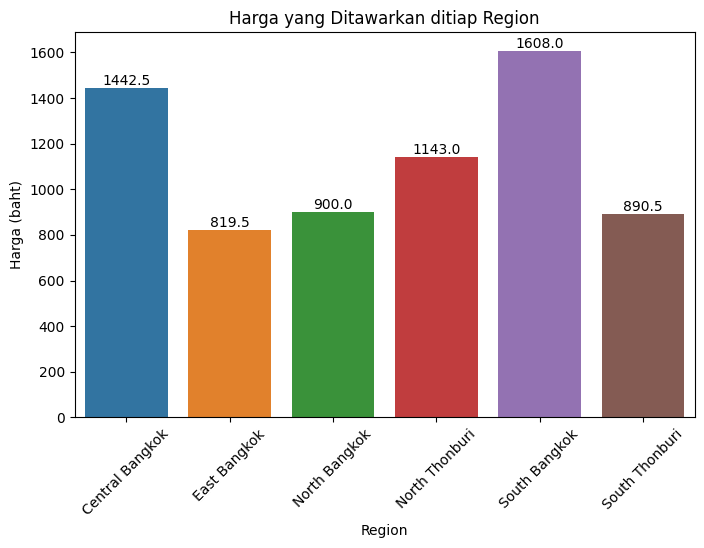

In [376]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_region_2022.sort_values('region'), x='region', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan ditiap Region')

plt.xlabel('Region')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada region `South Bangkok`

In [377]:
# median harga tiap tipe ruangan per region
df_region_2022.groupby(['region', 'room_type'])[['price']].median()

price
region          room_type              
Central Bangkok Entire home/apt  1521.0
                Hotel room       1200.0
                Private room     1179.0
                Shared room       429.0
East Bangkok    Entire home/apt   890.0
                Hotel room       1300.5
                Private room      750.0
                Shared room       405.0
North Bangkok   Entire home/apt   987.0
                Hotel room        611.5
                Private room      850.0
                Shared room       829.0
North Thonburi  Entire home/apt  1200.0
                Hotel room       1678.5
                Private room      850.0
                Shared room       399.0
South Bangkok   Entire home/apt  1714.0
                Hotel room       1853.5
                Private room     1200.0
                Shared room       400.0
South Thonburi  Entire home/apt   900.0
                Private room      700.0

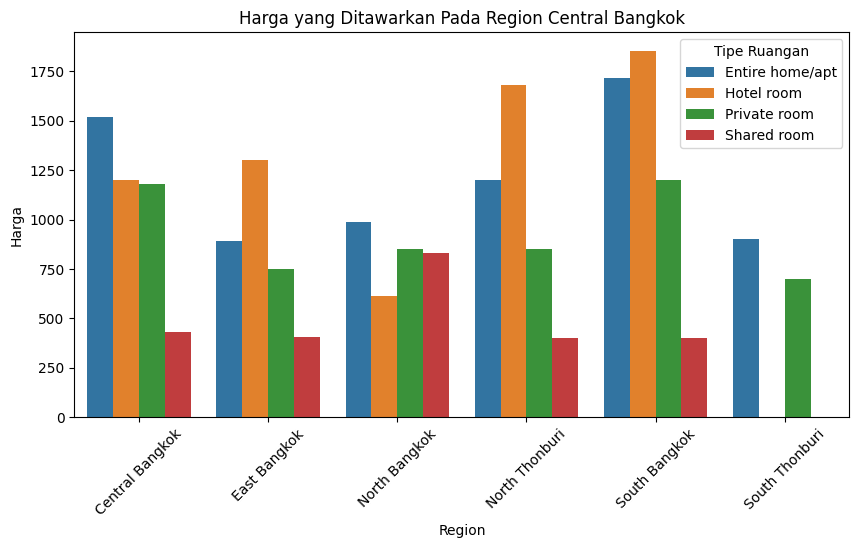

In [378]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_region_2022.sort_values(['region','room_type']), x='region', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region Central Bangkok')
plt.xlabel('Region')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper right')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Hotel room` dan berada pada region `South Bangkok`

#### **iii. `region` berdasarkan `number_of_reviews_ltm`**

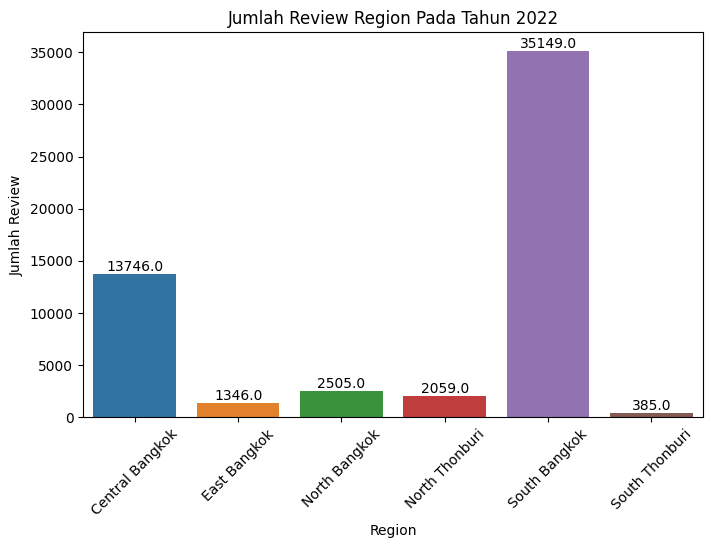

In [379]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_region_2022.sort_values('region'), x='region', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Region Pada Tahun 2022')

plt.xlabel('Region')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `South Bangkok`

### **d. `region` berdasarkan `availability_365 < 365`**

In [380]:
# mengelompokan region
df_region_365 = df_available
display(
    df_region_365.head(),
    df_region_365.shape
)

id                                            name  host_id host_name  \
0   27934                 Nice room with superb city view   120437    Nuttee   
1   27979                  Easy going landlord,easy place   120541       Emy   
2   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
3  952677                   Standard Room Decor do Hostel  5171292    Somsak   
4   55681                   Sathorn Terrace Apartment(61)   263049       Tor   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Din Daeng  13.78823  100.57256     Private room   1286               7   
3    Khlong San  13.72040  100.50757     Private room    700               2   
4      Bang Rak  13.71934  100.51760     Private room   1150               2   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0         NaT               0.00   
2                  2  2022-04-01               0.03   
3                  4  2019-12-27               0.03   
4                 27  2019-01-03               0.19   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               323                      1   
3                              10                87                      0   
4                               7               320                      0   

            region  
0  Central Bangkok  
1    South Bangkok  
2  Central Bangkok  
3   North Thonburi  
4    South Bangkok

(13455, 17)

Jumlah baris dan kolom yang akan dianalisa adalah **13455 baris** dan **17 kolom**.

#### **i. `region` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [381]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_region_365['book_2023'] = 365 - df_region_365['availability_365']
df_region_365.head()

id                                            name  host_id host_name  \
0   27934                 Nice room with superb city view   120437    Nuttee   
1   27979                  Easy going landlord,easy place   120541       Emy   
2   35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
3  952677                   Standard Room Decor do Hostel  5171292    Somsak   
4   55681                   Sathorn Terrace Apartment(61)   263049       Tor   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   Ratchathewi  13.75983  100.54134  Entire home/apt   1905               3   
1       Bang Na  13.66818  100.61674     Private room   1316               1   
2     Din Daeng  13.78823  100.57256     Private room   1286               7   
3    Khlong San  13.72040  100.50757     Private room    700               2   
4      Bang Rak  13.71934  100.51760     Private room   1150               2   

   number_of_reviews last_review  reviews_per_month  \
0                 65  2020-01-06               0.50   
1                  0         NaT               0.00   
2                  2  2022-04-01               0.03   
3                  4  2019-12-27               0.03   
4                 27  2019-01-03               0.19   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               2               358                      0   
2                               1               323                      1   
3                              10                87                      0   
4                               7               320                      0   

            region  book_2023  
0  Central Bangkok         12  
1    South Bangkok          7  
2  Central Bangkok         42  
3   North Thonburi        278  
4    South Bangkok         45

In [382]:
# Menampilkan jumlah hari disewa dan frekuensi untuk data tersebut
df_region_365.value_counts('book_2023')

book_2023
365    857
1      674
185    436
275    334
7      324
      ... 
182      2
345      2
173      1
172      1
168      1
Name: count, Length: 365, dtype: int64

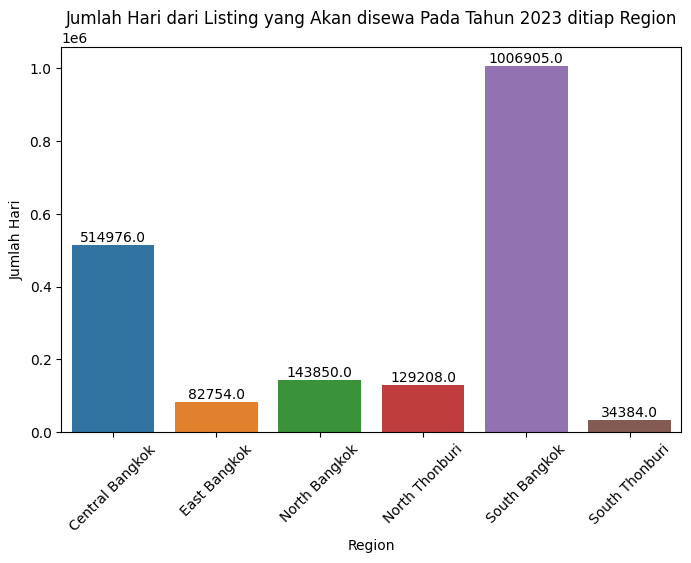

In [383]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_region_365.sort_values('region'), x='region', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 ditiap Region')

plt.xlabel('Region')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `South Bangkok`

<Figure size 1000x600 with 0 Axes>

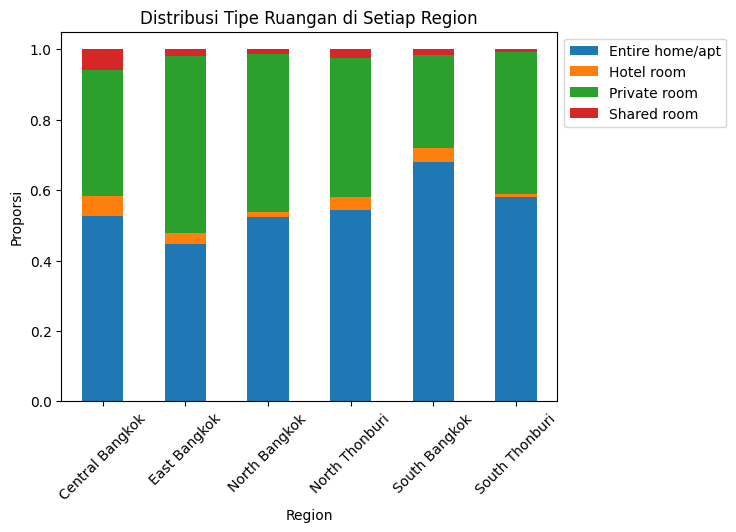

In [384]:
cross_tab = pd.crosstab(df_region_365['region'], df_region_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Region')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

## **E. Analisa Berdasarkan Wilayah dalam `region`**

Pada analisa ini akan menggunakan data dengan klasifikasi:
- `last_review` Tahun 2022 : Kolom ini dapat diasumsikan sebagai jumlah penyewa pada listing, klasifikasi ini dilakukan karena listing pada tahun < 2022 diasumsikan sudah tidak beroperasi lagi dan dianggap tidak dapat bertahan. 
- `availability` < 365 : Kolom ini dapat diasumsikan sebagai jumlah calon penyewa listing pada tahun 2023, klasifikasi ini dilakukan karena pada dataset data terupdate hanya sampai Tahun 2022 Bulan Desember. Kolom ini juga memberi informasi listing yang dapat dipercaya oleh penyewa.

### **a. `Central Bangkok`**

#### **i. `Central Bangkok` dalam Tahun 2022**

In [385]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region Central Bangkok
df_central_bangkok = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='Central Bangkok')].reset_index(drop=True)
display(df_central_bangkok.head(3),
df_central_bangkok.shape)

id                                            name  host_id host_name  \
0    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   Sirilak   
1  1765918                  2BR apt in a cozy neighborhood  9279712      Jing   
2   976690               Beautiful 1 BR apartment @BTS Ari  5344120  Nattavut   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0     Din Daeng  13.78823  100.57256     Private room   1286               7   
1    Phaya Thai  13.77486  100.54272  Entire home/apt   1893              15   
2    Phaya Thai  13.77931  100.54262  Entire home/apt   1400              15   

   number_of_reviews last_review  reviews_per_month  \
0                  2  2022-04-01               0.03   
1                129  2022-09-30               1.17   
2                 90  2022-11-15               0.77   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               323                      1   
1                               1               356                      1   
2                               4               336                      2   

            region       Year  
0  Central Bangkok 2022-01-01  
1  Central Bangkok 2022-01-01  
2  Central Bangkok 2022-01-01

(1604, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **1604 baris** dan **18 kolom**.

##### **`Central Bangkok` berdasarkan `room_type`**

In [386]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_central_bangkok_pivot = df_central_bangkok.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_central_bangkok_pivot

neighbourhood        room_type   id
0              Din Daeng  Entire home/apt  127
1              Din Daeng       Hotel room    4
2              Din Daeng     Private room   55
3              Din Daeng      Shared room    3
4                  Dusit  Entire home/apt    5
5                  Dusit     Private room    6
6            Huai Khwang  Entire home/apt  323
7            Huai Khwang       Hotel room    2
8            Huai Khwang     Private room   75
9             Phaya Thai  Entire home/apt  107
10            Phaya Thai       Hotel room    6
11            Phaya Thai     Private room   47
12            Phaya Thai      Shared room    2
13           Phra Nakhon  Entire home/apt   28
14           Phra Nakhon       Hotel room   23
15           Phra Nakhon     Private room  139
16           Phra Nakhon      Shared room   21
17  Pom Prap Sattru Phai  Entire home/apt   26
18  Pom Prap Sattru Phai       Hotel room    1
19  Pom Prap Sattru Phai     Private room   26
20           Ratchathewi  Entire home/apt  368
21           Ratchathewi       Hotel room   23
22           Ratchathewi     Private room  117
23           Ratchathewi      Shared room   16
24        Samphanthawong  Entire home/apt   16
25        Samphanthawong       Hotel room    1
26        Samphanthawong     Private room   21
27        Samphanthawong      Shared room    1
28       Wang Thong Lang  Entire home/apt    4
29       Wang Thong Lang     Private room   11

In [387]:
# Membuat DataFrame berisi wilayah, jumlah listing dan persentasenya
df_central_bangkok_group = df_central_bangkok_pivot.groupby('neighbourhood')['id'].sum().reset_index()
df_central_bangkok_group['persentase'] = df_central_bangkok_group['id'] / df_central_bangkok_group['id'].sum() * 100
df_central_bangkok_group

neighbourhood   id  persentase
0             Din Daeng  189   11.783042
1                 Dusit   11    0.685786
2           Huai Khwang  400   24.937656
3            Phaya Thai  162   10.099751
4           Phra Nakhon  211   13.154613
5  Pom Prap Sattru Phai   53    3.304239
6           Ratchathewi  524   32.668329
7        Samphanthawong   39    2.431421
8       Wang Thong Lang   15    0.935162

In [388]:
df_central_bangkok_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_central_bangkok_pivot['total'] = df_central_bangkok_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_central_bangkok_pivot['persentase'] = df_central_bangkok_pivot['id'] / df_central_bangkok_pivot['total'] * 100
df_central_bangkok_pivot

neighbourhood        room_type   id  total  persentase
0              Din Daeng  Entire home/apt  127    189   67.195767
1              Din Daeng       Hotel room    4    189    2.116402
2              Din Daeng     Private room   55    189   29.100529
3              Din Daeng      Shared room    3    189    1.587302
4                  Dusit  Entire home/apt    5     11   45.454545
5                  Dusit     Private room    6     11   54.545455
6            Huai Khwang  Entire home/apt  323    400   80.750000
7            Huai Khwang       Hotel room    2    400    0.500000
8            Huai Khwang     Private room   75    400   18.750000
9             Phaya Thai  Entire home/apt  107    162   66.049383
10            Phaya Thai       Hotel room    6    162    3.703704
11            Phaya Thai     Private room   47    162   29.012346
12            Phaya Thai      Shared room    2    162    1.234568
13           Phra Nakhon  Entire home/apt   28    211   13.270142
14           Phra Nakhon       Hotel room   23    211   10.900474
15           Phra Nakhon     Private room  139    211   65.876777
16           Phra Nakhon      Shared room   21    211    9.952607
17  Pom Prap Sattru Phai  Entire home/apt   26     53   49.056604
18  Pom Prap Sattru Phai       Hotel room    1     53    1.886792
19  Pom Prap Sattru Phai     Private room   26     53   49.056604
20           Ratchathewi  Entire home/apt  368    524   70.229008
21           Ratchathewi       Hotel room   23    524    4.389313
22           Ratchathewi     Private room  117    524   22.328244
23           Ratchathewi      Shared room   16    524    3.053435
24        Samphanthawong  Entire home/apt   16     39   41.025641
25        Samphanthawong       Hotel room    1     39    2.564103
26        Samphanthawong     Private room   21     39   53.846154
27        Samphanthawong      Shared room    1     39    2.564103
28       Wang Thong Lang  Entire home/apt    4     15   26.666667
29       Wang Thong Lang     Private room   11     15   73.333333

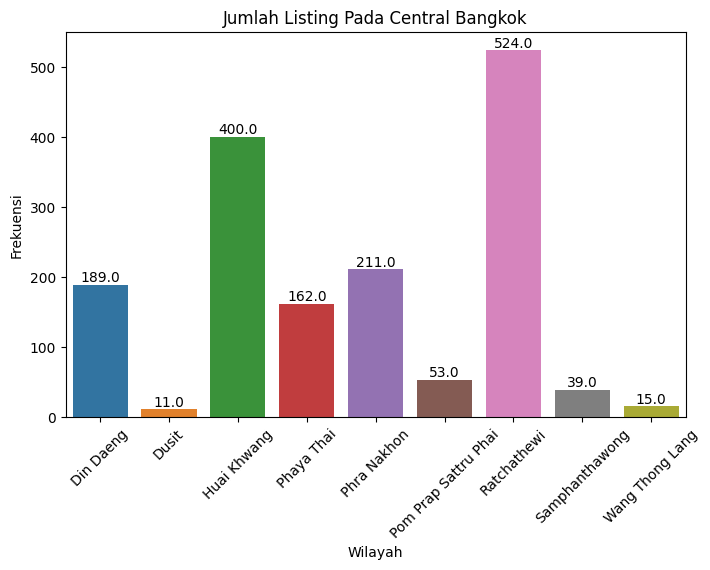

In [389]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_central_bangkok_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada Central Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `Central Bangkok` yang paling banyak adalah wilayah `Ratchathewi`

<Figure size 1000x600 with 0 Axes>

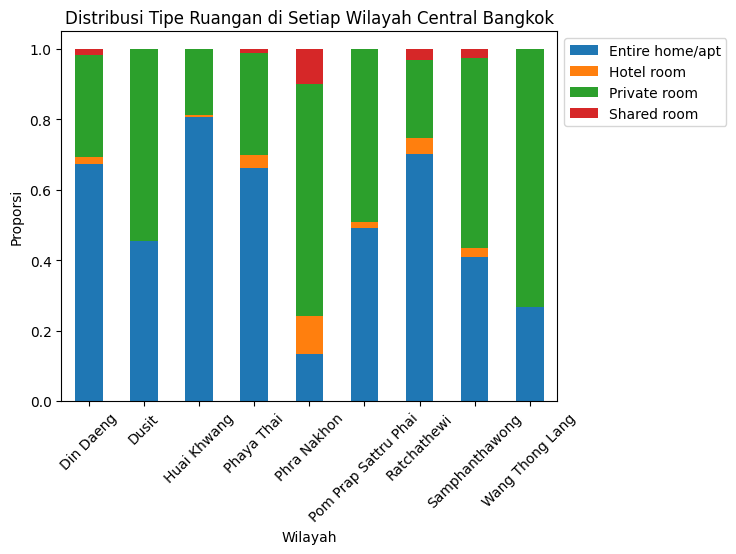

In [390]:
cross_tab = pd.crosstab(df_central_bangkok['neighbourhood'], df_central_bangkok['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah Central Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`Central Bangkok` berdasarkan `price`**

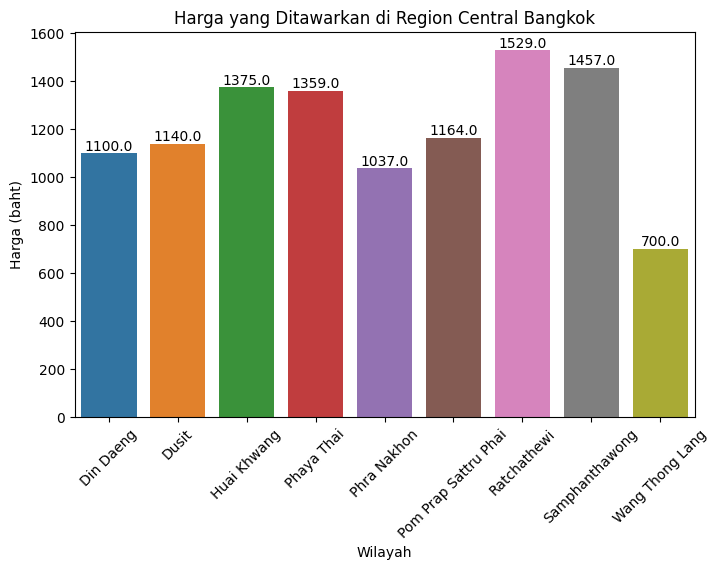

In [391]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_central_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region Central Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Ratchathewi`

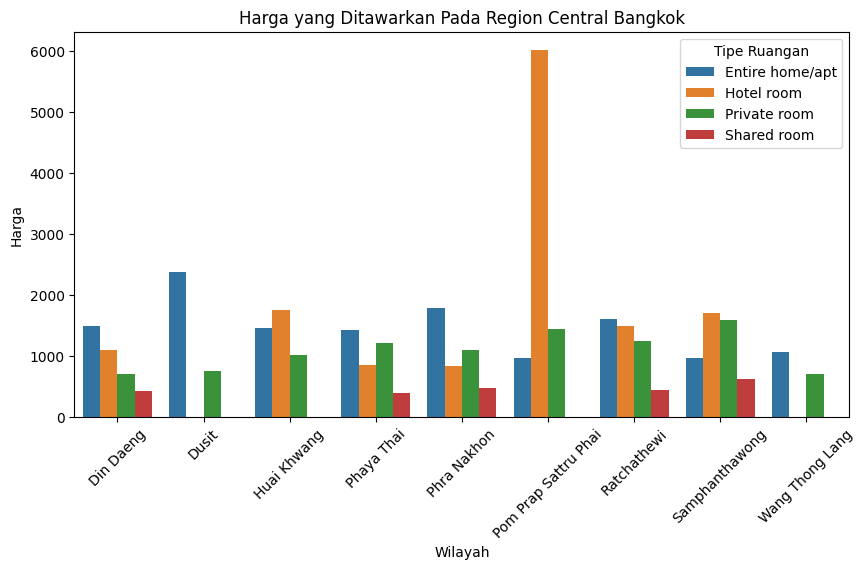

In [392]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_central_bangkok.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region Central Bangkok')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper right')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Hotel room` dan berada pada `neighbourhood`: `Pom Prap Sattru Phai`

##### **`Central Bangkok` berdasarkan `number_of_reviews_ltm`**

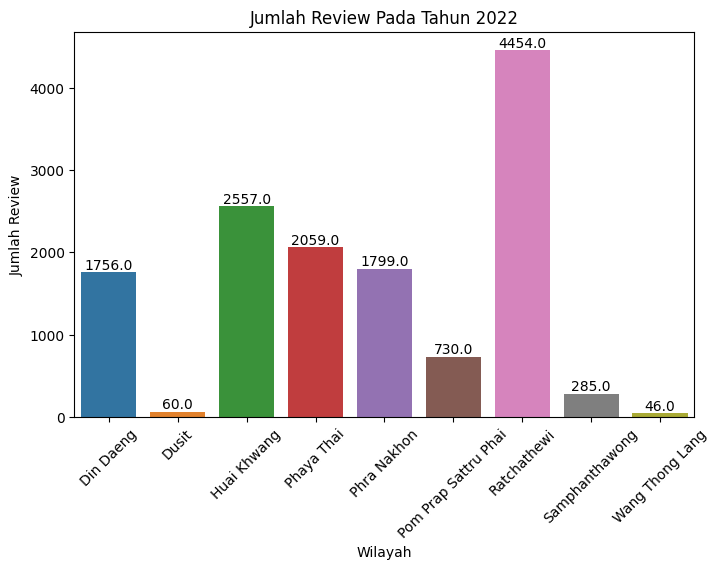

In [393]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_central_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Ratchathewi`

#### **ii. `Central Bangkok` berdasarkan `availability_365 < 365`**

In [394]:
# mengelompokan region 'Central Bangkok'
df_central_bangkok_365 = df_available[df_available['region']=='Central Bangkok'].reset_index(drop=True)
display(
    df_central_bangkok_365,
    df_central_bangkok_365.shape
)

id                                               name  \
0                  27934                    Nice room with superb city view   
1                  35780     Spacious one bedroom at The Kris Condo Bldg. 3   
2                1765918                     2BR apt in a cozy neighborhood   
3                1816517         1 BR condominium center BKK +NETFLIX+55SQM   
4                 976690                  Beautiful 1 BR apartment @BTS Ari   
...                  ...                                                ...   
3568  790329192709152199  *Best Pool View*5 Min​ Walk to MRT*Wifi*Washma...   
3569  790341307543009724                            Spacious Pratunam Hotel   
3570  790404714116491557                         Ratchada Condo next To MRT   
3571  790458045665867830  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   
3572  790460476887978054  Euro LuxuryHotel PratunamMKt TripleBdNrShoping...   

        host_id  host_name neighbourhood   latitude   longitude  \
0        120437     Nuttee   Ratchathewi  13.759830  100.541340   
1        153730    Sirilak     Din Daeng  13.788230  100.572560   
2       9279712       Jing    Phaya Thai  13.774860  100.542720   
3       8492603  Sudhichai   Ratchathewi  13.753510  100.533080   
4       5344120   Nattavut    Phaya Thai  13.779310  100.542620   
...         ...        ...           ...        ...         ...   
3568  294345312     Durian   Huai Khwang  13.790493  100.575049   
3569  424281953     Saruta   Ratchathewi  13.754710  100.540160   
3570   34432625       Alex   Huai Khwang  13.763732  100.569455   
3571  491526222  Phakhamon   Ratchathewi  13.754421  100.538842   
3572  491526222  Phakhamon   Ratchathewi  13.752904  100.540381   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt   1905               3                 65  2020-01-06   
1        Private room   1286               7                  2  2022-04-01   
2     Entire home/apt   1893              15                129  2022-09-30   
3     Entire home/apt   2000              27                 76  2018-04-05   
4     Entire home/apt   1400              15                 90  2022-11-15   
...               ...    ...             ...                ...         ...   
3568  Entire home/apt   1442               2                  0         NaT   
3569     Private room    640               1                  0         NaT   
3570  Entire home/apt   2100              28                  0         NaT   
3571     Private room   1529               1                  0         NaT   
3572     Private room   1400               1                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.50                               2               353   
1                  0.03                               1               323   
2                  1.17                               1               356   
3                  0.70                               1               263   
4                  0.77                               4               336   
...                 ...                             ...               ...   
3568               0.00                               4                90   
3569               0.00                               4               362   
3570               0.00                               2               332   
3571               0.00                              14               363   
3572               0.00                              14               357   

      number_of_reviews_ltm           region  book_2023  
0                         0  Central Bangkok         12  
1                         1  Central Bangkok         42  
2                         1  Central Bangkok          9  
3                         0  Central Bangkok        102  
4                         2  Central Bangkok         29  
...                     ...              ...  

(3573, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **3753 baris** dan **17 kolom**.

##### **`Central Bangkok` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [395]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_central_bangkok_365['book_2023'] = 365 - df_central_bangkok_365['availability_365']
df_central_bangkok_365.head()

id                                            name  host_id  \
0    27934                 Nice room with superb city view   120437   
1    35780  Spacious one bedroom at The Kris Condo Bldg. 3   153730   
2  1765918                  2BR apt in a cozy neighborhood  9279712   
3  1816517      1 BR condominium center BKK +NETFLIX+55SQM  8492603   
4   976690               Beautiful 1 BR apartment @BTS Ari  5344120   

   host_name neighbourhood  latitude  longitude        room_type  price  \
0     Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   1905   
1    Sirilak     Din Daeng  13.78823  100.57256     Private room   1286   
2       Jing    Phaya Thai  13.77486  100.54272  Entire home/apt   1893   
3  Sudhichai   Ratchathewi  13.75351  100.53308  Entire home/apt   2000   
4   Nattavut    Phaya Thai  13.77931  100.54262  Entire home/apt   1400   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               3                 65  2020-01-06               0.50   
1               7                  2  2022-04-01               0.03   
2              15                129  2022-09-30               1.17   
3              27                 76  2018-04-05               0.70   
4              15                 90  2022-11-15               0.77   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               353                      0   
1                               1               323                      1   
2                               1               356                      1   
3                               1               263                      0   
4                               4               336                      2   

            region  book_2023  
0  Central Bangkok         12  
1  Central Bangkok         42  
2  Central Bangkok          9  
3  Central Bangkok        102  
4  Central Bangkok         29

In [396]:
df_central_bangkok_365.value_counts('book_2023')

book_2023
365    342
1      187
185    133
275    117
4       99
      ... 
157      1
76       1
77       1
154      1
109      1
Name: count, Length: 334, dtype: int64

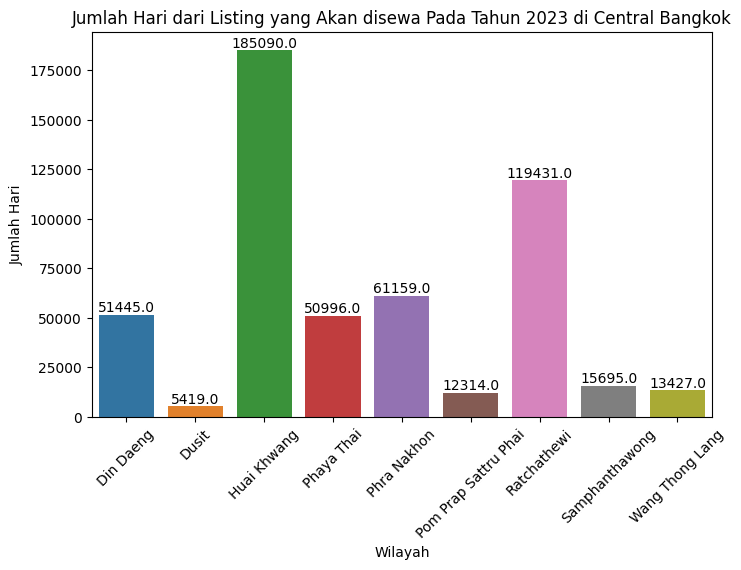

In [397]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_central_bangkok_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di Central Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Huai Khwang` dan `Ratchathewi`

<Figure size 1000x600 with 0 Axes>

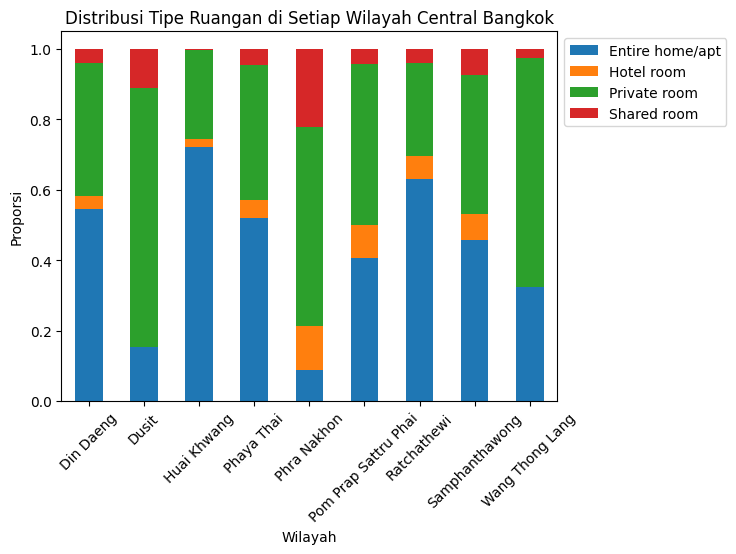

In [398]:
cross_tab = pd.crosstab(df_central_bangkok_365['neighbourhood'], df_central_bangkok_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah Central Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

### **b. `East Bangkok`**

#### **i. `East Bangkok` dalam Tahun 2022**

In [399]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region East Bangkok
df_east_bangkok = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='East Bangkok')].reset_index(drop=True)
display(df_east_bangkok.head(3),
df_east_bangkok.shape)

id                                               name   host_id  \
0   145343                Boutique Rooms Near Bangkok Airport    703944   
1  1933894  NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airp...   9509219   
2  2609081                  2 BR & 2 Bath & Fixed parking lot  10373341   

  host_name neighbourhood   latitude   longitude        room_type  price  \
0   Parinya   Lat Krabang  13.721868  100.771713     Private room   1329   
1      Piya       Pra Wet  13.700040  100.678700  Entire home/apt   3394   
2       Poo   Khan Na Yao  13.818910  100.664080  Entire home/apt   1300   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                 28  2022-11-25               0.28   
1               5                  3  2022-11-28               0.03   
2             360                 37  2022-04-25               0.37   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               349                     13   
1                               8               180                      2   
2                               2                83                      1   

         region       Year  
0  East Bangkok 2022-01-01  
1  East Bangkok 2022-01-01  
2  East Bangkok 2022-01-01

(198, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **198 baris** dan **18 kolom**.

##### **`East Bangkok` berdasarkan `room_type`**

In [400]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_east_bangkok_pivot = df_east_bangkok.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_east_bangkok_pivot

neighbourhood        room_type  id
0       Bang Kapi  Entire home/apt  45
1       Bang Kapi       Hotel room   1
2       Bang Kapi     Private room  22
3       Bueng Kum  Entire home/apt  10
4     Khan Na Yao  Entire home/apt   8
5     Khan Na Yao     Private room   4
6   Khlong Sam Wa  Entire home/apt   2
7     Lat Krabang  Entire home/apt  14
8     Lat Krabang       Hotel room  13
9     Lat Krabang     Private room  27
10    Lat Krabang      Shared room   1
11       Min Buri  Entire home/apt   5
12       Min Buri     Private room   7
13        Pra Wet  Entire home/apt  15
14        Pra Wet       Hotel room   2
15        Pra Wet     Private room  15
16        Pra Wet      Shared room   1
17    Saphan Sung  Entire home/apt   4
18    Saphan Sung     Private room   2

In [401]:
df_east_bangkok_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_east_bangkok_pivot['total'] = df_east_bangkok_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_east_bangkok_pivot['persentase'] = df_east_bangkok_pivot['id'] / df_east_bangkok_pivot['total'] * 100
df_east_bangkok_pivot

neighbourhood        room_type  id  total  persentase
0       Bang Kapi  Entire home/apt  45     68   66.176471
1       Bang Kapi       Hotel room   1     68    1.470588
2       Bang Kapi     Private room  22     68   32.352941
3       Bueng Kum  Entire home/apt  10     10  100.000000
4     Khan Na Yao  Entire home/apt   8     12   66.666667
5     Khan Na Yao     Private room   4     12   33.333333
6   Khlong Sam Wa  Entire home/apt   2      2  100.000000
7     Lat Krabang  Entire home/apt  14     55   25.454545
8     Lat Krabang       Hotel room  13     55   23.636364
9     Lat Krabang     Private room  27     55   49.090909
10    Lat Krabang      Shared room   1     55    1.818182
11       Min Buri  Entire home/apt   5     12   41.666667
12       Min Buri     Private room   7     12   58.333333
13        Pra Wet  Entire home/apt  15     33   45.454545
14        Pra Wet       Hotel room   2     33    6.060606
15        Pra Wet     Private room  15     33   45.454545
16        Pra Wet      Shared room   1     33    3.030303
17    Saphan Sung  Entire home/apt   4      6   66.666667
18    Saphan Sung     Private room   2      6   33.333333

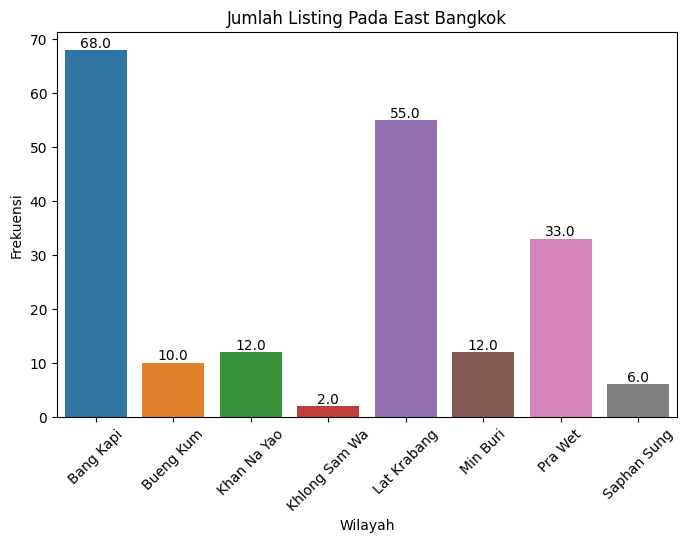

In [402]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_east_bangkok_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada East Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `East Bangkok` yang paling banyak adalah wilayah `Bang Kapi`

<Figure size 1000x600 with 0 Axes>

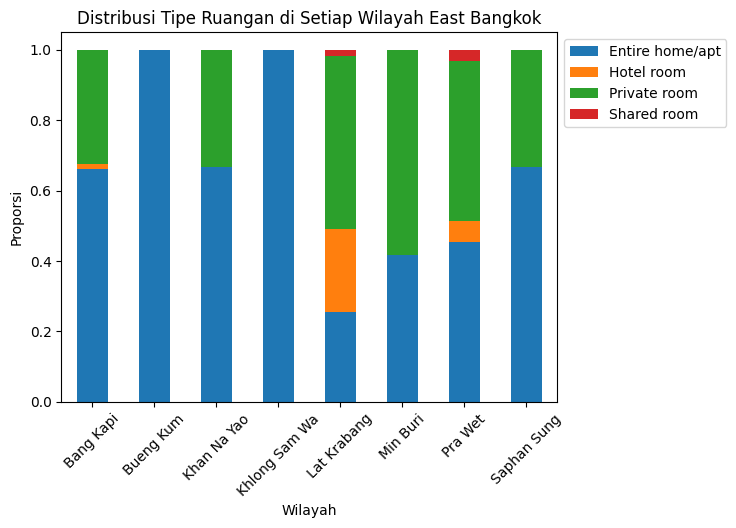

In [403]:
cross_tab = pd.crosstab(df_east_bangkok['neighbourhood'], df_east_bangkok['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`East Bangkok` berdasarkan `price`**

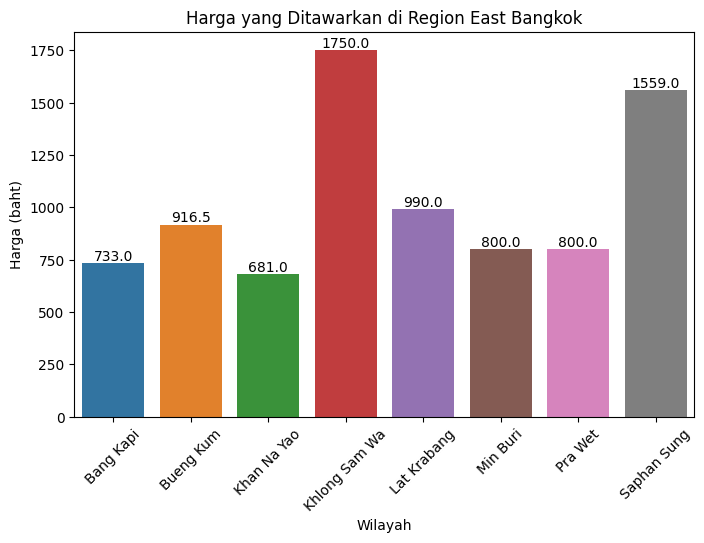

In [404]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_east_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region East Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Khlong Sam Wa`

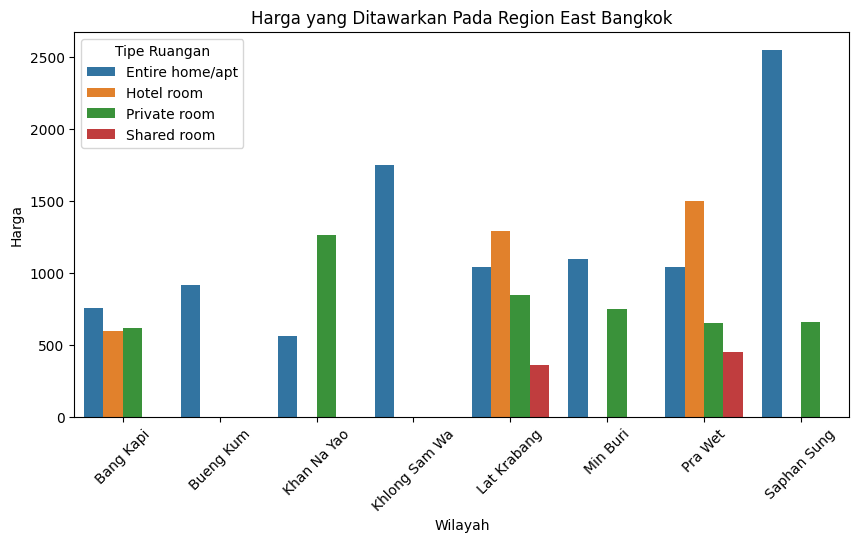

In [405]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_east_bangkok.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region East Bangkok')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper left')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Entire home/apt` dan berada pada `neighbourhood`: `Saphan Sung`

##### **`East Bangkok` berdasarkan `number_of_reviews_ltm`**

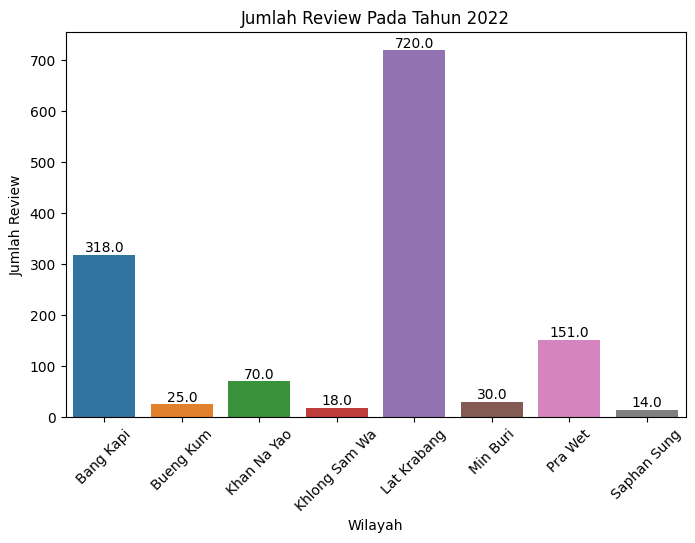

In [406]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_east_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Lat Krabang`

#### **ii. `East Bangkok` berdasarkan `availability_365 < 365`**

In [407]:
# mengelompokan region 'East Bangkok'
df_east_bangkok_365 = df_available[df_available['region']=='East Bangkok'].reset_index(drop=True)
display(
    df_east_bangkok_365,
    df_east_bangkok_365.shape
)

id                                               name  \
0                145343                Boutique Rooms Near Bangkok Airport   
1                185364                Beautiful Wood Bangkok Resort House   
2               1933894  NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airp...   
3                581755                Brand New room near Airport Railway   
4                801844                           Big space in eastern BKK   
..                  ...                                                ...   
593  788045985392463042                    2 Bedrooms condo with pool view   
594  786818194488759300                     2 Bedroom Luxury Eastville CDC   
595  786853604983296847                       Grandio Ladprao 3 Bed 3 Bath   
596  788826798381198434                                       182 Bab Suan   
597  790465040741092826      素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街   

       host_id host_name neighbourhood   latitude   longitude  \
0       703944   Parinya   Lat Krabang  13.721868  100.771713   
1       889670   Narumon     Nong Chok  13.779000  100.836710   
2      9509219      Piya       Pra Wet  13.700040  100.678700   
3      2864425     Urcha     Bang Kapi  13.750560  100.608440   
4       121622  Anchalee     Bang Kapi  13.758780  100.649880   
..         ...       ...           ...        ...         ...   
593  492463555  Hon Yuen     Bang Kapi  13.763049  100.640481   
594  415586056     Arisa     Bueng Kum  13.834608  100.640374   
595  435016000   Tadchon     Bueng Kum  13.797979  100.659953   
596  306080098       P M      Min Buri  13.798811  100.741916   
597   94899359     Renee       Pra Wet  13.715132  100.653458   

           room_type  price  minimum_nights  number_of_reviews last_review  \
0       Private room   1329               1                 28  2022-11-25   
1    Entire home/apt   8658               1                  0         NaT   
2    Entire home/apt   3394               5                  3  2022-11-28   
3       Private room   1316               5                  1  2013-12-03   
4    Entire home/apt    519               4                  1  2016-11-09   
..               ...    ...             ...                ...         ...   
593  Entire home/apt   1385               1                  0         NaT   
594  Entire home/apt   1600               1                  0         NaT   
595  Entire home/apt   8900               3                  0         NaT   
596  Entire home/apt   3531               1                  0         NaT   
597     Private room   2298              28                  0         NaT   

     reviews_per_month  calculated_host_listings_count  availability_365  \
0                 0.28                               1               349   
1                 0.00                               1               363   
2                 0.03                               8               180   
3                 0.01                               1               364   
4                 0.01                               1               181   
..                 ...                             ...               ...   
593               0.00                               1               361   
594               0.00                               1               361   
595               0.00                              10               364   
596               0.00                               3               364   
597               0.00                               1               362   

     number_of_reviews_ltm        region  book_2023  
0                       13  East Bangkok         16  
1                        0  East Bangkok          2  
2                        2  East Bangkok        185  
3                        0  East Bangkok          1  
4                        0  East Bangkok        184  
..                     ...           ...        ...  
593                      0  East Bangkok          4  
594                  

(598, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **598 baris** dan **17 kolom**.

##### **`East Bangkok` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [408]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_east_bangkok_365['book_2023'] = 365 - df_east_bangkok_365['availability_365']
df_east_bangkok_365.head()

id                                               name  host_id  \
0   145343                Boutique Rooms Near Bangkok Airport   703944   
1   185364                Beautiful Wood Bangkok Resort House   889670   
2  1933894  NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airp...  9509219   
3   581755                Brand New room near Airport Railway  2864425   
4   801844                           Big space in eastern BKK   121622   

  host_name neighbourhood   latitude   longitude        room_type  price  \
0   Parinya   Lat Krabang  13.721868  100.771713     Private room   1329   
1   Narumon     Nong Chok  13.779000  100.836710  Entire home/apt   8658   
2      Piya       Pra Wet  13.700040  100.678700  Entire home/apt   3394   
3     Urcha     Bang Kapi  13.750560  100.608440     Private room   1316   
4  Anchalee     Bang Kapi  13.758780  100.649880  Entire home/apt    519   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                 28  2022-11-25               0.28   
1               1                  0         NaT               0.00   
2               5                  3  2022-11-28               0.03   
3               5                  1  2013-12-03               0.01   
4               4                  1  2016-11-09               0.01   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               349                     13   
1                               1               363                      0   
2                               8               180                      2   
3                               1               364                      0   
4                               1               181                      0   

         region  book_2023  
0  East Bangkok         16  
1  East Bangkok          2  
2  East Bangkok        185  
3  East Bangkok          1  
4  East Bangkok        184

In [409]:
df_east_bangkok_365.value_counts('book_2023')

book_2023
1      58
365    44
185    33
2      28
186    28
       ..
118     1
117     1
116     1
112     1
139     1
Name: count, Length: 156, dtype: int64

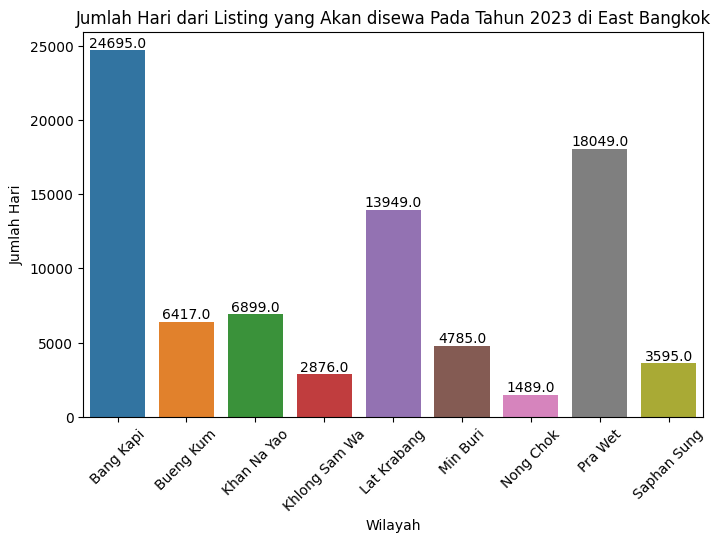

In [410]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_east_bangkok_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di East Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Bang Kapa` dan `Pra Wet`

<Figure size 1000x600 with 0 Axes>

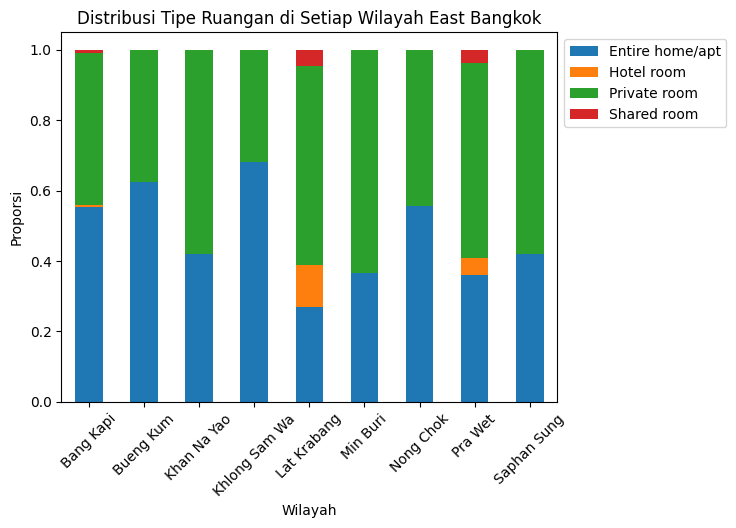

In [411]:
cross_tab = pd.crosstab(df_east_bangkok_365['neighbourhood'], df_east_bangkok_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

### **c. `North Bangkok`**

#### **i. `North Bangkok` dalam Tahun 2022**

In [412]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region North Bangkok
df_north_bangkok = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='North Bangkok')].reset_index(drop=True)
display(df_north_bangkok.head(3),
df_north_bangkok.shape)

id                                            name  host_id  \
0  1943048   Best nr Chatujak, MRT, BTS free wifi&fNetflix  9906827   
1   822214   Jade House overlooking Pool near new skytrain   822284   
2  1522068  100 SQM Spacious 2BR - 450 m from RN03 station  8123510   

         host_name neighbourhood  latitude  longitude        room_type  price  \
0           Nokiko    Chatu Chak  13.81694  100.56451  Entire home/apt   1271   
1  Rae And Charlie      Bang Sue  13.83148  100.52307  Entire home/apt   1200   
2           Tatiya    Chatu Chak  13.84279  100.56287  Entire home/apt   2236   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                293  2022-12-06               2.72   
1               3                 21  2022-12-22               0.18   
2               2                215  2022-12-20               1.96   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               129                     19   
1                               7               124                      1   
2                              13               325                     29   

          region       Year  
0  North Bangkok 2022-01-01  
1  North Bangkok 2022-01-01  
2  North Bangkok 2022-01-01

(378, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **378 baris** dan **18 kolom**.

##### **`North Bangkok` berdasarkan `room_type`**

In [413]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_north_bangkok_pivot = df_north_bangkok.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_north_bangkok_pivot

neighbourhood        room_type   id
0      Bang Khen  Entire home/apt   18
1      Bang Khen     Private room    9
2       Bang Sue  Entire home/apt   84
3       Bang Sue     Private room   19
4     Chatu Chak  Entire home/apt  111
5     Chatu Chak     Private room   55
6     Chatu Chak      Shared room    1
7     Don Mueang  Entire home/apt    4
8     Don Mueang       Hotel room    1
9     Don Mueang     Private room   26
10        Lak Si  Entire home/apt   15
11        Lak Si       Hotel room    1
12        Lak Si     Private room   19
13     Lat Phrao  Entire home/apt    9
14     Lat Phrao     Private room    2
15       Sai Mai  Entire home/apt    1
16       Sai Mai     Private room    3

In [414]:
df_north_bangkok_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_north_bangkok_pivot['total'] = df_north_bangkok_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_north_bangkok_pivot['persentase'] = df_north_bangkok_pivot['id'] / df_north_bangkok_pivot['total'] * 100
df_north_bangkok_pivot

neighbourhood        room_type   id  total  persentase
0      Bang Khen  Entire home/apt   18     27   66.666667
1      Bang Khen     Private room    9     27   33.333333
2       Bang Sue  Entire home/apt   84    103   81.553398
3       Bang Sue     Private room   19    103   18.446602
4     Chatu Chak  Entire home/apt  111    167   66.467066
5     Chatu Chak     Private room   55    167   32.934132
6     Chatu Chak      Shared room    1    167    0.598802
7     Don Mueang  Entire home/apt    4     31   12.903226
8     Don Mueang       Hotel room    1     31    3.225806
9     Don Mueang     Private room   26     31   83.870968
10        Lak Si  Entire home/apt   15     35   42.857143
11        Lak Si       Hotel room    1     35    2.857143
12        Lak Si     Private room   19     35   54.285714
13     Lat Phrao  Entire home/apt    9     11   81.818182
14     Lat Phrao     Private room    2     11   18.181818
15       Sai Mai  Entire home/apt    1      4   25.000000
16       Sai Mai     Private room    3      4   75.000000

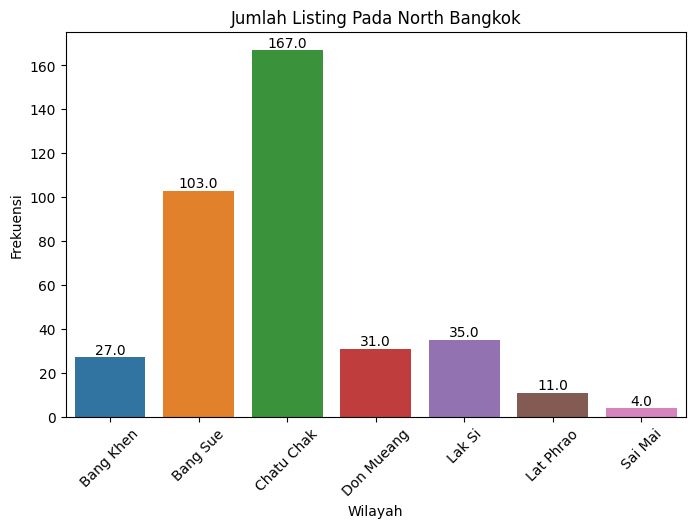

In [415]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_bangkok_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada North Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `North Bangkok` yang paling banyak adalah wilayah `Chatu Chak`

<Figure size 1000x600 with 0 Axes>

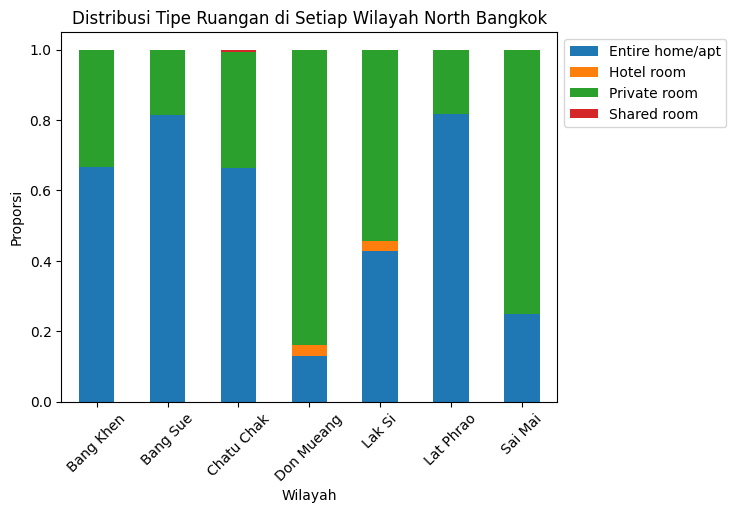

In [416]:
cross_tab = pd.crosstab(df_north_bangkok['neighbourhood'], df_north_bangkok['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah North Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`North Bangkok` berdasarkan `price`**

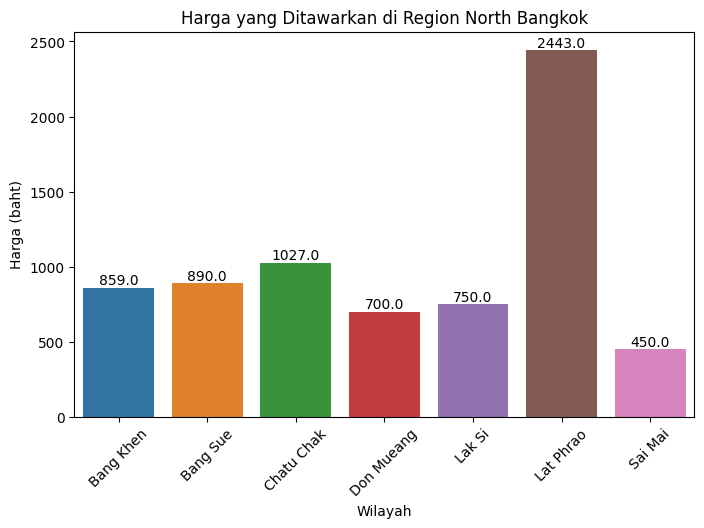

In [417]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region North Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Lat Phrao`

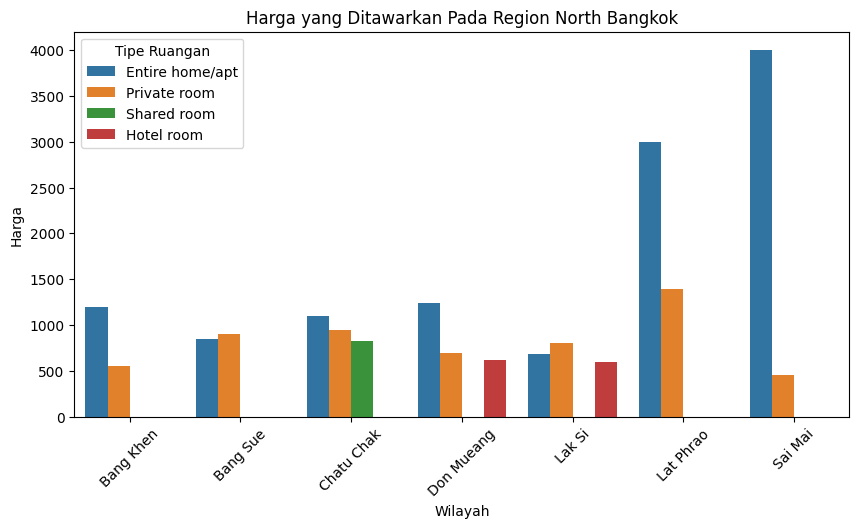

In [418]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_north_bangkok.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region North Bangkok')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper left')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Entire home/apt` dan berada pada `neighbourhood`: `Sai Mai`

##### **`North Bangkok` berdasarkan `number_of_reviews_ltm`**

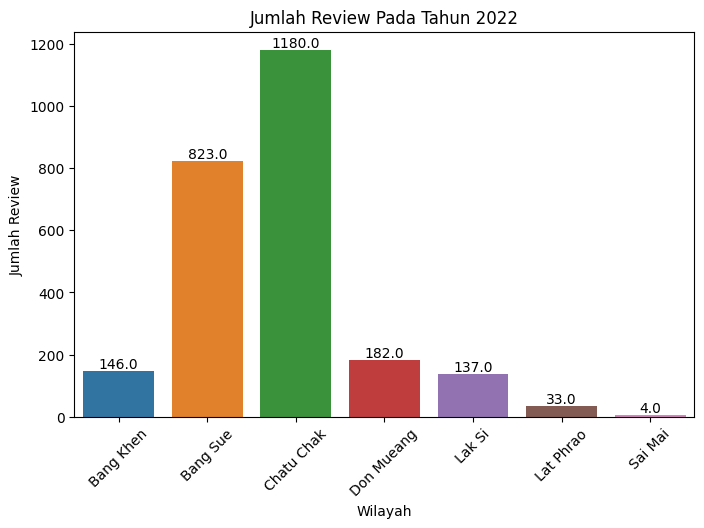

In [419]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Chatu Chak`

#### **ii. `North Bangkok` berdasarkan `availability_365 < 365`**

In [420]:
# mengelompokan region 'North Bangkok'
df_north_bangkok_365 = df_available[df_available['region']=='North Bangkok'].reset_index(drop=True)
display(
    df_north_bangkok_365,
    df_north_bangkok_365.shape
)

id                                               name  \
0                  66046                   24Flr- 1br Apt near JJ, MRT, BTS   
1                 172332  Tranquility found in busy Bangkok near new sky...   
2                1943048      Best nr Chatujak, MRT, BTS free wifi&fNetflix   
3                 527553        Beautiful Apt @ Ratchayothin BTS, Free Wifi   
4                 534241                Stunning 24th Fl Terrace Penthouse!   
...                  ...                                                ...   
1018  786742271004207966                     Private Hotel for 12-16 Guests   
1019  787253999776900513               Siam Plaengna-Napee9 Room, Chatuchak   
1020  788687430580578894  Newly-Private-Cozy Room, Formosa Ratchayothin-BKK   
1021  789484901156712444  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   
1022  790119442153528940  50m MRT, Big C, 1 BR condo with Sauna, Pool & Gym   

        host_id        host_name neighbourhood   latitude   longitude  \
0        323158              Sue    Chatu Chak  13.822980  100.564840   
1        822284  Rae And Charlie      Bang Sue  13.831480  100.521020   
2       9906827           Nokiko    Chatu Chak  13.816940  100.564510   
3       2592798           Nokina    Chatu Chak  13.828410  100.571030   
4       2625384             Mike    Chatu Chak  13.809940  100.565100   
...         ...              ...           ...        ...         ...   
1018  435016000          Tadchon    Chatu Chak  13.821809  100.563067   
1019  311909791     Siamplaengna    Chatu Chak  13.798903  100.564166   
1020  385694484           Sirote    Chatu Chak  13.823683  100.570621   
1021  472715937        Kotcharat      Bang Sue  13.828505  100.527433   
1022  472715937        Kotcharat      Bang Sue  13.829630  100.527890   

            room_type   price  minimum_nights  number_of_reviews last_review  \
0     Entire home/apt  122594               2                  9  2020-03-04   
1     Entire home/apt    1000               3                 21  2019-02-20   
2     Entire home/apt    1271               1                293  2022-12-06   
3     Entire home/apt    1004               2                 24  2018-07-22   
4     Entire home/apt    4156              30                  0         NaT   
...               ...     ...             ...                ...         ...   
1018     Private room   17900               2                  0         NaT   
1019     Private room     950               2                  0         NaT   
1020     Private room     850              28                  0         NaT   
1021  Entire home/apt     560              12                  0         NaT   
1022  Entire home/apt     560              12                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.09                               6               180   
1                  0.17                               7               145   
2                  2.72                               1               129   
3                  0.19                               2                 0   
4                  0.00                               1               348   
...                 ...                             ...               ...   
1018               0.00                              10               362   
1019               0.00                              13               349   
1020               0.00                               5               180   
1021               0.00                               8               363   
1022               0.00                               8               302   

      number_of_reviews_ltm         region  book_2023  
0                         0  North Bangkok        185  
1                         0  North Bangkok        220  
2                        19  North Bangkok        236  
3                         0  North Bangkok        365  
4                         0  N

(1023, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **1023 baris** dan **17 kolom**.

##### **`North Bangkok` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [421]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_north_bangkok_365['book_2023'] = 365 - df_north_bangkok_365['availability_365']
df_north_bangkok_365.head()

id                                               name  host_id  \
0    66046                   24Flr- 1br Apt near JJ, MRT, BTS   323158   
1   172332  Tranquility found in busy Bangkok near new sky...   822284   
2  1943048      Best nr Chatujak, MRT, BTS free wifi&fNetflix  9906827   
3   527553        Beautiful Apt @ Ratchayothin BTS, Free Wifi  2592798   
4   534241                Stunning 24th Fl Terrace Penthouse!  2625384   

         host_name neighbourhood  latitude  longitude        room_type  \
0              Sue    Chatu Chak  13.82298  100.56484  Entire home/apt   
1  Rae And Charlie      Bang Sue  13.83148  100.52102  Entire home/apt   
2           Nokiko    Chatu Chak  13.81694  100.56451  Entire home/apt   
3           Nokina    Chatu Chak  13.82841  100.57103  Entire home/apt   
4             Mike    Chatu Chak  13.80994  100.56510  Entire home/apt   

    price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0  122594               2                  9  2020-03-04               0.09   
1    1000               3                 21  2019-02-20               0.17   
2    1271               1                293  2022-12-06               2.72   
3    1004               2                 24  2018-07-22               0.19   
4    4156              30                  0         NaT               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               6               180                      0   
1                               7               145                      0   
2                               1               129                     19   
3                               2                 0                      0   
4                               1               348                      0   

          region  book_2023  
0  North Bangkok        185  
1  North Bangkok        220  
2  North Bangkok        236  
3  North Bangkok        365  
4  North Bangkok         17

In [422]:
df_north_bangkok_365.value_counts('book_2023')

book_2023
1      72
185    70
365    48
275    42
186    38
       ..
101     1
102     1
232     1
230     1
181     1
Name: count, Length: 227, dtype: int64

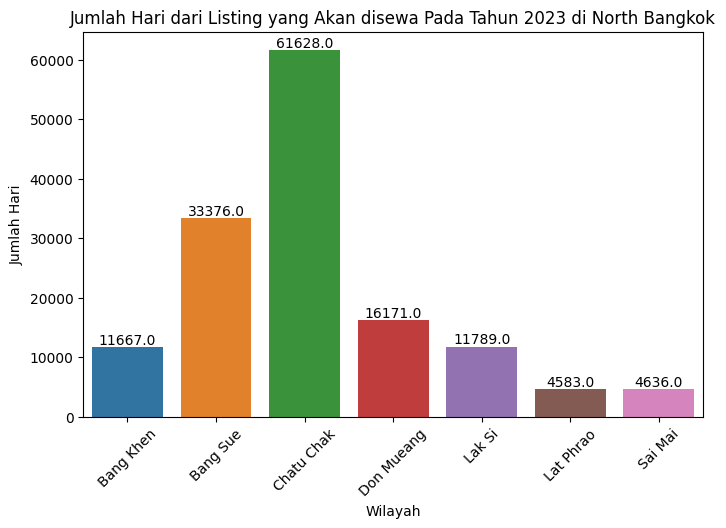

In [423]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_bangkok_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di North Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Chatu Chak` dan `Bang Sue`

<Figure size 1000x600 with 0 Axes>

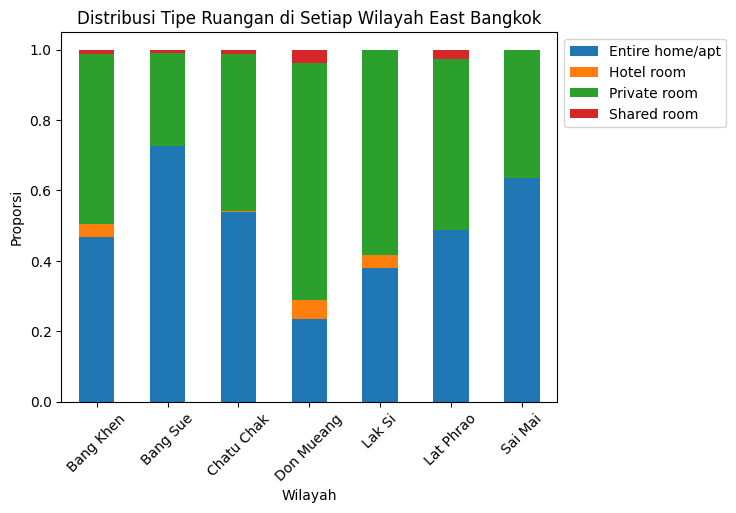

In [424]:
cross_tab = pd.crosstab(df_north_bangkok_365['neighbourhood'], df_north_bangkok_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

### **d. `North Thonburi`**

#### **i. `North Thonburi` dalam Tahun 2022**

In [425]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region North Thonburi
df_north_thonburi = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='North Thonburi')].reset_index(drop=True)
display(df_north_thonburi.head(3),
df_north_thonburi.shape)

id                                               name  host_id  \
0  1035589                        Quiet Double  Bed Apartment  4115838   
1  1412787   NEWLY Renovated! 1BR by the river, near IconSiam  7616231   
2   858311  River view penthouse 30 Fl, 5 Pers,  taxi incl...  4491588   

  host_name   neighbourhood  latitude  longitude        room_type  price  \
0  Primrose  Thawi Watthana  13.79274  100.33377     Private room   1800   
1      Jeab      Khlong San  13.72174  100.50769  Entire home/apt   1635   
2    Donald      Khlong San  13.72135  100.50800  Entire home/apt   7929   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                  1  2022-10-25               0.46   
1               3                 88  2022-11-22               0.80   
2               2                256  2022-12-15               2.13   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               3               242                      1   
1                               1                56                      8   
2                               1               267                     43   

           region       Year  
0  North Thonburi 2022-01-01  
1  North Thonburi 2022-01-01  
2  North Thonburi 2022-01-01

(351, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **351 baris** dan **18 kolom**.

##### **`North Thonburi` berdasarkan `room_type`**

In [426]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_north_thonburi_pivot = df_north_thonburi.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_north_thonburi_pivot

neighbourhood        room_type  id
0       Bang Phlat  Entire home/apt  59
1       Bang Phlat       Hotel room   1
2       Bang Phlat     Private room  11
3       Bang Phlat      Shared room   1
4      Bangkok Noi  Entire home/apt  24
5      Bangkok Noi       Hotel room   1
6      Bangkok Noi     Private room  16
7      Bangkok Yai  Entire home/apt  13
8      Bangkok Yai     Private room   9
9       Chom Thong  Entire home/apt  21
10      Chom Thong     Private room   3
11      Khlong San  Entire home/apt  89
12      Khlong San       Hotel room   6
13      Khlong San     Private room  21
14     Taling Chan  Entire home/apt   1
15     Taling Chan     Private room   5
16  Thawi Watthana     Private room   1
17       Thon buri  Entire home/apt  44
18       Thon buri     Private room  25

In [427]:
df_north_thonburi_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_north_thonburi_pivot['total'] = df_north_thonburi_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_north_thonburi_pivot['persentase'] = df_north_thonburi_pivot['id'] / df_north_thonburi_pivot['total'] * 100
df_north_thonburi_pivot

neighbourhood        room_type  id  total  persentase
0       Bang Phlat  Entire home/apt  59     72   81.944444
1       Bang Phlat       Hotel room   1     72    1.388889
2       Bang Phlat     Private room  11     72   15.277778
3       Bang Phlat      Shared room   1     72    1.388889
4      Bangkok Noi  Entire home/apt  24     41   58.536585
5      Bangkok Noi       Hotel room   1     41    2.439024
6      Bangkok Noi     Private room  16     41   39.024390
7      Bangkok Yai  Entire home/apt  13     22   59.090909
8      Bangkok Yai     Private room   9     22   40.909091
9       Chom Thong  Entire home/apt  21     24   87.500000
10      Chom Thong     Private room   3     24   12.500000
11      Khlong San  Entire home/apt  89    116   76.724138
12      Khlong San       Hotel room   6    116    5.172414
13      Khlong San     Private room  21    116   18.103448
14     Taling Chan  Entire home/apt   1      6   16.666667
15     Taling Chan     Private room   5      6   83.333333
16  Thawi Watthana     Private room   1      1  100.000000
17       Thon buri  Entire home/apt  44     69   63.768116
18       Thon buri     Private room  25     69   36.231884

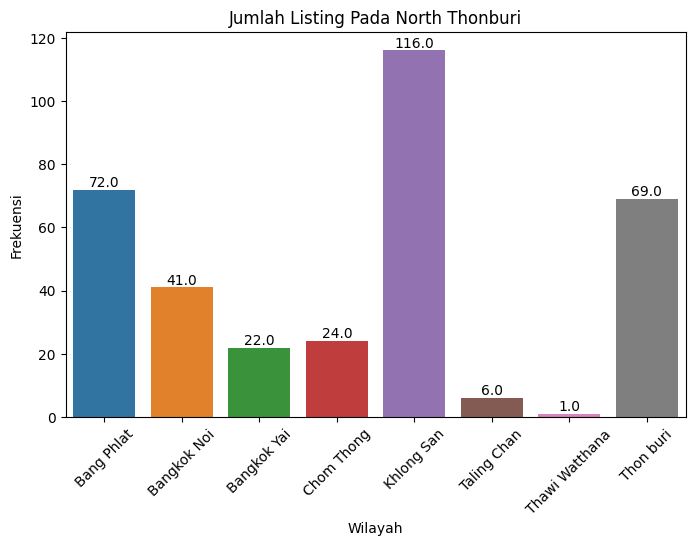

In [428]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_thonburi_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada North Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `North Thonburi` yang paling banyak adalah wilayah `Khlong San`

<Figure size 1000x600 with 0 Axes>

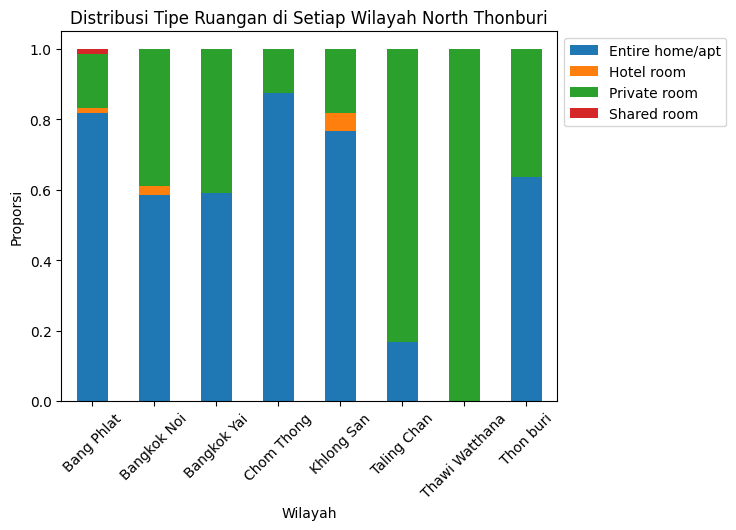

In [429]:
cross_tab = pd.crosstab(df_north_thonburi['neighbourhood'], df_north_thonburi['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah North Thonburi')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`North Thonburi` berdasarkan `price`**

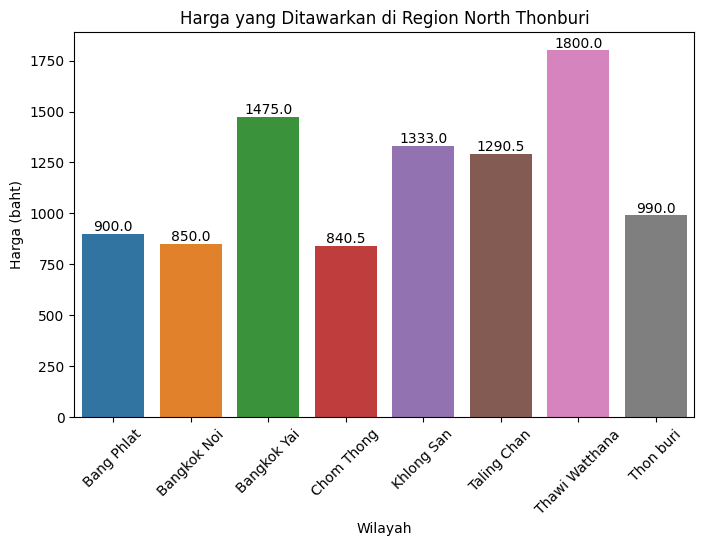

In [430]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_thonburi.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region North Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Thawi Watthana`

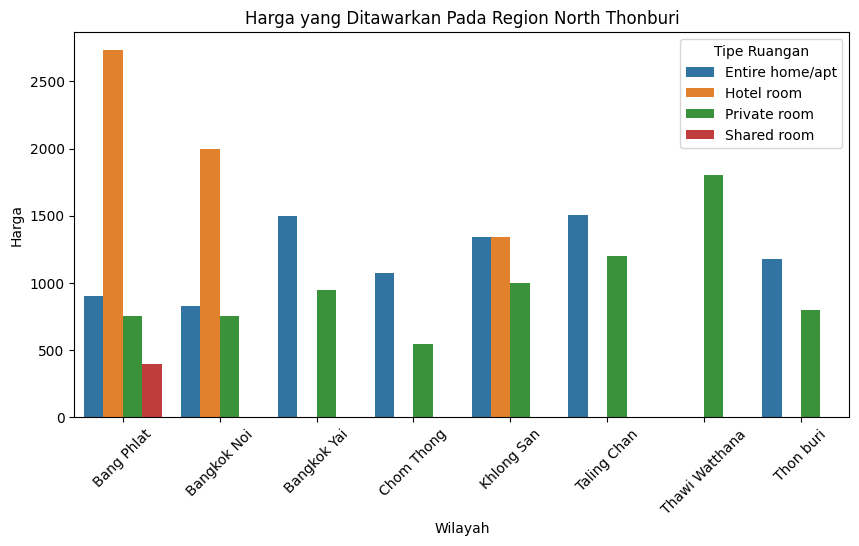

In [431]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_north_thonburi.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region North Thonburi')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper right')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Hotel room` dan berada pada `neighbourhood`: `Bang Phlat`

##### **`North Thonburi` berdasarkan `number_of_reviews_ltm`**

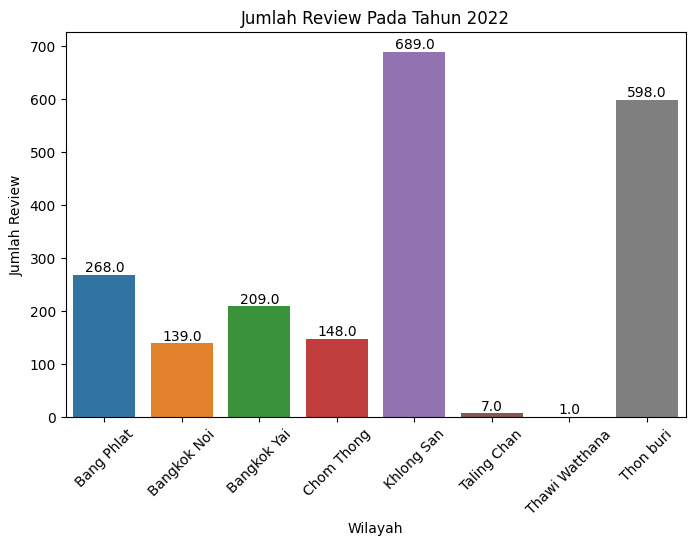

In [432]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_thonburi.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Khlong San`

#### **ii. `North Thonburi` berdasarkan `availability_365 < 365`**

In [433]:
# mengelompokan region 'North Thonburi'
df_north_thonburi_365 = df_available[df_available['region']=='North Thonburi'].reset_index(drop=True)
display(
    df_north_thonburi_365,
    df_north_thonburi_365.shape
)

id                                            name  \
0                952677                   Standard Room Decor do Hostel   
1                973830             BangLuang House1 @ Bangkok Thailand   
2               1035589                     Quiet Double  Bed Apartment   
3               1035640                      Quiet Double Bed Apartment   
4               1060320                       Mix Dorm  Decor do Hostel   
..                  ...                                             ...   
899  783773425558196241                                  大皇宫旁的温馨民宿，近轻轨站   
900  785741287659406453                     ใจกลางเมืองติดห้างไอคอนสยาม   
901  786168532427557756                                  The TempoGrand   
902  787117080715499555                   house garden with 420 mj time   
903  787294451273878620  5days!New!Bang Phlat MRT 600m/swiming pool/gym   

       host_id  host_name   neighbourhood   latitude   longitude  \
0      5171292     Somsak      Khlong San  13.720400  100.507570   
1      5325919   วสวัตติ์     Bangkok Yai  13.732920  100.464130   
2      4115838   Primrose  Thawi Watthana  13.792740  100.333770   
3      4115838   Primrose  Thawi Watthana  13.793150  100.333560   
4      5171292     Somsak      Khlong San  13.722140  100.507520   
..         ...        ...             ...        ...         ...   
899  455700678      Zhang     Bangkok Noi  13.752670  100.469050   
900  200814460        Noi       Thon buri  13.696506  100.486226   
901  478511765  ฐิติรัตน์      Chom Thong  13.712921  100.468461   
902  492317418   Nuttawat       Thon buri  13.731464  100.488059   
903  201677068      Curry      Bang Phlat  13.788938  100.503600   

           room_type  price  minimum_nights  number_of_reviews last_review  \
0       Private room    700               2                  4  2019-12-27   
1       Private room   2078               1                 76  2019-12-31   
2       Private room   1800               2                  1  2022-10-25   
3       Private room   1800               2                  0         NaT   
4        Shared room    350               1                 12  2020-02-08   
..               ...    ...             ...                ...         ...   
899  Entire home/apt    771               3                  0         NaT   
900  Entire home/apt   2000               1                  1  2022-12-25   
901     Private room   1200               1                  0         NaT   
902  Entire home/apt   2226               1                  0         NaT   
903  Entire home/apt   3822               5                  0         NaT   

     reviews_per_month  calculated_host_listings_count  availability_365  \
0                 0.03                              10                87   
1                 0.64                               3               350   
2                 0.46                               3               242   
3                 0.00                               3               256   
4                 0.12                              10                87   
..                 ...                             ...               ...   
899               0.00                              20               358   
900               1.00                               2               361   
901               0.00                               1               364   
902               0.00                               1               173   
903               0.00                             228               311   

     number_of_reviews_ltm          region  book_2023  
0                        0  North Thonburi        278  
1                        0  North Thonburi         15  
2                        1  North Thonburi        123  
3                        0  North Thonburi        109  
4                        0  North Thonburi        278  
..                     ...             ...        ...  
899                      0  North Thonburi          7  
900  

(904, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **904 baris** dan **17 kolom**.

##### **`North Thonburi` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [434]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_north_thonburi_365['book_2023'] = 365 - df_north_thonburi_365['availability_365']
df_north_thonburi_365.head()

id                                 name  host_id host_name  \
0   952677        Standard Room Decor do Hostel  5171292    Somsak   
1   973830  BangLuang House1 @ Bangkok Thailand  5325919  วสวัตติ์   
2  1035589          Quiet Double  Bed Apartment  4115838  Primrose   
3  1035640           Quiet Double Bed Apartment  4115838  Primrose   
4  1060320            Mix Dorm  Decor do Hostel  5171292    Somsak   

    neighbourhood  latitude  longitude     room_type  price  minimum_nights  \
0      Khlong San  13.72040  100.50757  Private room    700               2   
1     Bangkok Yai  13.73292  100.46413  Private room   2078               1   
2  Thawi Watthana  13.79274  100.33377  Private room   1800               2   
3  Thawi Watthana  13.79315  100.33356  Private room   1800               2   
4      Khlong San  13.72214  100.50752   Shared room    350               1   

   number_of_reviews last_review  reviews_per_month  \
0                  4  2019-12-27               0.03   
1                 76  2019-12-31               0.64   
2                  1  2022-10-25               0.46   
3                  0         NaT               0.00   
4                 12  2020-02-08               0.12   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                              10                87                      0   
1                               3               350                      0   
2                               3               242                      1   
3                               3               256                      0   
4                              10                87                      0   

           region  book_2023  
0  North Thonburi        278  
1  North Thonburi         15  
2  North Thonburi        123  
3  North Thonburi        109  
4  North Thonburi        278

In [435]:
df_north_thonburi_365.value_counts('book_2023')

book_2023
1      56
365    48
185    43
275    32
3      30
       ..
223     1
222     1
102     1
219     1
157     1
Name: count, Length: 245, dtype: int64

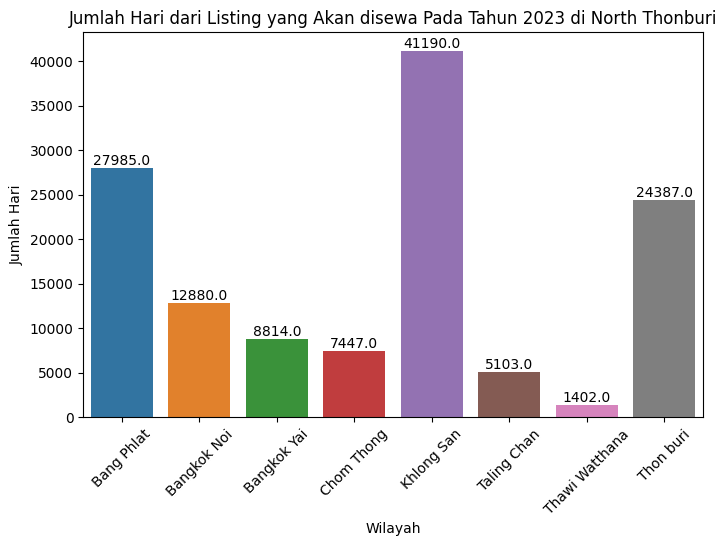

In [436]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_north_thonburi_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di North Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Khlong San` dan `Bang Phlat`

<Figure size 1000x600 with 0 Axes>

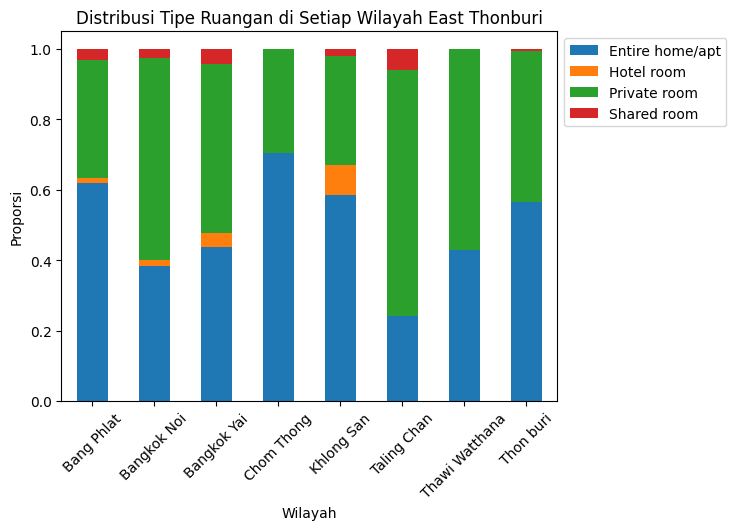

In [437]:
cross_tab = pd.crosstab(df_north_thonburi_365['neighbourhood'], df_north_thonburi_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Thonburi')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

### **e. `South Bangkok`**

#### **i. `South Bangkok` dalam Tahun 2022**

In [438]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region South Bangkok
df_south_bangkok = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='South Bangkok')].reset_index(drop=True)
display(df_south_bangkok.head(3),
df_south_bangkok.shape)

id                                               name  host_id  \
0  1793000                   The Duplex - Asoke- Luxury 92sqm  9407280   
1   156583  Studio near Chula University/Silom walk to MRT...    58920   
2   159854    Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7   766443   

  host_name neighbourhood  latitude  longitude        room_type  price  \
0      Timo       Vadhana  13.74668  100.56137  Entire home/apt   5034   
1      Gael      Bang Rak  13.72850  100.52313  Entire home/apt   1176   
2      Gerd       Vadhana  13.74293  100.55603  Entire home/apt   1659   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0              21                287  2022-11-22               2.59   
1               7                 63  2022-11-25               0.47   
2               3                212  2022-12-08               1.58   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               349                      3   
1                               2                95                      2   
2                               3               207                      7   

          region       Year  
0  South Bangkok 2022-01-01  
1  South Bangkok 2022-01-01  
2  South Bangkok 2022-01-01

(4005, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **4005 baris** dan **18 kolom**.

##### **`South Bangkok` berdasarkan `room_type`**

In [439]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_south_bangkok_pivot = df_south_bangkok.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_south_bangkok_pivot

neighbourhood        room_type    id
0   Bang Kho laen  Entire home/apt    43
1   Bang Kho laen     Private room     4
2         Bang Na  Entire home/apt   154
3         Bang Na       Hotel room     1
4         Bang Na     Private room    40
5        Bang Rak  Entire home/apt   232
6        Bang Rak       Hotel room    23
7        Bang Rak     Private room   104
8        Bang Rak      Shared room     7
9     Khlong Toei  Entire home/apt  1077
10    Khlong Toei       Hotel room    34
11    Khlong Toei     Private room   163
12    Khlong Toei      Shared room     3
13    Parthum Wan  Entire home/apt   151
14    Parthum Wan       Hotel room    17
15    Parthum Wan     Private room    57
16    Parthum Wan      Shared room     3
17   Phra Khanong  Entire home/apt   169
18   Phra Khanong       Hotel room     1
19   Phra Khanong     Private room    44
20   Phra Khanong      Shared room     1
21         Sathon  Entire home/apt   366
22         Sathon       Hotel room     2
23         Sathon     Private room    64
24         Sathon      Shared room     3
25      Suanluang  Entire home/apt    77
26      Suanluang       Hotel room     3
27      Suanluang     Private room    27
28      Suanluang      Shared room     1
29        Vadhana  Entire home/apt   896
30        Vadhana       Hotel room    23
31        Vadhana     Private room   143
32        Vadhana      Shared room    10
33      Yan na wa  Entire home/apt    40
34      Yan na wa       Hotel room     2
35      Yan na wa     Private room    20

In [440]:
df_south_bangkok_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_south_bangkok_pivot['total'] = df_south_bangkok_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_south_bangkok_pivot['persentase'] = df_south_bangkok_pivot['id'] / df_south_bangkok_pivot['total'] * 100
df_south_bangkok_pivot

neighbourhood        room_type    id  total  persentase
0   Bang Kho laen  Entire home/apt    43     47   91.489362
1   Bang Kho laen     Private room     4     47    8.510638
2         Bang Na  Entire home/apt   154    195   78.974359
3         Bang Na       Hotel room     1    195    0.512821
4         Bang Na     Private room    40    195   20.512821
5        Bang Rak  Entire home/apt   232    366   63.387978
6        Bang Rak       Hotel room    23    366    6.284153
7        Bang Rak     Private room   104    366   28.415301
8        Bang Rak      Shared room     7    366    1.912568
9     Khlong Toei  Entire home/apt  1077   1277   84.338293
10    Khlong Toei       Hotel room    34   1277    2.662490
11    Khlong Toei     Private room   163   1277   12.764291
12    Khlong Toei      Shared room     3   1277    0.234926
13    Parthum Wan  Entire home/apt   151    228   66.228070
14    Parthum Wan       Hotel room    17    228    7.456140
15    Parthum Wan     Private room    57    228   25.000000
16    Parthum Wan      Shared room     3    228    1.315789
17   Phra Khanong  Entire home/apt   169    215   78.604651
18   Phra Khanong       Hotel room     1    215    0.465116
19   Phra Khanong     Private room    44    215   20.465116
20   Phra Khanong      Shared room     1    215    0.465116
21         Sathon  Entire home/apt   366    435   84.137931
22         Sathon       Hotel room     2    435    0.459770
23         Sathon     Private room    64    435   14.712644
24         Sathon      Shared room     3    435    0.689655
25      Suanluang  Entire home/apt    77    108   71.296296
26      Suanluang       Hotel room     3    108    2.777778
27      Suanluang     Private room    27    108   25.000000
28      Suanluang      Shared room     1    108    0.925926
29        Vadhana  Entire home/apt   896   1072   83.582090
30        Vadhana       Hotel room    23   1072    2.145522
31        Vadhana     Private room   143   1072   13.339552
32        Vadhana      Shared room    10   1072    0.932836
33      Yan na wa  Entire home/apt    40     62   64.516129
34      Yan na wa       Hotel room     2     62    3.225806
35      Yan na wa     Private room    20     62   32.258065

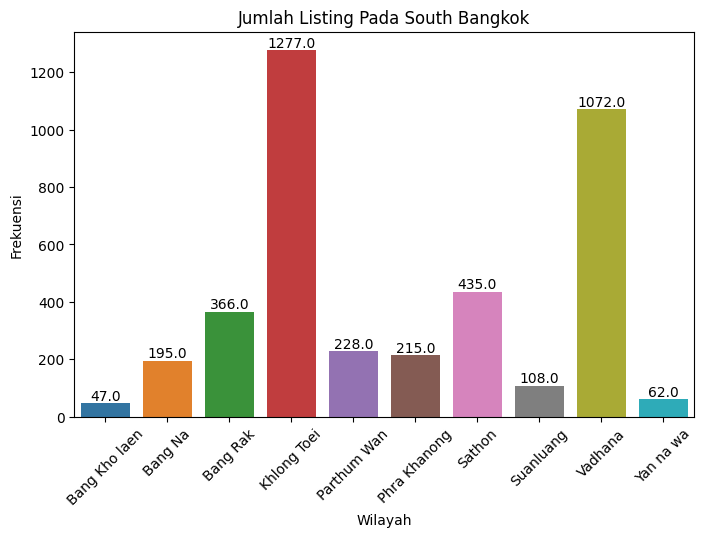

In [441]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_bangkok_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada South Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `South Bangkok` yang paling banyak adalah wilayah `Khlong Toei`

<Figure size 1000x600 with 0 Axes>

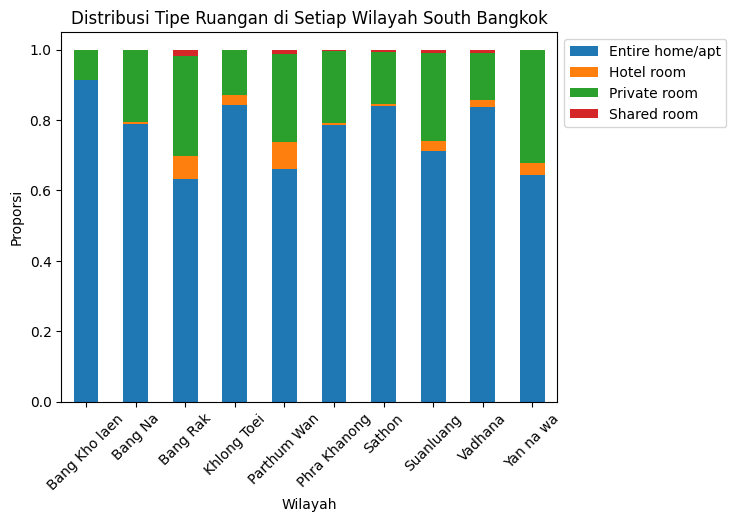

In [442]:
cross_tab = pd.crosstab(df_south_bangkok['neighbourhood'], df_south_bangkok['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah South Bangkok')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`South Bangkok` berdasarkan `price`**

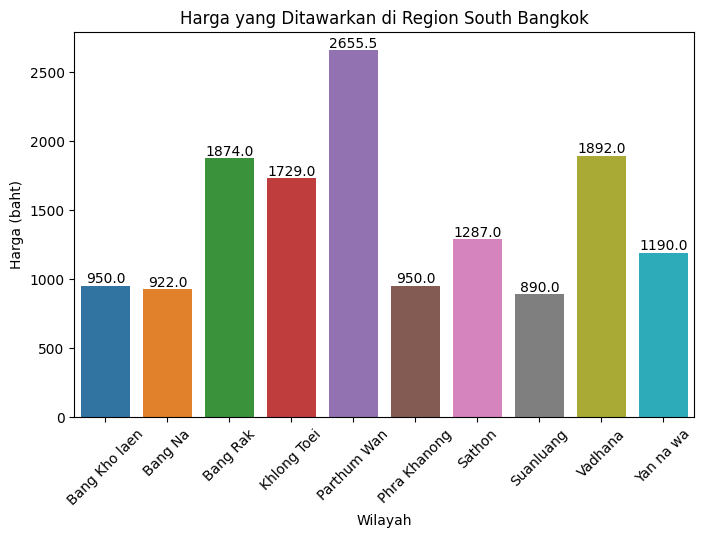

In [443]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region South Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Parthum Wan`

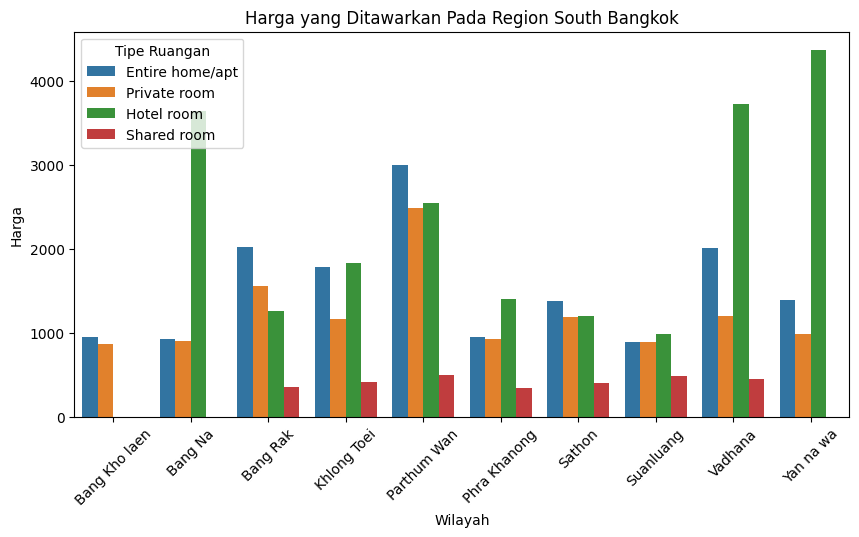

In [444]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_south_bangkok.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region South Bangkok')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper left')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Hotel room` dan berada pada `neighbourhood`: `Yan na wa`

##### **`South Bangkok` berdasarkan `number_of_reviews_ltm`**

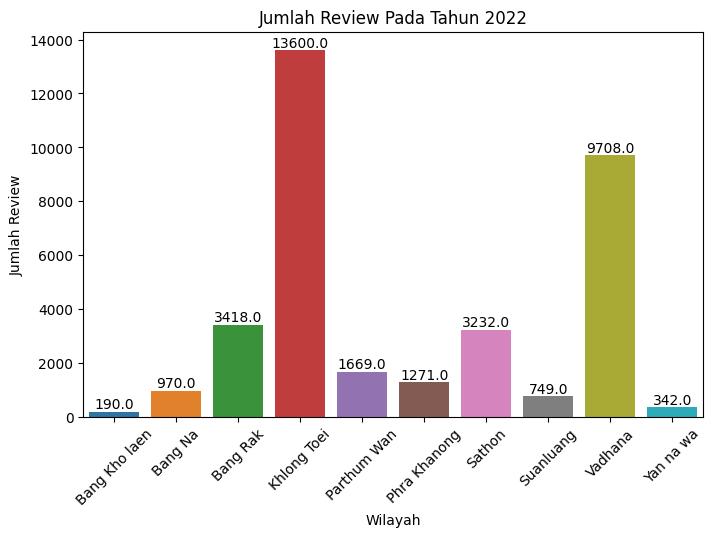

In [445]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_bangkok.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Khlong Toei`

#### **ii. `South Bangkok` berdasarkan `availability_365 < 365`**

In [446]:
# mengelompokan region 'South Bangkok'
df_south_bangkok_365 = df_available[df_available['region']=='South Bangkok'].reset_index(drop=True)
display(
    df_south_bangkok_365,
    df_south_bangkok_365.shape
)

id                                               name  \
0                  27979                     Easy going landlord,easy place   
1                  55681                      Sathorn Terrace Apartment(61)   
2                  55686       Comfy bedroom near River pier & BTS  Taksin.   
3                1791481                Nice and Quiet condo near BTS Onnut   
4                 105042                Central Bangkok 3 Bedroom Apartment   
...                  ...                                                ...   
7113  790226942615849772              Jana & Wora home 2nd room + breakfast   
7114  790278230325843023                           Family Room for 4 People   
7115  790283533781929861                             iSanook Suite 34 sqm 8   
7116  790302368904551572  SuperHost Studio Sukhumvit BTS Nana 5min 200M ...   
7117  790441848994752308                        Sukhumvit Condo Next to BTS   

        host_id      host_name neighbourhood   latitude   longitude  \
0        120541            Emy       Bang Na  13.668180  100.616740   
1        263049            Tor      Bang Rak  13.719340  100.517600   
2        263049            Tor        Sathon  13.718020  100.515390   
3       9399478       Piyakorn   Khlong Toei  13.707190  100.599360   
4        545890          Henry   Khlong Toei  13.733780  100.563030   
...         ...            ...           ...        ...         ...   
7113  477703336       Worakarn       Vadhana  13.742174  100.586726   
7114  340188343         Rachan       Vadhana  13.740168  100.556320   
7115    8663142  ISanook Hotel      Bang Rak  13.733555  100.522394   
7116    6379413          Rekha   Khlong Toei  13.737380  100.554180   
7117   34432625           Alex       Bang Na  13.665395  100.603951   

            room_type  price  minimum_nights  number_of_reviews last_review  \
0        Private room   1316               1                  0         NaT   
1        Private room   1150               2                 27  2019-01-03   
2          Hotel room   1862               2                208  2019-12-02   
3     Entire home/apt   1577              30                 78  2019-05-31   
4     Entire home/apt   5680              28                148  2020-01-07   
...               ...    ...             ...                ...         ...   
7113     Private room    550               1                  0         NaT   
7114     Private room   2237               1                  0         NaT   
7115     Private room   1900              30                  0         NaT   
7116  Entire home/apt   2271               1                  0         NaT   
7117  Entire home/apt   1400              28                  0         NaT   

      reviews_per_month  calculated_host_listings_count  availability_365  \
0                  0.00                               2               358   
1                  0.19                               7               320   
2                  1.44                               7               361   
3                  0.78                               1               330   
4                  1.08                               1               334   
...                 ...                             ...               ...   
7113               0.00                               2               356   
7114               0.00                              14               360   
7115               0.00                              45               363   
7116               0.00                               3               344   
7117               0.00                               2               364   

      number_of_reviews_ltm         region  book_2023  
0                         0  South Bangkok          7  
1                         0  South Bangkok         45  
2                         0  South Bangkok          4  
3                         0  South Bangkok         35  
4                         0  South Bangkok         31  
...       

(7118, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **7118 baris** dan **17 kolom**.

##### **`South Bangkok` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [447]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_south_bangkok_365['book_2023'] = 365 - df_south_bangkok_365['availability_365']
df_south_bangkok_365.head()

id                                          name  host_id host_name  \
0    27979                Easy going landlord,easy place   120541       Emy   
1    55681                 Sathorn Terrace Apartment(61)   263049       Tor   
2    55686  Comfy bedroom near River pier & BTS  Taksin.   263049       Tor   
3  1791481           Nice and Quiet condo near BTS Onnut  9399478  Piyakorn   
4   105042           Central Bangkok 3 Bedroom Apartment   545890     Henry   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0       Bang Na  13.66818  100.61674     Private room   1316               1   
1      Bang Rak  13.71934  100.51760     Private room   1150               2   
2        Sathon  13.71802  100.51539       Hotel room   1862               2   
3   Khlong Toei  13.70719  100.59936  Entire home/apt   1577              30   
4   Khlong Toei  13.73378  100.56303  Entire home/apt   5680              28   

   number_of_reviews last_review  reviews_per_month  \
0                  0         NaT               0.00   
1                 27  2019-01-03               0.19   
2                208  2019-12-02               1.44   
3                 78  2019-05-31               0.78   
4                148  2020-01-07               1.08   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               2               358                      0   
1                               7               320                      0   
2                               7               361                      0   
3                               1               330                      0   
4                               1               334                      0   

          region  book_2023  
0  South Bangkok          7  
1  South Bangkok         45  
2  South Bangkok          4  
3  South Bangkok         35  
4  South Bangkok         31

In [448]:
df_south_bangkok_365.value_counts('book_2023')

book_2023
365    354
1      283
7      180
3      162
4      162
      ... 
171      1
360      1
182      1
183      1
348      1
Name: count, Length: 363, dtype: int64

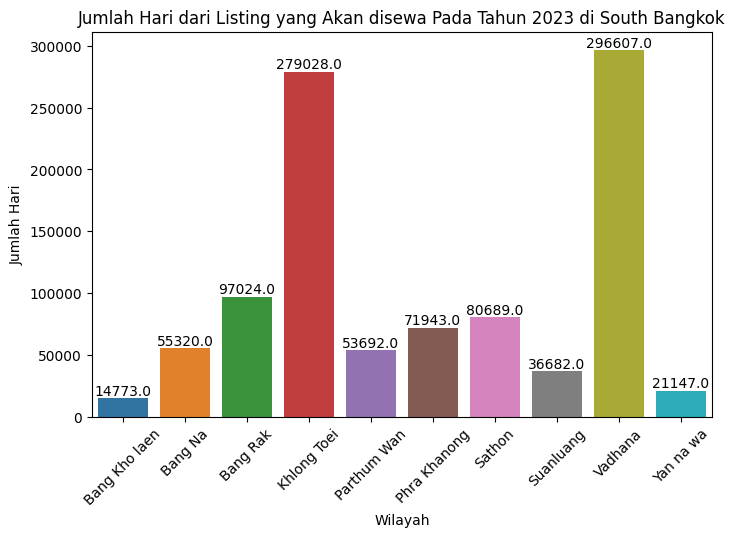

In [449]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_bangkok_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di South Bangkok')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Vadhana` dan `Khlong Toei`

<Figure size 1000x600 with 0 Axes>

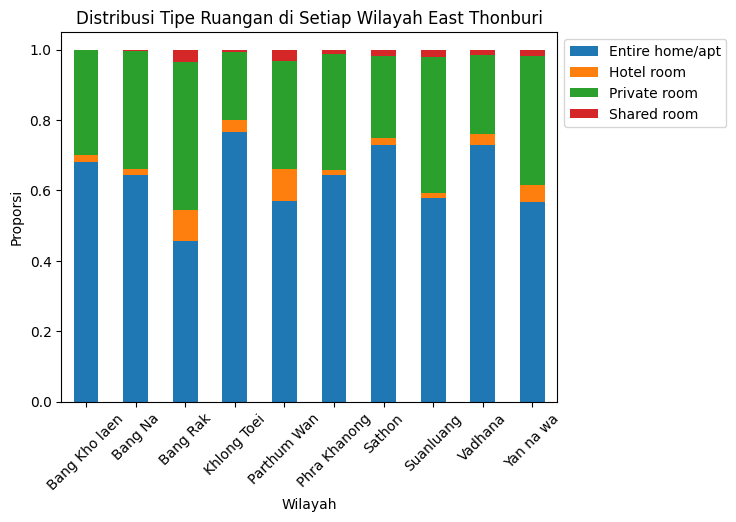

In [450]:
cross_tab = pd.crosstab(df_south_bangkok_365['neighbourhood'], df_south_bangkok_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Thonburi')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

### **f. `South Thonburi`**

#### **i. `South Thonburi` dalam Tahun 2022**

In [451]:
# Membuat DataFrame yang hanya berisi tahun 2022 dan Region Shouth Thonburi
df_south_thonburi = df_last_review[(df_last_review['Year']=='2022-01-01') & (df_last_review['region']=='South Thonburi')].reset_index(drop=True)
display(df_south_thonburi.head(3),
df_south_thonburi.shape)

id                                 name   host_id host_name  \
0   988373  BangLuang House 2@ Bangkok Thailand   5325919  วสวัตติ์   
1  4035028        River View, Spacious and Cozy  19022936  Pattarin   
2  5475798  Simply space but extraordinary rest  28397829    Jannie   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0  Phasi Charoen  13.73122  100.46228  Entire home/apt   1795               1   
1     Rat Burana  13.68106  100.50780  Entire home/apt    700              30   
2     Rat Burana  13.67747  100.51778  Entire home/apt    525               3   

   number_of_reviews last_review  reviews_per_month  \
0                 95  2022-12-15               0.80   
1                  8  2022-11-17               0.08   
2                 17  2022-11-18               0.19   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               3               339                     10   
1                               2               273                      2   
2                               1               333                      3   

           region       Year  
0  South Thonburi 2022-01-01  
1  South Thonburi 2022-01-01  
2  South Thonburi 2022-01-01

(92, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **92 baris** dan **18 kolom**.

##### **`South Thonburi` berdasarkan `room_type`**

In [452]:
# membuat DataFrame berisi 'neighbourhood' dan jumlah `room_type`
df_south_thonburi_pivot = df_south_thonburi.pivot_table(
    index= ['neighbourhood','room_type'],
    values= 'id',
    aggfunc= 'count'
).reset_index().sort_values(['neighbourhood', 'room_type'])
df_south_thonburi_pivot

neighbourhood        room_type  id
0        Bang Khae  Entire home/apt  11
1        Bang Khae     Private room   6
2  Bang Khun thain  Entire home/apt   3
3  Bang Khun thain     Private room   1
4    Phasi Charoen  Entire home/apt  48
5    Phasi Charoen     Private room   8
6       Rat Burana  Entire home/apt  13
7       Rat Burana     Private room   2

In [453]:
df_south_thonburi_pivot.groupby('neighbourhood')['id'].sum()

# membuat total room_type per neighbourhood
df_south_thonburi_pivot['total'] = df_south_thonburi_pivot.groupby('neighbourhood')['id'].transform('sum')

# membuat persentase room_type per neighbourhood
df_south_thonburi_pivot['persentase'] = df_south_thonburi_pivot['id'] / df_south_thonburi_pivot['total'] * 100
df_south_thonburi_pivot

neighbourhood        room_type  id  total  persentase
0        Bang Khae  Entire home/apt  11     17   64.705882
1        Bang Khae     Private room   6     17   35.294118
2  Bang Khun thain  Entire home/apt   3      4   75.000000
3  Bang Khun thain     Private room   1      4   25.000000
4    Phasi Charoen  Entire home/apt  48     56   85.714286
5    Phasi Charoen     Private room   8     56   14.285714
6       Rat Burana  Entire home/apt  13     15   86.666667
7       Rat Burana     Private room   2     15   13.333333

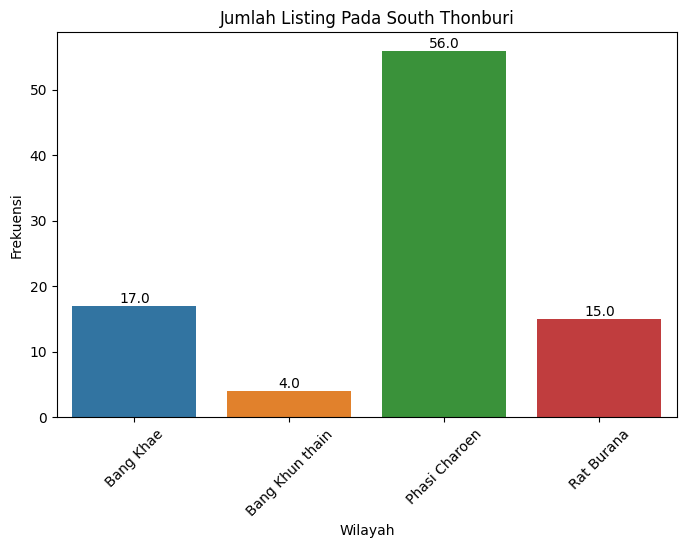

In [454]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_thonburi_pivot.sort_values('neighbourhood'), x='neighbourhood', y='id', estimator=sum, ci=0)
plt.title('Jumlah Listing Pada South Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation=45)

plt.ylabel('Frekuensi')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah listing pada region `North Thonburi` yang paling banyak adalah wilayah `Phasi Charoen`

<Figure size 1000x600 with 0 Axes>

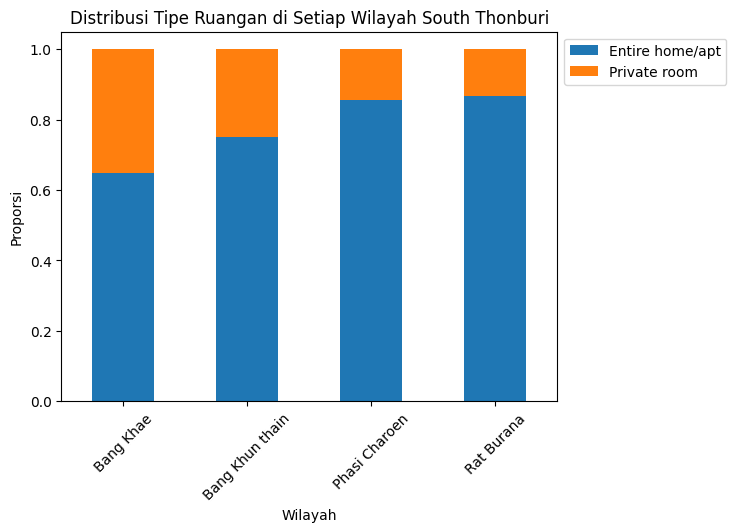

In [455]:
cross_tab = pd.crosstab(df_south_thonburi['neighbourhood'], df_south_thonburi['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah South Thonburi')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- proporsi pada tipe ruangan `Entire home/apt` dan `Private room` memiliki distribusi paling banyak disetiap wilayah.

##### **`South Thonburi` berdasarkan `price`**

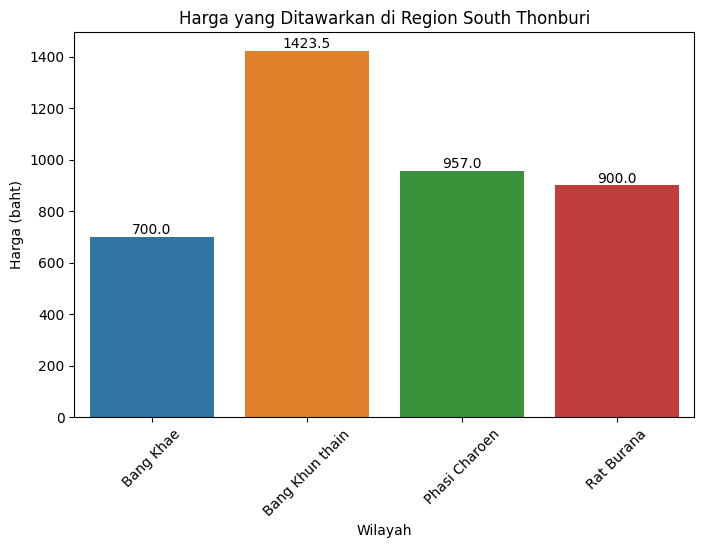

In [456]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_thonburi.sort_values('neighbourhood'), x='neighbourhood', y='price', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan di Region South Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga (baht)')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Harga listing paling mahal ada pada wilayah `Bang Khun thain`

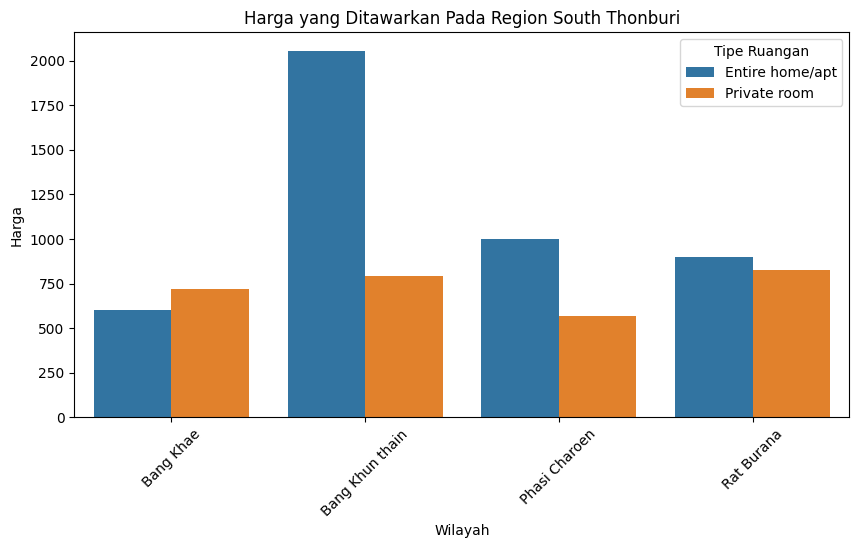

In [457]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_south_thonburi.sort_values(['neighbourhood','room_type']), x='neighbourhood', y='price',hue='room_type', estimator='median', ci=0)
plt.title('Harga yang Ditawarkan Pada Region South Thonburi')
plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Harga')
plt.legend(title= 'Tipe Ruangan', loc='upper right')


plt.show()

Berdasarkan grafik tersebut :
- Harga paling tinggi berada pada `room_type`: `Entire home/apt` dan berada pada `neighbourhood`: `Bang Khun thain`

##### **`South Thonburi` berdasarkan `number_of_reviews_ltm`**

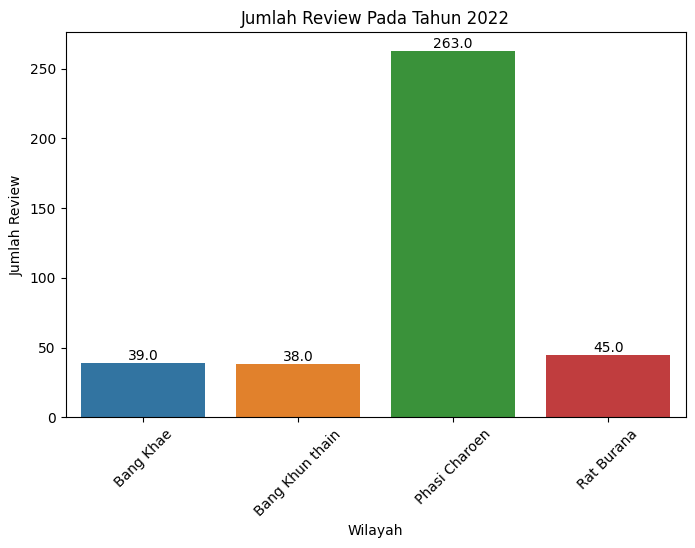

In [458]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_thonburi.sort_values('neighbourhood'), x='neighbourhood', y='number_of_reviews_ltm', estimator=sum, ci=0)
plt.title('Jumlah Review Pada Tahun 2022')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Review')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Jumlah review yang pernah diterima oleh suatu listing, paling banyak berada pada wilayah `Phasi Charoen`

#### **ii. `South Thonburi` berdasarkan `availability_365 < 365`**

In [459]:
# mengelompokan region 'South Thonburi'
df_south_thonburi_365 = df_available[df_available['region']=='South Thonburi'].reset_index(drop=True)
display(
    df_south_thonburi_365,
    df_south_thonburi_365.shape
)

id                                               name  \
0                988373                BangLuang House 2@ Bangkok Thailand   
1               3899352                 Comfy Lovely 1BR nr BTS + FreeWIFI   
2               3951193       Riverview 1BR+Free WIFI+Cable TV+easy to BTS   
3               4035028                      River View, Spacious and Cozy   
4               4730950                   Metro Park, The Lake Condominium   
..                  ...                                                ...   
234  724872294823791915  Comfy clean room w/ King Bed Near MRT – 7 Min ...   
235  730932853899522561  House in Old Town near BTS Bang Wa(S12) ICON SIAM   
236  778824573725963159  Welcome to my home at local area, Bangwa. Floo...   
237  781516205530971982   Artist Private AirRoom 10min2SkytrainPetFriendly   
238  787437385513217823                                   Viva เพชรเกษม 68   

       host_id  host_name  neighbourhood   latitude   longitude  \
0      5325919   วสวัตติ์  Phasi Charoen  13.731220  100.462280   
1    110093848       Boro  Phasi Charoen  13.739290  100.447740   
2     20478822        Nok     Rat Burana  13.684950  100.499060   
3     19022936   Pattarin     Rat Burana  13.681060  100.507800   
4     24430241       Kate  Phasi Charoen  13.710210  100.449800   
..         ...        ...            ...        ...         ...   
234   62043835   Lalitpat      Bang Khae  13.715360  100.407700   
235  318980015   Thapanee  Phasi Charoen  13.716280  100.454950   
236   73178661        Rak  Phasi Charoen  13.719160  100.454910   
237   11346360     Upside  Phasi Charoen  13.695918  100.432468   
238  492361460  Nharthorn      Bang Khae  13.711833  100.416827   

           room_type  price  minimum_nights  number_of_reviews last_review  \
0    Entire home/apt   1795               1                 95  2022-12-15   
1    Entire home/apt    400              28                123  2021-11-30   
2    Entire home/apt    900               2                  7  2017-05-30   
3    Entire home/apt    700              30                  8  2022-11-17   
4       Private room   1200               1                  0         NaT   
..               ...    ...             ...                ...         ...   
234  Entire home/apt    870               1                  6  2022-12-21   
235     Private room    950               1                  1  2022-11-23   
236     Private room    491               4                  0         NaT   
237     Private room    278               1                  0         NaT   
238     Private room    960               1                  0         NaT   

     reviews_per_month  calculated_host_listings_count  availability_365  \
0                 0.80                               3               339   
1                 1.24                               1                 0   
2                 0.08                               2                 0   
3                 0.08                               2               273   
4                 0.00                               2               330   
..                 ...                             ...               ...   
234               2.05                               1               323   
235               0.83                               6               353   
236               0.00                               1               339   
237               0.00                               2               345   
238               0.00                               1               327   

     number_of_reviews_ltm          region  book_2023  
0                       10  South Thonburi         26  
1                        0  South Thonburi        365  
2                        0  South Thonburi        365  
3                        2  South Thonburi         92  
4                        0  South Thonburi         35  
..                     ...             ...        ...  
234                      6  South Tho

(239, 18)

Jumlah baris dan kolom yang akan dianalisa adalah **239 baris** dan **17 kolom**.

##### **`South Thonburi` berdasarkan jumlah hari dari listing yang akan disewa pada tahun 2023**

In [460]:
# membuat kolom baru untuk menunjukan berapa listing yang akan disewa pada tahun 2023
df_south_thonburi_365['book_2023'] = 365 - df_south_thonburi_365['availability_365']
df_south_thonburi_365.head()

id                                          name    host_id host_name  \
0   988373           BangLuang House 2@ Bangkok Thailand    5325919  วสวัตติ์   
1  3899352            Comfy Lovely 1BR nr BTS + FreeWIFI  110093848      Boro   
2  3951193  Riverview 1BR+Free WIFI+Cable TV+easy to BTS   20478822       Nok   
3  4035028                 River View, Spacious and Cozy   19022936  Pattarin   
4  4730950              Metro Park, The Lake Condominium   24430241      Kate   

   neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0  Phasi Charoen  13.73122  100.46228  Entire home/apt   1795               1   
1  Phasi Charoen  13.73929  100.44774  Entire home/apt    400              28   
2     Rat Burana  13.68495  100.49906  Entire home/apt    900               2   
3     Rat Burana  13.68106  100.50780  Entire home/apt    700              30   
4  Phasi Charoen  13.71021  100.44980     Private room   1200               1   

   number_of_reviews last_review  reviews_per_month  \
0                 95  2022-12-15               0.80   
1                123  2021-11-30               1.24   
2                  7  2017-05-30               0.08   
3                  8  2022-11-17               0.08   
4                  0         NaT               0.00   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               3               339                     10   
1                               1                 0                      0   
2                               2                 0                      0   
3                               2               273                      2   
4                               2               330                      0   

           region  book_2023  
0  South Thonburi         26  
1  South Thonburi        365  
2  South Thonburi        365  
3  South Thonburi         92  
4  South Thonburi         35

In [461]:
df_south_thonburi_365.value_counts('book_2023')

book_2023
365    21
185    21
1      18
275    14
186    10
       ..
82      1
70      1
65      1
63      1
97      1
Name: count, Length: 104, dtype: int64

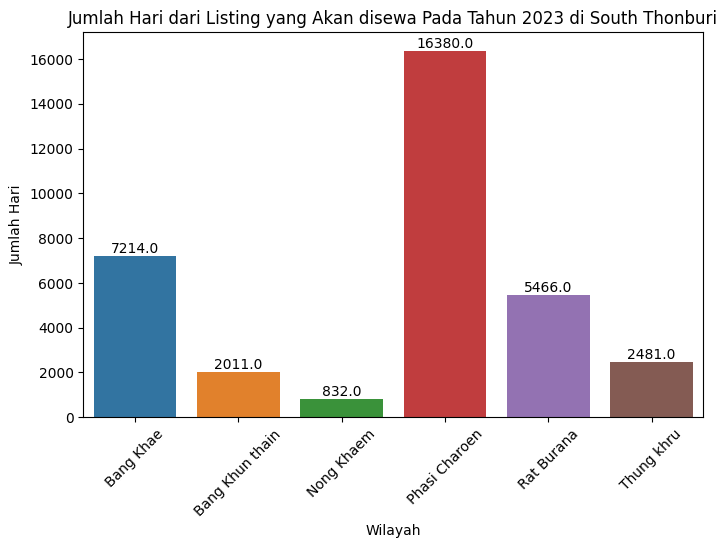

In [462]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_south_thonburi_365.sort_values('neighbourhood'), x='neighbourhood', y='book_2023', estimator=sum, ci=0)
plt.title('Jumlah Hari dari Listing yang Akan disewa Pada Tahun 2023 di South Thonburi')

plt.xlabel('Wilayah')
plt.xticks(rotation= 45)
plt.ylabel('Jumlah Hari')

container = ax.containers[0]
ax.bar_label(container, [x for x in container.datavalues])

plt.show()

Berdasarkan grafik tersebut :
- Wilayah yang listingnya paling banyak disewa pada tahun 2023 adalah `Phasi Charoen` dan `Bang Khae`

<Figure size 1000x600 with 0 Axes>

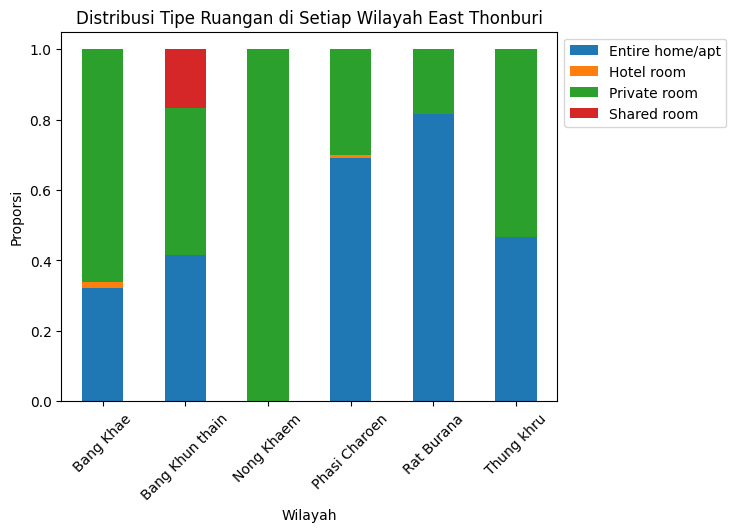

In [463]:
cross_tab = pd.crosstab(df_south_thonburi_365['neighbourhood'], df_south_thonburi_365['room_type'])

cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

ax = cross_tab_prop.plot(kind='bar', stacked=True)
plt.xlabel('Wilayah')
plt.ylabel('Proporsi')
plt.xticks(rotation= 45)
plt.title('Distribusi Tipe Ruangan di Setiap Wilayah East Thonburi')
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

Berdasarkan grafik tersebut :
- `Entire home/apt` dan `Private room` menjadi tipe ruangan yang paling banyak dalam hal distribusinya.

# **6. Kesimpulan dan Rekomendasi**

## **A. Kesimpulan**
Kesimpulan yang didapatkan berdasarkan data Airbnb Listings Bangkok Tahun 2012 - 2022

Analisa Korelasi :
- Tidak seluruh kolom numerikal berkorelasi dengan kolom numerikal lainnya. Hanya terdapat beberapa kolom saja yang berkorelasi dengan kolom lainnya. Kolom yang sudah diuji korelasinya dengan kolom lainnya, hanya terdapat 3 pengujian yang memiliki korelasi kuat dari 21 total pengujian.

Analisa Terakhir Listing Mendapatkan Ulasan :
- Listing yang mendapatkan review pada Tahun 2022 berjumlah 6628 listing atau sebesar 65% dari jumlah listing yang mendapatkan review. Sebesar 35 % listing yang mendapatkan review pada tahun sebelumnya, dapat diasumsikan listing yang tidak mendapat review pada tahun 2022 tidak mendapatkan penyewa atau sedang tidak beroperasi pada tahun 2022.

Dari analisis yang telah dilakukan, kita dapat mengetahui karakteristik properti yang berada di Bangkok, Thailand :

Analisa Berdasarkan Tipe Ruangan :
- Secara garis besar minimal waktu menyewa untuk tiap tipe ruangan adalah :
    - Entire home/apt : 3 malam
    - Hotel room : 1 malam
    - Private room : 1 malam
    - Shared room   : 1 malam
- Tipe Ruangan yang banyak disewakan adalah Entire home/apt dengan jumlah 8907 listing atau sebesar 56 % dari keseluruhan tipe ruangan dengan median harga yang disewakan 1536 baht.
- Untuk tipe ruangan yang mendapatkan review, tipe ruangan bertipe Entire home/ apt adalah listing yang paling banyak mendapat review dibanding tipe ruangan lainnya, yaitu sebesar 65% dengan median harga 1500 baht.
- Untuk tipe ruangan yang tidak mendapatkan review, tipe ruangan bertipe Private room adalah tipe ruangan yang paling banyak tidak mendapatkan review dibanding tipe ruangan lainnya, yaitu sebesar 50% dengan median harga 1429 baht.

Wilayah yang memiliki karakteristik yang baik, menurut data listing Airbnb :

Analisa Berdasarkan Region :
- South Bangkok merupakan region dengan jumlah listing terbanyak sebanyak 50% dibanding dengan region lainnya dan tipe ruangan yang paling banyak adalah Entire home/ apt dan median harga yang ditawarkan berkisar 1600 baht.
- Untuk listing yang mendapatkan review berdasarkan region, region yang paling banyak mendapat review adalah South Bangkok. Persentase South Bangkok dibanding dengan region lain adalah 54% dengan tipe ruangan yang paling banyak adalah Entire home/apt.

Analisa Berdasarkan Wilayah dalam Region :
- Central Bangkok :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Ratchathewi dengan jumlah review sebanyak 4454 dengan median harga 1529 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region Central Bangkok wilayah yang listingnya paling banyak akan disewa adalah Huai Khwang dan selanjutnya Ratchathewi dengan tipe ruangan Entire home/apt.
- East Bangkok :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Lat Krabang dengan jumlah review sebanyak 720 dengan median harga 990 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region East Bangkok wilayah yang listingnya paling banyak akan disewa adalah Bang Kapi dan selanjutnya Lat Krabang dengan tipe ruangan paling banyak Entire home/apt dan Private room.
- North Bangkok :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Chatu Chak dengan jumlah review sebanyak 1180 dengan median harga 1027 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region North Bangkok wilayah yang listingnya paling banyak akan disewa adalah Chatu Chak dengan tipe ruangan paling banyak Entire home/apt dan Private room.
- North Thonburi :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Khlong San dengan jumlah review sebanyak 689 dengan median harga 1333 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region North Thonburi wilayah yang listingnya paling banyak akan disewa adalah Khlong San dengan tipe ruangan paling banyak Entire home/apt.
- South Bangkok :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Khlong Toei dengan jumlah review sebanyak 13600 dengan median harga 1729 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region South Bangkok wilayah yang listingnya paling banyak akan disewa adalah Vadhana dan Khlong Toei dengan tipe ruangan paling banyak Entire home/apt.
- South Thonburi :
    - Pada tahun 2022 : Jumlah review terbanyak ada pada wilayah Phasi Charoen dengan jumlah review sebanyak 263 dengan median harga 957 baht.
    - Listing yang akan disewa pada tahun 2023 : Pada region South Thonburi wilayah yang listingnya paling banyak akan disewa adalah Phasi Charoen dengan tipe ruangan paling banyak Entire home/apt.

## **B. Rekomendasi**
Berdasarkan hasil analisis, maka dapat direkomendasikan sebagai berikut :

- Apabila ingin melakukan perluasan bisnis properti di Bangkok, Thailand :
    - Sebaiknya mempertimbangkan untuk memiliki tipe ruangan bertipe Entire home/apt. Tipe ruangan ini adalah tipe ruangan yang baik apabila penyewa ingin mencari rumah yang jauh dari rumahnya. Dengan seluruh rumah, penyewa dapat memiliki seluruh ruangan yang ada didalamnya.
    - Untuk kisaran harga, sebaiknya mempertimbangkan kisaran harga yang ada pada wilayahnya dan kisaran harga tipe ruangan ini berarti harga yang dipatok tidaklah terlalu atas atau terlalu bawah berdasarkan kisaran harga yang ada.


- Apabila ingin melakukan perluasan bisnis properti dengan fokus hanya pada suatu region, disarankan memperluas bisnis pada region South Bangkok:
    - Tipe ruangan yang paling baik pada region ini adalah tipe ruangan Entire home/apt.
    - Wilayah yang disarankan pada region ini adalah wilayah Khlong Toei. Pada wilayah ini berdasarkan analisis merupakan wilayah dengan jumlah listing yang mendapat review paling banyak. 
    - Untuk harga pada wilayah ini memiliki kisaran harga yang lebih tinggi dibanding kisaran harga wilayah lainnya yang ada di Bangkok.

- Apabila ingin melakukan perluasan bisnis properti pada setiap region, maka disarankan:
    - Central Bangkok : Memperluas bisnis pada wilayah Huai Khwang atau Ratchathewi
    - East Bangkok : Memperluas bisnis pada wilayah Bang Kapi atau Lat Krabang
    - North Bangkok : Memperluas bisnis pada wilayah Chatu Chak
    - North Thanburi : Memperluas bisnis pada wilayah Khlong San
    - South Bangkok : Memperluas bisnis pada wilayah Khlong Toei atau Vadhana
    - South Thanburi : Memperluas bisnis pada wilayah Phasi Charoen